In [1]:
%matplotlib inline                           
%config InlineBackend.figure_format='retina'       # Melhora a resolucao do plot
from IPython.core.display import display, HTML
import matplotlib.pylab as plt                     # Permite fazer plots utilizando o pacote matplotlib
plt.rcParams['figure.figsize'] = (9.0, 9.0)      # Determina o tamanho do plot dentro do ipython notebook
from astropy.io import fits
import numpy as np 
import pandas as pd
import math

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 20)
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 12
plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 7
plt.rcParams['ytick.minor.size'] = 7
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = True 

plt.rcParams['xtick.major.width']  = 1
plt.rcParams['ytick.major.width']  = 1

**Motivação**: Esse código foi criado apenas após meses de trabalho no projeto pois percebi a necessidade de preservar em apenas uma pasta todas as modificações realizadas no catálogo. Até então, eu havia adicionado, corrigido e manipulado os parâmetros em pastas diferentes. Isso gera uma confusão na hora de saber qual é o catálogo mais atual e uma mudança frequente de nomes para cada nova versão. Portanto compilei todas as modificações em um único notebook, gerando ao final de cada rodada apenas um arquivo de texto com nome único.

**Modificações realizadas anteriormente:** Listo brevemente as modificações realizadas até então. 

* Adição dos quatro catálogos disponíveis: Blakeslee, Demarco, Patel e Tanaka.
* Realizado uma união de todos os catálogos baseados nas distâncias angulares.
* Adicionando para os objetos membros a magnitude U do VMOS

# 1 - Adicionando catálogos

## 1.1 - Adicionando catálogo Blakeslee

* Artigo original: Blakeslee et al., 2006

Descrição:

| Nome | Parâmetro | Unidade|
| :---         |     :---      |          :--- |          :--- |
| ID_B              | Identificação     | --    |
| RA_B              | Ascensão reta     | graus (J2000)    |
| DEC_B             | Declinação        | graus (J2000)     |
| F775W_B           | magnitude i SEX   | mag    |
| F775W_GALFIT_T    | magnitude i GALFIT| mag    |
| Re_T              | Raio efetivo      | arcsec    |
| nSer_T            | índice de Sérsic  | --    |
| Morph_T           | Tipo T (1)            | --    |
| ba_T              | razão de eixos    | --    |
| B_T               | Bumpiness         | --    |
| Sigma_T           | Densidade superficial de massa (2)| --    |
| r_i_T             | r - i     | mag    |
| e_r_i_T           | erro r - i     | mag    |
| i_z_T             | i - z     | mag    |
| e_i_z_T           | erro i - z     | mag    |
| r_z_T             | r - z     | mag    |
| e_r_z_T           | erro r - z     | mag    |

(1) Postman+2005

In [3]:
#Adicionando catalogos
cat_blakeslee = np.loadtxt('../00-Catalogos/catalog_blakeslee.txt')
cat_blakeslee = pd.DataFrame(cat_blakeslee)

#Adicionando o nome de cada coluna
cat_blakeslee.columns = ['ID_B','RA_B','DEC_B','F775W_B','F775W_GALFIT_B','Re_B','nSer_B','Morph_B','ba_B','B_B','sigma_B','r_i_B','e_r_i_B','i_z_B','e_i_z_B','r_z_B','e_r_z_B']
#cat_blakeslee

## 1.2 -  Adicionando catalogo Tanaka 

* Artigo original: Tanaka et al., 2006 (https://arxiv.org/pdf/astro-ph/0511296.pdf)

Descrição:


| Nome | Parâmetro | Unidade|
| :---         |     :---      |          :--- |      
| nm_col_T     | Numero coluna Tanaka            | --    |
| ID_T         | Identificação                   |  --   |
| RA_T         | Ascensão Reta                   | graus (J2000) |
| DEC_T        | Declinação                      | graus (J2000) |
| zmag_T       | z                               | mag    |
| Rci_T        | R - i                           | mag    |
| i_z_T        | i - z                           | mag    |
| zph_T        | Redshift fotometrico            | --     |
| zsp_T        | Redshift Espectroscópico        | --     |
| Zspmin_T     | Redshift Espectroscópico mínimo | --     |
| zpsmax_T     | Redshift Espectroscópico máximo | --     |
| zconf_T      | Confiabilidade do redshift      | --     |


In [12]:
#Adicionando catálogo Tanaka:

cat_tanaka = np.loadtxt('../00-Catalogos/catalog_tanaka.txt', dtype = 'string')
cat_tanaka = pd.DataFrame(cat_tanaka)

#Transformando as coordenadas de horas -> graus
a = ((((pd.to_numeric(cat_tanaka[4])/60) + pd.to_numeric(cat_tanaka[3]))/60) + pd.to_numeric(cat_tanaka[2]))*15
b = ((((pd.to_numeric(cat_tanaka[7])/60) + pd.to_numeric(cat_tanaka[6]))/60) + abs(pd.to_numeric(cat_tanaka[5])))*(-1)
cat_tanaka.insert(2,'2',a)
del cat_tanaka[2]
del cat_tanaka[3]
del cat_tanaka[4]

cat_tanaka.insert(3,'3',b)
del cat_tanaka[5]
del cat_tanaka[6]
del cat_tanaka[7]
#print cat_tanaka
cat_tanaka.columns = ['nm_col_T','ID_T','RA_T','DEC_T','zmag_T','VRc_T','Rci_T','i_z_T','zph_T','zsp_T','Zspmin_T','zpsmax_T','zconf_T']

#cat_tanaka

## 1.3 - Adicionando catálogo Demarco

* Artigo original: Demarco et al., 2010



| Nome | Parâmetro | Unidade|
| :---         |     :---      |          :--- |
|ID_D|  Identificão     | --    |
|RA_D|  Ascensão Reta     |  graus   |
|DEC_D|  Declinação     |  graus   |
|Z_D|  Redshift     | --    |
|EL_D| Flag de linhas de emissão      |  --   |
|TYPE_D|  Tipo T     |  --   |
|AUTO_R_D|  Magnitude R abertura mag_auto     |  mag   |
|ERR_AUTO_R_D|   Erro R MAG_AUTO   |  mag   |
|AP_R_D|   Magnitude R abertura 2arc    | mag    |
|ERR_AP_R_D|   Erro R 2arc     | mag    |
|AUTO_I_D|  Magnitude I abertura mag_auto     |  mag   |
|ERR_AUTO_I_D|   Erro I MAG_AUTO     | mag    |
|AP_I_D|   Magnitude I abertura 2arc    |  mag   |
|ERR_AP_I_D|   Erro I 2arc    |  mag   |
|AUTO_Z_D|  Magnitude Z abertura mag_auto     | mag    |
|ERR_AUTO_Z_D|   Erro Z MAG_AUTO     |  mag   |
|AP_Z_D|  Magnitude Z abertura 2arc     |  mag   |
|ERR_AP_Z_D|   Erro Z 2arc    | mag    |
|AUTO_J_D|  Magnitude J abertura mag_auto     | mag    |
|ERR_AUTO_J_D|   Erro J MAG_AUTO     | mag    |
|AP_J_D|  Magnitude J abertura 2arc     | mag    |
|ERR_AP_J_D|   Erro J 2arc    | mag    |
|AUTO_KS_D|  Magnitude Ks abertura mag_auto     |  mag   |
|ERR_AUTO_KS_D| Erro Ks MAG_AUTO       | mag    |
|AP_KS_D|  Magnitude Ks abertura 2arc     | mag    |
|ERR_AP_KS_D|   Erro Ks 2arc    |mag     |
|STEL_MASS_D|  Massa estelar     |     |
       

In [5]:
cat_demarco = np.loadtxt('../00-Catalogos/catalog_demarco.txt', dtype = 'string')
cat_demarco = pd.DataFrame(cat_demarco)

cat_demarco.columns =['ID_D','RA_D','DEC_D','Z_D','EL_D', 'TYPE_D' ,'AUTO_R_D' ,'ERR_AUTO_R_D', 'AP_R_D'   ,'ERR_AP_R_D' ,'AUTO_I_D' ,'ERR_AUTO_I_D' ,'AP_I_D',   'ERR_AP_I_D', 'AUTO_Z_D', 'ERR_AUTO_Z_D', 'AP_Z_D',   'ERR_AP_Z_D', 'AUTO_J_D', 'ERR_AUTO_J_D', 'AP_J_D',   'ERR_AP_J_D', 'AUTO_KS_D', 'ERR_AUTO_KS_D', 'AP_KS_D',  'ERR_AP_KS_D', 'STEL_MASS_D']


## 1.4 - Adicionando Patel

*  Artigo: Patel+2009 (http://iopscience.iop.org/article/10.1088/0004-637X/694/2/1349/pdf)

Descrição:

| Nome | Parâmetro | Unidade|
| :---         |     :---      |          :--- |     
| ID |  Identificação |  --   |      
| RA  |  Ascensão Reta  |  graus   |             
| DEC  | Declinação   | graus    |                 
| zmag_auto| Magnitude z mag_auto  |  mag   |           
| zmag_col  | Magnitude z ap 2arc   |  mag   |         
| Ks_col| Magnitude Ks ap 2arc   |  mag   |             
| z50    |    |  --   |               
| z025|    |  --   |      
|z975_P|    |  --   |      
|zspec_P|    | --    |      
|lmass_P|    |     |      
|density_P|   |     |      

In [6]:
cat_patel = np.loadtxt('../Catalogos/catalog_patel.txt', dtype = 'string')
cat_patel = pd.DataFrame(cat_patel)
cat_patel.columns = ['ID_P','RA_P','DEC_P','zmag_auto_P','zmag_col_P','Ks_col_P','z50_P','z025_z_P','z975_P','zspec_P','lmass_P','density_P']


## 1.5 Panorama de objetos presentes :

Como importado acima, temos 4 catálogos contendo galáxias confirmadas ou candidatas a membro do aglomerado. Os catálogos de Blakeslee e Demarco caracterizam principalmente a região central do aglomerado e possuem objetos confirmados a partir da análise do redshift espectroscópico. 

O catálogo de Tanaka possuem objetos que não estão dentro do range utilizado por Demarco para caracterizar os objetos neste aglomerado (0.81 < z < 0.87). Portanto necessitamos realizar uma seleção de objetos dentro deste intervalo.

Para o catálogo de Patel, temos uma grande quantidade de galáxias com uma grande variedade de redshifts espectroscópicos devido ao fato de que tal levantamento local foi realizado por espectrocopia LDP. 

Em suma, precisamos ter essas informações em mente para realizar uma seleção de objetos pertencentes ao aglomerado. 

À seguir, demonstro a posição dos objetos 

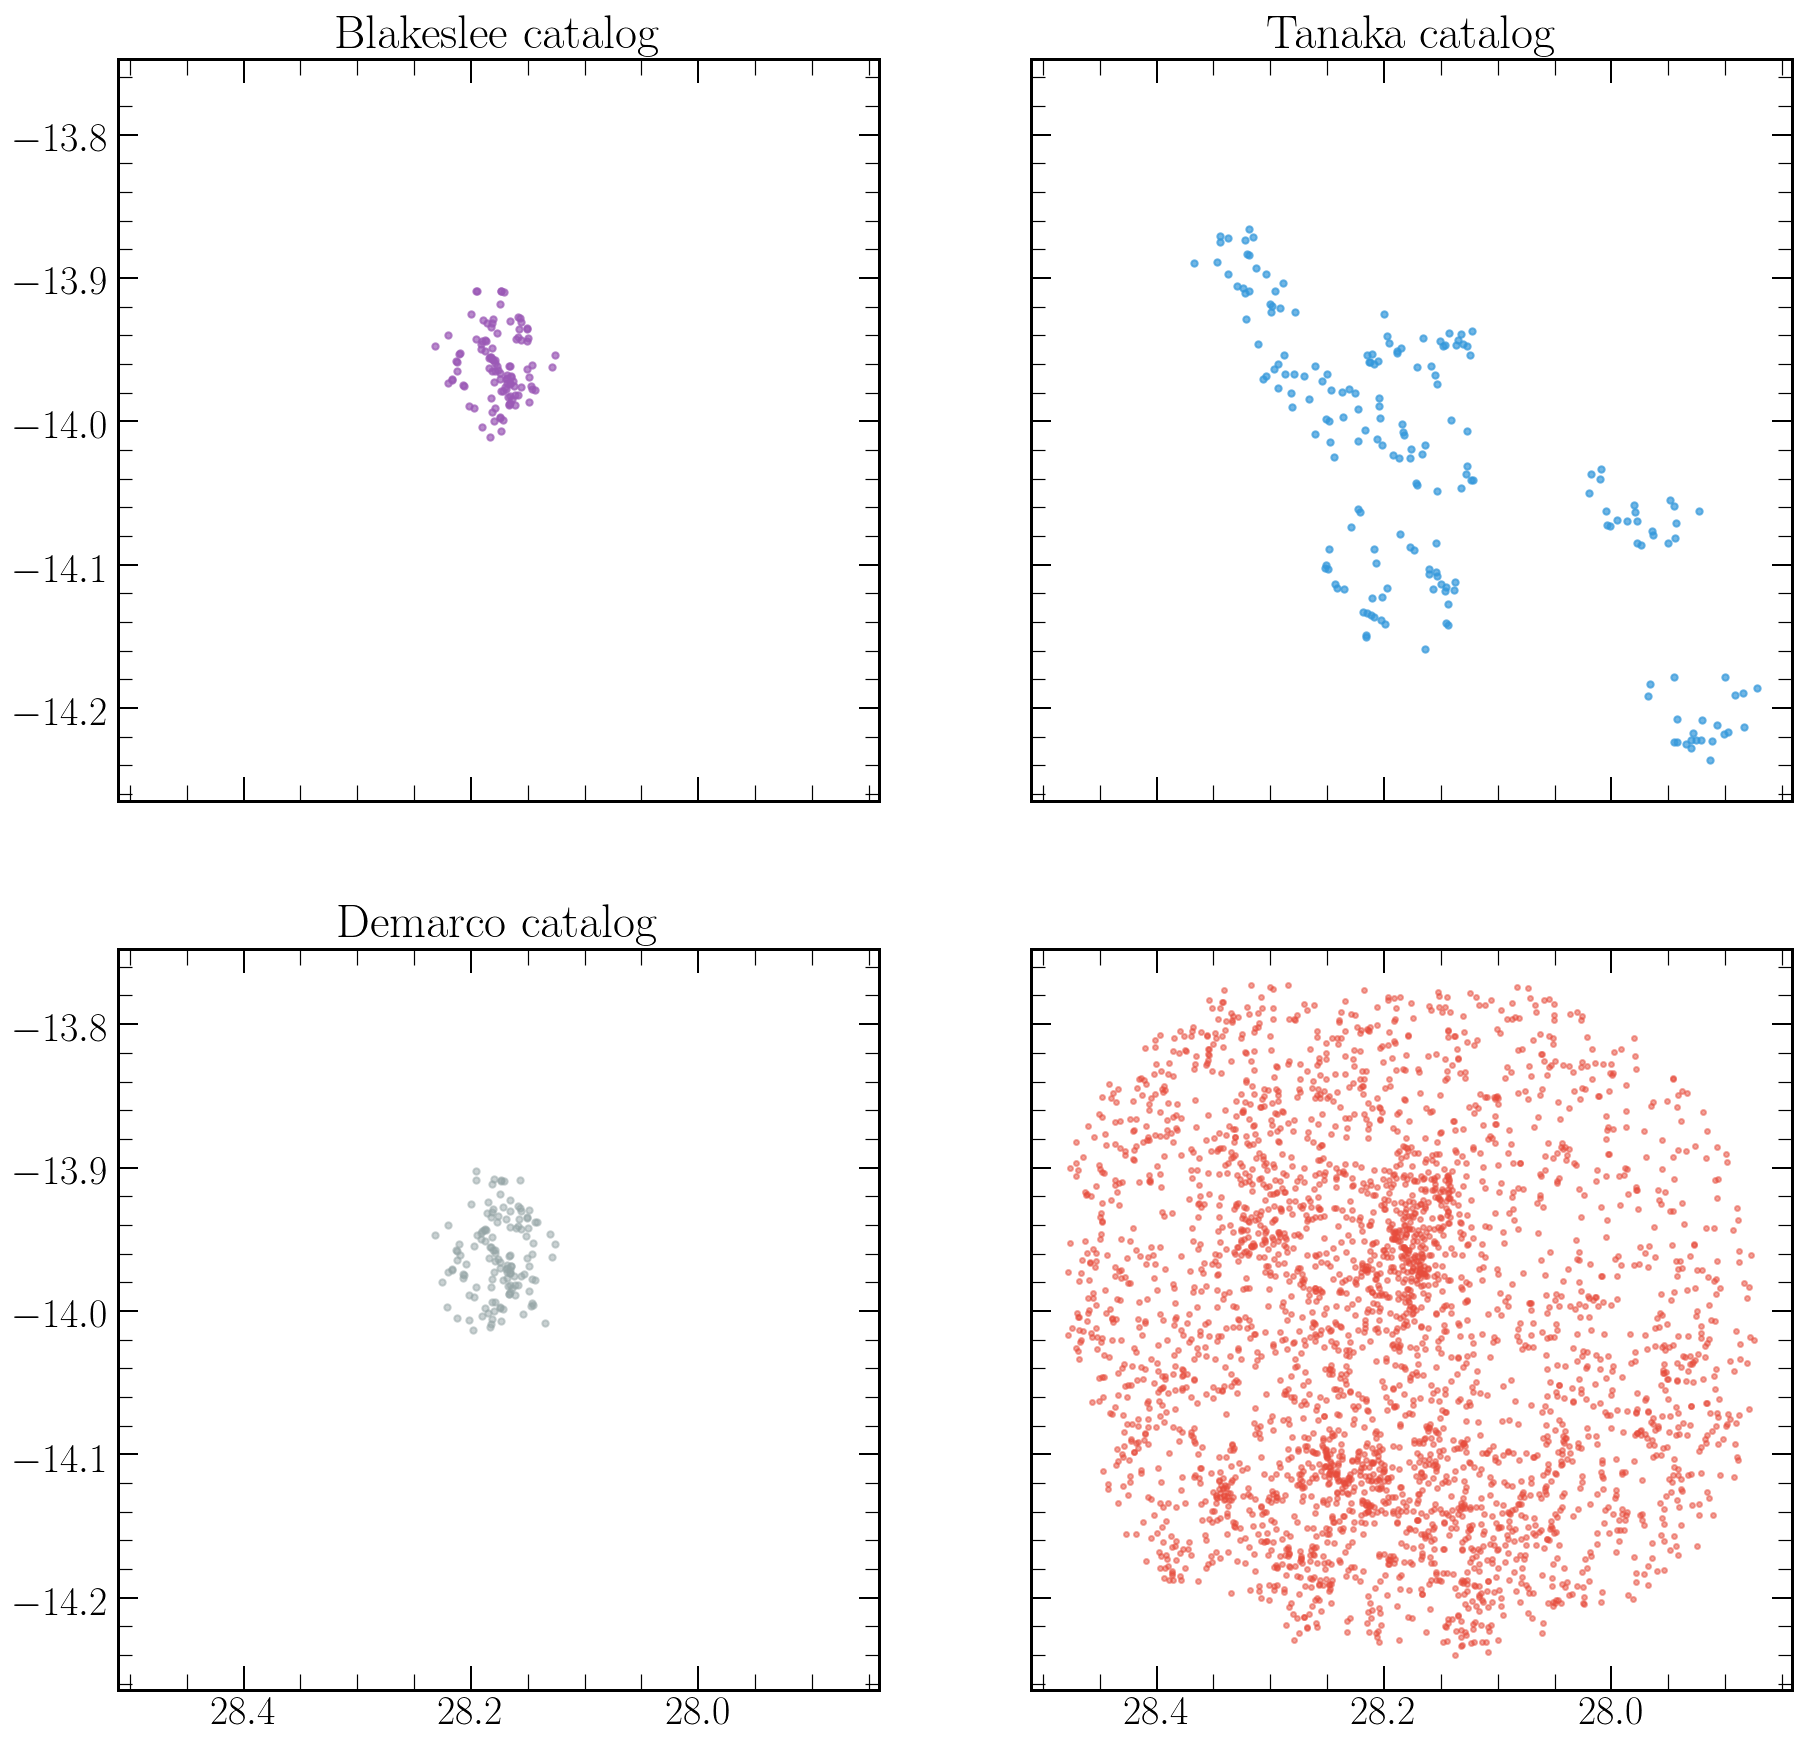

In [7]:
f, axarr = plt.subplots(2, 2, figsize = (15,15), sharex = True, sharey = True)
# Paleta de cores
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

axarr[0,0].scatter(cat_blakeslee['RA_B'],cat_blakeslee['DEC_B'],s = 10, label = 'Blakeslee', alpha=0.7, c = flatui[0] )
axarr[0,0].set_title('Blakeslee catalog')

axarr[0,1].scatter(cat_tanaka['RA_T'],cat_tanaka['DEC_T'],s = 10, label = 'Tanaka', c = flatui[1],alpha=0.7)
axarr[0,1].set_title('Tanaka catalog')

axarr[1,0].scatter(cat_demarco['RA_D'],cat_demarco['DEC_D'],s = 10, label = 'Demarco', alpha =0.5, c = flatui[2])
axarr[1,0].set_title('Demarco catalog')

axarr[1,1].scatter(cat_patel['RA_P'],cat_patel['DEC_P'], label = 'Patel',s = 6, c = flatui[3],alpha =0.5) 

plt.gca().invert_xaxis()

plt.savefig('targets_catalogs.pdf')

# 2 - Juntando objetos dos diferentes catálogos:

Método de junção: calcularei as distâncias angulares entre os objetos e ter como critério de seleção a distância máxima de 2''.

Inicialmente, criemos uma função que calcula a distância angular entre os objetos. A entrada precisa ser as ascensões retas e declinações dos objetos em graus. O próprio programa irá transformar os ângulos em radiano e realizar o cálculo. A saida é em radianos!!

In [8]:
#Calculo da distancia angular entre dois objetos
def calculo_distancia(alpha1,delta1,alpha2,delta2):
    alpha1 = math.radians(float(alpha1))
    alpha2 = math.radians(float(alpha2))
    delta1 = math.radians(float(delta1))
    delta2 = math.radians(float(delta2))
    return math.acos(math.sin(delta1)*math.sin(delta2) + math.cos(delta1)*math.cos(delta2)*math.cos(alpha1 - alpha2))#math.sqrt((float(alpha1) - float(alpha2))**2. +(float(delta1) - float(delta2))**2.)**(1/2.)


## 2.1 - Unindo Demarco com Blakeslee (DB):

Utilizarei como catálogo base o catálogo de Blakeslee, portanto adicionaremos a ele o catálogo de Demarco, inicial. Relembrando que, para ambos os catálogos, possuimos apenas objetos confirmados.

O que esperamos:
* Total Demarco: 134
*    Total Blakeslee: 107
*    Intersecao: 41

In [9]:
# Criando um vetor que acomodara as ascensoes retas e declinacoes dos objetos membro
RA_DB = list(cat_blakeslee['RA_B'])
DEC_DB = list(cat_blakeslee['DEC_B'])

##Loop para identificacao de objetos compativeis:
 # Logica: no comando anterior, adicionei a ascensao reta e declinacao dos objetos de 
 # blakeslee. Parao Loop calculo a distancia angular de todos os objetos de ambos os catalogos.
 # Caso o criterio de distancia angular seja menor do que dois segundos de arco nao seja 
 # satisfeito, ou seja, caso na haja comptibilidadentre os catalogos, o objeto eh adicionado 
 # ao vetor de coordenadas.
r = 0
for j in range(0,len(cat_demarco)):
    o = 0
    # Loop para calculo da separacao angular de um objeto de demarco para todo de Blakeslee
    for i in range(0,len(cat_blakeslee)):
        dist = calculo_distancia(cat_blakeslee[cat_blakeslee.columns[1]][i],cat_blakeslee[cat_blakeslee.columns[2]][i],cat_demarco[cat_demarco.columns[1]][j],cat_demarco[cat_demarco.columns[2]][j])
        if dist < 2*4.8481*10**(-6):
            o = o +1
    if o == 0:
        RA_DB.append(cat_demarco[cat_demarco.columns[1]][j])
        DEC_DB.append(cat_demarco[cat_demarco.columns[2]][j])

        
print 'Total Blakeslee: ',len(cat_blakeslee)
print 'Total Demarco: ', len(cat_demarco)
print 'Intersecao: ' ,len(RA_DB) - len(cat_blakeslee)

Total Blakeslee:  107
Total Demarco:  134
Intersecao:  41


## 2.2 - Unindo DB com Tanaka (DBT):

Adicionarei ao vetor anterior os objetos presentes apenas no catálogo de Tanaka, sob mesmo critério de dois segundos de arco. Neste caso, necessitamos realizar um corte de redshift como descrito acima:

O que esperamos:

* Demarco + Blakeslee: 148
* Tanaka: 192 (86 em bom range)
* Interse: 10
* add 76 ---- total 224

In [20]:
# Criando um novo vetor que comportará inicialmente os alpha e delta obtidos anteriormente + 
# os novos objetos de Tanaka

RA_DBT = []
DEC_DBT = []

#Selecao de redshift
cat_tanaka = cat_tanaka[cat_tanaka['zsp_T'] >= 0.81]
cat_tanaka['zsp_T'] =  map(float,cat_tanaka['zsp_T'])
cat_tanaka = cat_tanaka[cat_tanaka['zsp_T'] <= 0.87]
cat_tanaka = cat_tanaka.reset_index(drop=True)

#Loop looposo:
r = 0
for j in range(0,len(cat_tanaka)):
    o = 0
#     if float(cat_tanaka['zsp_T'][j]) >= 0.80 and float(cat_tanaka['zsp_T'][j]) <= 0.87:
    for i in range(0,len(RA_DB)):
        dist = calculo_distancia(RA_DB[i],DEC_DB[i],cat_tanaka['RA_T'][j],cat_tanaka['DEC_T'][j])
        if dist < 2*4.8481*10**(-6):
            o = o +1
    if o == 0:
        RA_DBT.append(cat_tanaka['RA_T'][j])
        DEC_DBT.append(cat_tanaka['DEC_T'][j])

            

RA_DBT = RA_DB+  RA_DBT 
DEC_DBT = DEC_DB + DEC_DBT 

print 'DB: ',len(RA_DB)
print 'T:', len(cat_tanaka)
print 'Total DBT:', len(RA_DBT)
print 'DBT - DB',len(RA_DBT) - len(RA_DB)


DB:  148
T: 86
Total DBT: 224
DBT - DB 76


## 2.3 - Unindo DBT com Patel (DBTP):

Mesmo processo, necessito realizar um corte de redshift novamente:

In [23]:
# Novo vetor
RA_DBTP = []
DEC_DBTP = []


#Selecao de redshift
cat_patel = cat_patel[cat_patel['zspec_P'] >= 0.81]
cat_patel['zspec_P'] =  map(float,cat_patel['zspec_P'])
cat_patel = cat_patel[cat_patel['zspec_P'] <= 0.87]
cat_patel = cat_patel.reset_index(drop=True)

#Loop na mesma logica
for j in range(0,len(cat_patel)):
    o = 0
    for i in range(0,len(RA_DBT)):
        dist = calculo_distancia(RA_DBT[i],DEC_DBT[i],cat_patel['RA_P'][j],cat_patel['DEC_P'][j])
        if dist < 2*4.8481*10**(-6):
            o = o +1
    if o == 0:
        RA_DBTP.append(cat_patel['RA_P'][j])
        DEC_DBTP.append(cat_patel['DEC_P'][j])
        
RA_DBTP =  RA_DBT + RA_DBTP 
DEC_DBTP = DEC_DBT + DEC_DBTP  

len(RA_DBT) , len(RA_DBTP), len(RA_DBTP) - len(RA_DBT)

(224, 351, 127)

# 3 -  Criando uma única tabela para todos os objetos:

Até então, criei apenas uma vetor com as coordenadas dos objetos, sem duplicações. Como cada tabela possui parâmetros físicos distintos, meu objetivo é criar uma única tabela unindo todos os objetos e suas diversas propriedades.

Portanto, realizarei novo loop adicionando em uma tabela vazia os objetos confirmandos. 

In [29]:
# Criando uma lista contendo o nome de todas as colunas de todos os quatro catálogos:
columns_T = ['RA_DBTP','DEC_DBTP'] +list(cat_blakeslee.columns) + list(cat_tanaka.columns) + list(cat_patel.columns) +  list(cat_demarco.columns)

#Criando tabela vazia

t = range(0,len(RA_DBTP))
table_T = pd.DataFrame(np.nan, index=t, columns= columns_T )

# table_T

# Adicionando as colunas de ra e dec os valores dos vetores dos membros:

for y in range(0,len(RA_DBTP)):
    table_T.loc[y, 'RA_DBTP'] = RA_DBTP[y]
    table_T.loc[y, 'DEC_DBTP'] = DEC_DBTP[y]

# table_T

In [30]:
for y in range(0,len(RA_DBTP)):
    for h in range(0,len(cat_blakeslee)):
        if abs(float(RA_DBTP[y]) - float(cat_blakeslee['RA_B'][h])) < 0.00005 and abs(float(DEC_DBTP[y]) - float(cat_blakeslee['DEC_B'][h])) < 0.00005:
            for d in list(cat_blakeslee.columns):
                table_T.loc[y, d] = cat_blakeslee[d][h]
    for h in range(0,len(cat_demarco)):
        print y, h
        if abs(float(RA_DBTP[y]) - float(cat_demarco['RA_D'][h])) < 0.00005 and abs(float(DEC_DBTP[y]) - float(cat_demarco['DEC_D'][h])) < 0.00005:
            print 'igual'
            for d in list(cat_demarco.columns):
                table_T.loc[y, d] = cat_demarco[d][h]
        else:
            print "dist"
            dist = calculo_distancia(RA_DBTP[y],DEC_DBTP[y],cat_demarco['RA_D'][h],cat_demarco['DEC_D'][h])
            if dist < 2*4.8481*10**(-6):
                for d in list(cat_demarco.columns):
                    table_T.loc[y, d] = cat_demarco[d][h]
    for h in range(0,len(cat_tanaka)):
        print y,h
        if float(cat_tanaka['zsp_T'][h]) >= 0.80 and float(cat_tanaka['zsp_T'][h]) <= 0.87:
            if abs(float(RA_DBTP[y]) - float(cat_tanaka['RA_T'][h])) < 0.00005 and abs(float(DEC_DBTP[y]) - float(cat_tanaka['DEC_T'][h])) < 0.00005:
                print RA_DBTP[y],DEC_DBTP[y],cat_tanaka['RA_T'][h],cat_tanaka['DEC_T'][h],'igual','match'
                for d in list(cat_tanaka.columns):
                    table_T.loc[y, d] = cat_tanaka[d][h]
            else:
                dist = calculo_distancia(RA_DBTP[y],DEC_DBTP[y],cat_tanaka['RA_T'][h],cat_tanaka['DEC_T'][h])
                if dist < 2*4.8481*10**(-6):
                    print RA_DBTP[y],DEC_DBTP[y],cat_tanaka['RA_T'][h],cat_tanaka['DEC_T'][h],'dist',''
                    for d in list(cat_tanaka.columns):
                        table_T.loc[y, d] = cat_tanaka[d][h] 
    for h in range(0,len(cat_patel)): 
        if float(cat_patel['zspec_P'][h]) >= 0.80 and float(cat_patel['zspec_P'][h]) <= 0.87:
            if abs(float(RA_DBTP[y]) - float(cat_patel['RA_P'][h])) < 0.00005 and abs(float(DEC_DBTP[y]) - float(cat_patel['DEC_P'][h])) < 0.00005:
                print y,h,'igual'
                for d in list(cat_patel.columns):
                    table_T.loc[y, d] = cat_patel[d][h]
            else:
                print y,h,'dist'
                dist = calculo_distancia(RA_DBTP[y],DEC_DBTP[y],cat_patel['RA_P'][h],cat_patel['DEC_P'][h])
                if dist < 2*4.8481*10**(-6):
                    for d in list(cat_patel.columns):
                        table_T.loc[y, d] = cat_patel[d][h]

0 0
igual
0 1
dist
0 2
dist
0 3
dist
0 4
dist
0 5
dist
0 6
dist
0 7
dist
0 8
dist
0 9
dist
0 10
dist
0 11
dist
0 12
dist
0 13
dist
0 14
dist
0 15
dist
0 16
dist
0 17
dist
0 18
dist
0 19
dist
0 20
dist
0 21
dist
0 22
dist
0 23
dist
0 24
dist
0 25
dist
0 26
dist
0 27
dist
0 28
dist
0 29
dist
0 30
dist
0 31
dist
0 32
dist
0 33
dist
0 34
dist
0 35
dist
0 36
dist
0 37
dist
0 38
dist
0 39
dist
0 40
dist
0 41
dist
0 42
dist
0 43
dist
0 44
dist
0 45
dist
0 46
dist
0 47
dist
0 48
dist
0 49
dist
0 50
dist
0 51
dist
0 52
dist
0 53
dist
0 54
dist
0 55
dist
0 56
dist
0 57
dist
0 58
dist
0 59
dist
0 60
dist
0 61
dist
0 62
dist
0 63
dist
0 64
dist
0 65
dist
0 66
dist
0 67
dist
0 68
dist
0 69
dist
0 70
dist
0 71
dist
0 72
dist
0 73
dist
0 74
dist
0 75
dist
0 76
dist
0 77
dist
0 78
dist
0 79
dist
0 80
dist
0 81
dist
0 82
dist
0 83
dist
0 84
dist
0 85
dist
0 86
dist
0 87
dist
0 88
dist
0 89
dist
0 90
dist
0 91
dist
0 92
dist
0 93
dist
0 94
dist
0 95
dist
0 96
dist
0 97
dist
0 98
dist
0 99
dist
0 100
dis

2 182 dist
2 183 dist
2 184 dist
2 185 dist
2 186 dist
2 187 dist
2 188 dist
2 189 dist
2 190 dist
2 191 dist
2 192 dist
2 193 dist
2 194 dist
2 195 dist
2 196 dist
2 197 dist
2 198 dist
2 199 dist
2 200 dist
2 201 dist
2 202 dist
2 203 dist
2 204 dist
2 205 dist
2 206 dist
2 207 dist
2 208 dist
2 209 dist
2 210 dist
2 211 dist
2 212 dist
2 213 dist
2 214 dist
2 215 dist
2 216 dist
2 217 dist
2 218 dist
2 219 dist
2 220 dist
2 221 dist
2 222 dist
2 223 dist
2 224 dist
2 225 dist
2 226 dist
2 227 dist
2 228 dist
2 229 dist
2 230 dist
2 231 dist
2 232 dist
2 233 dist
2 234 dist
2 235 dist
2 236 dist
2 237 dist
2 238 dist
2 239 dist
2 240 dist
2 241 dist
2 242 dist
2 243 dist
2 244 dist
2 245 dist
2 246 dist
2 247 dist
2 248 dist
2 249 dist
2 250 dist
2 251 dist
2 252 dist
2 253 dist
2 254 dist
2 255 dist
2 256 dist
2 257 dist
2 258 dist
2 259 dist
2 260 dist
2 261 dist
2 262 dist
2 263 dist
2 264 dist
2 265 dist
2 266 dist
2 267 dist
2 268 dist
2 269 dist
2 270 dist
2 271 dist
3 0
dist
3

5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
5 31
5 32
5 33
5 34
5 35
5 36
5 37
5 38
5 39
5 40
5 41
5 42
5 43
5 44
5 45
5 46
5 47
5 48
5 49
5 50
5 51
5 52
5 53
5 54
5 55
5 56
5 57
5 58
5 59
5 60
5 61
5 62
5 63
5 64
5 65
5 66
5 67
5 68
5 69
5 70
5 71
5 72
5 73
5 74
5 75
5 76
5 77
5 78
5 79
5 80
5 81
5 82
5 83
5 84
5 85
5 0 dist
5 1 dist
5 2 dist
5 3 dist
5 4 dist
5 5 dist
5 6 dist
5 7 dist
5 8 dist
5 9 dist
5 10 dist
5 11 dist
5 12 dist
5 13 dist
5 14 dist
5 15 dist
5 16 dist
5 17 dist
5 18 dist
5 19 dist
5 20 dist
5 21 dist
5 22 dist
5 23 dist
5 24 dist
5 25 dist
5 26 dist
5 27 dist
5 28 dist
5 29 dist
5 30 dist
5 31 dist
5 32 dist
5 33 dist
5 34 dist
5 35 dist
5 36 dist
5 37 dist
5 38 dist
5 39 dist
5 40 dist
5 41 dist
5 42 dist
5 43 dist
5 44 dist
5 45 dist
5 46 dist
5 47 dist
5 48 dist
5 49 dist
5 50 dist
5 51 dist
5 52 dist
5 53 dist
5 54 dist
5 55 dist
5 56 dist
5 57 dist
5 58 dist
5 59 dist
5 60 dist
5 61 dist
5 62 dist
5 63 dist
5 64 dist
5 65 dist
5 66 dist
5 67 dist
5 68 

7 182 dist
7 183 dist
7 184 dist
7 185 dist
7 186 dist
7 187 dist
7 188 dist
7 189 dist
7 190 dist
7 191 dist
7 192 dist
7 193 dist
7 194 dist
7 195 dist
7 196 dist
7 197 dist
7 198 dist
7 199 dist
7 200 dist
7 201 dist
7 202 dist
7 203 dist
7 204 dist
7 205 dist
7 206 dist
7 207 dist
7 208 dist
7 209 dist
7 210 dist
7 211 dist
7 212 dist
7 213 dist
7 214 dist
7 215 dist
7 216 dist
7 217 dist
7 218 dist
7 219 dist
7 220 dist
7 221 dist
7 222 dist
7 223 dist
7 224 dist
7 225 dist
7 226 dist
7 227 dist
7 228 dist
7 229 dist
7 230 dist
7 231 dist
7 232 dist
7 233 dist
7 234 dist
7 235 dist
7 236 dist
7 237 dist
7 238 dist
7 239 dist
7 240 dist
7 241 dist
7 242 dist
7 243 dist
7 244 dist
7 245 dist
7 246 dist
7 247 dist
7 248 dist
7 249 dist
7 250 dist
7 251 dist
7 252 dist
7 253 dist
7 254 dist
7 255 dist
7 256 dist
7 257 dist
7 258 dist
7 259 dist
7 260 dist
7 261 dist
7 262 dist
7 263 dist
7 264 dist
7 265 dist
7 266 dist
7 267 dist
7 268 dist
7 269 dist
7 270 dist
7 271 dist
8 0
dist
8

10 13
10 14
10 15
10 16
10 17
10 18
10 19
10 20
10 21
10 22
10 23
10 24
10 25
10 26
10 27
10 28
10 29
10 30
10 31
10 32
10 33
10 34
10 35
10 36
10 37
10 38
10 39
10 40
10 41
10 42
10 43
10 44
10 45
10 46
10 47
10 48
10 49
10 50
10 51
10 52
10 53
10 54
10 55
10 56
10 57
10 58
10 59
10 60
10 61
10 62
10 63
10 64
10 65
10 66
10 67
10 68
10 69
10 70
10 71
10 72
10 73
10 74
10 75
10 76
10 77
10 78
10 79
10 80
10 81
10 82
10 83
10 84
10 85
10 0 dist
10 1 dist
10 2 dist
10 3 dist
10 4 dist
10 5 dist
10 6 dist
10 7 dist
10 8 dist
10 9 dist
10 10 dist
10 11 dist
10 12 dist
10 13 dist
10 14 dist
10 15 dist
10 16 dist
10 17 dist
10 18 dist
10 19 dist
10 20 dist
10 21 dist
10 22 dist
10 23 dist
10 24 dist
10 25 dist
10 26 dist
10 27 dist
10 28 dist
10 29 dist
10 30 dist
10 31 dist
10 32 dist
10 33 dist
10 34 dist
10 35 dist
10 36 dist
10 37 dist
10 38 dist
10 39 dist
10 40 dist
10 41 dist
10 42 dist
10 43 dist
10 44 dist
10 45 dist
10 46 dist
10 47 dist
10 48 dist
10 49 dist
10 50 dist
10 51 dist


12 179 dist
12 180 dist
12 181 dist
12 182 dist
12 183 dist
12 184 dist
12 185 dist
12 186 dist
12 187 dist
12 188 dist
12 189 dist
12 190 dist
12 191 dist
12 192 dist
12 193 dist
12 194 dist
12 195 dist
12 196 dist
12 197 dist
12 198 dist
12 199 dist
12 200 dist
12 201 dist
12 202 dist
12 203 dist
12 204 dist
12 205 dist
12 206 dist
12 207 dist
12 208 dist
12 209 dist
12 210 dist
12 211 dist
12 212 dist
12 213 dist
12 214 dist
12 215 dist
12 216 dist
12 217 dist
12 218 dist
12 219 dist
12 220 dist
12 221 dist
12 222 dist
12 223 dist
12 224 dist
12 225 dist
12 226 dist
12 227 dist
12 228 dist
12 229 dist
12 230 dist
12 231 dist
12 232 dist
12 233 dist
12 234 dist
12 235 dist
12 236 dist
12 237 dist
12 238 dist
12 239 dist
12 240 dist
12 241 dist
12 242 dist
12 243 dist
12 244 dist
12 245 dist
12 246 dist
12 247 dist
12 248 dist
12 249 dist
12 250 dist
12 251 dist
12 252 dist
12 253 dist
12 254 dist
12 255 dist
12 256 dist
12 257 dist
12 258 dist
12 259 dist
12 260 dist
12 261 dist
12 2

15 69
15 70
15 71
15 72
15 73
15 74
15 75
15 76
15 77
15 78
15 79
15 80
15 81
15 82
15 83
15 84
15 85
15 0 dist
15 1 dist
15 2 dist
15 3 dist
15 4 dist
15 5 dist
15 6 dist
15 7 dist
15 8 dist
15 9 dist
15 10 dist
15 11 dist
15 12 dist
15 13 dist
15 14 dist
15 15 dist
15 16 dist
15 17 dist
15 18 dist
15 19 dist
15 20 dist
15 21 dist
15 22 dist
15 23 dist
15 24 dist
15 25 dist
15 26 dist
15 27 dist
15 28 dist
15 29 dist
15 30 dist
15 31 dist
15 32 dist
15 33 dist
15 34 dist
15 35 dist
15 36 dist
15 37 dist
15 38 dist
15 39 dist
15 40 dist
15 41 dist
15 42 dist
15 43 dist
15 44 dist
15 45 dist
15 46 dist
15 47 dist
15 48 dist
15 49 dist
15 50 dist
15 51 dist
15 52 dist
15 53 dist
15 54 dist
15 55 dist
15 56 dist
15 57 dist
15 58 dist
15 59 dist
15 60 dist
15 61 dist
15 62 dist
15 63 dist
15 64 dist
15 65 dist
15 66 dist
15 67 dist
15 68 dist
15 69 dist
15 70 dist
15 71 dist
15 72 dist
15 73 dist
15 74 dist
15 75 dist
15 76 dist
15 77 dist
15 78 dist
15 79 dist
15 80 dist
15 81 dist
15 82 

17 221 dist
17 222 dist
17 223 dist
17 224 dist
17 225 dist
17 226 dist
17 227 dist
17 228 dist
17 229 dist
17 230 dist
17 231 dist
17 232 dist
17 233 dist
17 234 dist
17 235 dist
17 236 dist
17 237 dist
17 238 dist
17 239 dist
17 240 dist
17 241 dist
17 242 dist
17 243 dist
17 244 dist
17 245 dist
17 246 dist
17 247 dist
17 248 dist
17 249 dist
17 250 dist
17 251 dist
17 252 dist
17 253 dist
17 254 dist
17 255 dist
17 256 dist
17 257 dist
17 258 dist
17 259 dist
17 260 dist
17 261 dist
17 262 dist
17 263 dist
17 264 dist
17 265 dist
17 266 dist
17 267 dist
17 268 dist
17 269 dist
17 270 dist
17 271 dist
18 0
dist
18 1
dist
18 2
dist
18 3
dist
18 4
dist
18 5
dist
18 6
dist
18 7
dist
18 8
dist
18 9
dist
18 10
dist
18 11
dist
18 12
dist
18 13
dist
18 14
dist
18 15
dist
18 16
dist
18 17
dist
18 18
dist
18 19
dist
18 20
dist
18 21
dist
18 22
dist
18 23
dist
18 24
dist
18 25
dist
18 26
dist
18 27
igual
18 28
dist
18 29
dist
18 30
dist
18 31
dist
18 32
dist
18 33
dist
18 34
dist
18 35
dist
1

20 148 dist
20 149 dist
20 150 dist
20 151 dist
20 152 dist
20 153 dist
20 154 dist
20 155 dist
20 156 dist
20 157 dist
20 158 dist
20 159 dist
20 160 dist
20 161 dist
20 162 dist
20 163 dist
20 164 dist
20 165 dist
20 166 dist
20 167 dist
20 168 dist
20 169 dist
20 170 dist
20 171 dist
20 172 dist
20 173 dist
20 174 dist
20 175 dist
20 176 dist
20 177 dist
20 178 dist
20 179 dist
20 180 dist
20 181 dist
20 182 dist
20 183 dist
20 184 dist
20 185 dist
20 186 dist
20 187 dist
20 188 dist
20 189 dist
20 190 dist
20 191 dist
20 192 dist
20 193 dist
20 194 dist
20 195 dist
20 196 dist
20 197 dist
20 198 dist
20 199 dist
20 200 dist
20 201 dist
20 202 dist
20 203 dist
20 204 dist
20 205 dist
20 206 dist
20 207 dist
20 208 dist
20 209 dist
20 210 dist
20 211 dist
20 212 dist
20 213 dist
20 214 dist
20 215 dist
20 216 dist
20 217 dist
20 218 dist
20 219 dist
20 220 dist
20 221 dist
20 222 dist
20 223 dist
20 224 dist
20 225 dist
20 226 dist
20 227 dist
20 228 dist
20 229 dist
20 230 dist
20 2

23 70 dist
23 71 dist
23 72 dist
23 73 dist
23 74 dist
23 75 dist
23 76 dist
23 77 dist
23 78 dist
23 79 dist
23 80 dist
23 81 dist
23 82 dist
23 83 dist
23 84 dist
23 85 dist
23 86 dist
23 87 dist
23 88 dist
23 89 dist
23 90 dist
23 91 dist
23 92 dist
23 93 dist
23 94 dist
23 95 dist
23 96 dist
23 97 dist
23 98 dist
23 99 dist
23 100 dist
23 101 dist
23 102 dist
23 103 dist
23 104 dist
23 105 dist
23 106 dist
23 107 dist
23 108 dist
23 109 dist
23 110 dist
23 111 dist
23 112 dist
23 113 dist
23 114 dist
23 115 dist
23 116 dist
23 117 dist
23 118 dist
23 119 dist
23 120 dist
23 121 dist
23 122 dist
23 123 dist
23 124 dist
23 125 dist
23 126 dist
23 127 dist
23 128 dist
23 129 dist
23 130 dist
23 131 dist
23 132 dist
23 133 dist
23 134 dist
23 135 dist
23 136 dist
23 137 dist
23 138 dist
23 139 dist
23 140 dist
23 141 dist
23 142 dist
23 143 dist
23 144 dist
23 145 dist
23 146 dist
23 147 dist
23 148 dist
23 149 dist
23 150 dist
23 151 dist
23 152 dist
23 153 dist
23 154 dist
23 155 dis

26 73
dist
26 74
dist
26 75
dist
26 76
dist
26 77
dist
26 78
dist
26 79
dist
26 80
dist
26 81
dist
26 82
dist
26 83
dist
26 84
dist
26 85
dist
26 86
dist
26 87
dist
26 88
dist
26 89
dist
26 90
dist
26 91
dist
26 92
dist
26 93
dist
26 94
dist
26 95
dist
26 96
dist
26 97
dist
26 98
dist
26 99
dist
26 100
dist
26 101
dist
26 102
dist
26 103
dist
26 104
dist
26 105
dist
26 106
dist
26 107
dist
26 108
dist
26 109
dist
26 110
dist
26 111
dist
26 112
dist
26 113
dist
26 114
dist
26 115
dist
26 116
dist
26 117
dist
26 118
dist
26 119
dist
26 120
dist
26 121
dist
26 122
dist
26 123
dist
26 124
dist
26 125
dist
26 126
dist
26 127
dist
26 128
dist
26 129
dist
26 130
dist
26 131
dist
26 132
dist
26 133
dist
26 0
26 1
26 2
26 3
26 4
26 5
26 6
26 7
26 8
26 9
26 10
26 11
26 12
26 13
26 14
26 15
26 16
26 17
26 18
26 19
26 20
26 21
26 22
26 23
26 24
26 25
26 26
26 27
26 28
26 29
26 30
26 31
26 32
26 33
26 34
26 35
26 36
26 37
26 38
26 39
26 40
26 41
26 42
26 43
26 44
26 45
26 46
26 47
26 48
26 49
26 50

29 8
dist
29 9
dist
29 10
dist
29 11
dist
29 12
dist
29 13
dist
29 14
dist
29 15
dist
29 16
dist
29 17
dist
29 18
dist
29 19
dist
29 20
dist
29 21
dist
29 22
dist
29 23
dist
29 24
dist
29 25
dist
29 26
dist
29 27
dist
29 28
dist
29 29
dist
29 30
dist
29 31
dist
29 32
dist
29 33
dist
29 34
dist
29 35
dist
29 36
dist
29 37
dist
29 38
igual
29 39
dist
29 40
dist
29 41
dist
29 42
dist
29 43
dist
29 44
dist
29 45
dist
29 46
dist
29 47
dist
29 48
dist
29 49
dist
29 50
dist
29 51
dist
29 52
dist
29 53
dist
29 54
dist
29 55
dist
29 56
dist
29 57
dist
29 58
dist
29 59
dist
29 60
dist
29 61
dist
29 62
dist
29 63
dist
29 64
dist
29 65
dist
29 66
dist
29 67
dist
29 68
dist
29 69
dist
29 70
dist
29 71
dist
29 72
dist
29 73
dist
29 74
dist
29 75
dist
29 76
dist
29 77
dist
29 78
dist
29 79
dist
29 80
dist
29 81
dist
29 82
dist
29 83
dist
29 84
dist
29 85
dist
29 86
dist
29 87
dist
29 88
dist
29 89
dist
29 90
dist
29 91
dist
29 92
dist
29 93
dist
29 94
dist
29 95
dist
29 96
dist
29 97
dist
29 98
dist


31 59 dist
31 60 dist
31 61 dist
31 62 dist
31 63 dist
31 64 dist
31 65 dist
31 66 dist
31 67 dist
31 68 dist
31 69 dist
31 70 dist
31 71 dist
31 72 dist
31 73 dist
31 74 dist
31 75 dist
31 76 dist
31 77 dist
31 78 dist
31 79 dist
31 80 dist
31 81 dist
31 82 dist
31 83 dist
31 84 dist
31 85 dist
31 86 dist
31 87 dist
31 88 dist
31 89 dist
31 90 dist
31 91 dist
31 92 dist
31 93 dist
31 94 dist
31 95 dist
31 96 dist
31 97 dist
31 98 dist
31 99 dist
31 100 dist
31 101 dist
31 102 dist
31 103 dist
31 104 dist
31 105 dist
31 106 dist
31 107 dist
31 108 dist
31 109 dist
31 110 dist
31 111 dist
31 112 igual
31 113 dist
31 114 dist
31 115 dist
31 116 dist
31 117 dist
31 118 dist
31 119 dist
31 120 dist
31 121 dist
31 122 dist
31 123 dist
31 124 dist
31 125 dist
31 126 dist
31 127 dist
31 128 dist
31 129 dist
31 130 dist
31 131 dist
31 132 dist
31 133 dist
31 134 dist
31 135 dist
31 136 dist
31 137 dist
31 138 dist
31 139 dist
31 140 dist
31 141 dist
31 142 dist
31 143 dist
31 144 dist
31 145 d

34 75
34 76
34 77
34 78
34 79
34 80
34 81
34 82
34 83
34 84
34 85
34 0 dist
34 1 dist
34 2 dist
34 3 dist
34 4 dist
34 5 dist
34 6 dist
34 7 dist
34 8 dist
34 9 dist
34 10 dist
34 11 dist
34 12 dist
34 13 dist
34 14 dist
34 15 dist
34 16 dist
34 17 dist
34 18 dist
34 19 dist
34 20 dist
34 21 dist
34 22 dist
34 23 dist
34 24 dist
34 25 dist
34 26 dist
34 27 dist
34 28 dist
34 29 dist
34 30 dist
34 31 dist
34 32 dist
34 33 dist
34 34 dist
34 35 dist
34 36 dist
34 37 dist
34 38 dist
34 39 dist
34 40 dist
34 41 dist
34 42 dist
34 43 dist
34 44 dist
34 45 dist
34 46 dist
34 47 dist
34 48 dist
34 49 dist
34 50 dist
34 51 dist
34 52 dist
34 53 dist
34 54 dist
34 55 dist
34 56 dist
34 57 dist
34 58 dist
34 59 dist
34 60 dist
34 61 dist
34 62 dist
34 63 dist
34 64 dist
34 65 dist
34 66 dist
34 67 dist
34 68 dist
34 69 dist
34 70 dist
34 71 dist
34 72 dist
34 73 dist
34 74 dist
34 75 dist
34 76 dist
34 77 dist
34 78 dist
34 79 dist
34 80 dist
34 81 dist
34 82 dist
34 83 dist
34 84 dist
34 85 dis

37 124
dist
37 125
dist
37 126
dist
37 127
dist
37 128
dist
37 129
dist
37 130
dist
37 131
dist
37 132
dist
37 133
dist
37 0
37 1
37 2
37 3
37 4
37 5
37 6
37 7
37 8
37 9
37 10
37 11
37 12
37 13
37 14
37 15
37 16
37 17
37 18
37 19
37 20
37 21
37 22
37 23
37 24
37 25
37 26
37 27
37 28
37 29
37 30
37 31
37 32
37 33
37 34
37 35
37 36
37 37
37 38
37 39
37 40
37 41
37 42
37 43
37 44
37 45
37 46
37 47
37 48
37 49
37 50
37 51
37 52
37 53
37 54
37 55
37 56
37 57
37 58
37 59
37 60
37 61
37 62
37 63
37 64
37 65
37 66
37 67
37 68
37 69
37 70
37 71
37 72
37 73
37 74
37 75
37 76
37 77
37 78
37 79
37 80
37 81
37 82
37 83
37 84
37 85
37 0 dist
37 1 dist
37 2 dist
37 3 dist
37 4 dist
37 5 dist
37 6 dist
37 7 dist
37 8 dist
37 9 dist
37 10 dist
37 11 dist
37 12 dist
37 13 dist
37 14 dist
37 15 dist
37 16 dist
37 17 dist
37 18 dist
37 19 dist
37 20 dist
37 21 dist
37 22 dist
37 23 dist
37 24 dist
37 25 dist
37 26 dist
37 27 dist
37 28 dist
37 29 dist
37 30 dist
37 31 dist
37 32 dist
37 33 dist
37 34 dist

39 189 dist
39 190 dist
39 191 dist
39 192 dist
39 193 dist
39 194 dist
39 195 dist
39 196 dist
39 197 dist
39 198 dist
39 199 dist
39 200 dist
39 201 dist
39 202 dist
39 203 dist
39 204 dist
39 205 dist
39 206 dist
39 207 dist
39 208 dist
39 209 dist
39 210 dist
39 211 dist
39 212 dist
39 213 dist
39 214 dist
39 215 dist
39 216 dist
39 217 dist
39 218 dist
39 219 dist
39 220 dist
39 221 dist
39 222 dist
39 223 dist
39 224 dist
39 225 dist
39 226 dist
39 227 dist
39 228 dist
39 229 dist
39 230 dist
39 231 dist
39 232 dist
39 233 dist
39 234 dist
39 235 dist
39 236 dist
39 237 dist
39 238 dist
39 239 dist
39 240 dist
39 241 dist
39 242 dist
39 243 dist
39 244 dist
39 245 dist
39 246 dist
39 247 dist
39 248 dist
39 249 dist
39 250 dist
39 251 dist
39 252 dist
39 253 dist
39 254 dist
39 255 dist
39 256 dist
39 257 dist
39 258 dist
39 259 dist
39 260 dist
39 261 dist
39 262 dist
39 263 dist
39 264 dist
39 265 dist
39 266 dist
39 267 dist
39 268 dist
39 269 dist
39 270 dist
39 271 dist
40 0

42 115 dist
42 116 dist
42 117 dist
42 118 dist
42 119 dist
42 120 dist
42 121 dist
42 122 dist
42 123 dist
42 124 dist
42 125 dist
42 126 dist
42 127 dist
42 128 dist
42 129 dist
42 130 dist
42 131 dist
42 132 dist
42 133 dist
42 134 dist
42 135 dist
42 136 igual
42 137 dist
42 138 dist
42 139 dist
42 140 dist
42 141 dist
42 142 dist
42 143 dist
42 144 dist
42 145 dist
42 146 dist
42 147 dist
42 148 dist
42 149 dist
42 150 dist
42 151 dist
42 152 dist
42 153 dist
42 154 dist
42 155 dist
42 156 dist
42 157 dist
42 158 dist
42 159 dist
42 160 dist
42 161 dist
42 162 dist
42 163 dist
42 164 dist
42 165 dist
42 166 dist
42 167 dist
42 168 dist
42 169 dist
42 170 dist
42 171 dist
42 172 dist
42 173 dist
42 174 dist
42 175 dist
42 176 dist
42 177 dist
42 178 dist
42 179 dist
42 180 dist
42 181 dist
42 182 dist
42 183 dist
42 184 dist
42 185 dist
42 186 dist
42 187 dist
42 188 dist
42 189 dist
42 190 dist
42 191 dist
42 192 dist
42 193 dist
42 194 dist
42 195 dist
42 196 dist
42 197 dist
42 

45 51 dist
45 52 dist
45 53 dist
45 54 dist
45 55 dist
45 56 dist
45 57 dist
45 58 dist
45 59 dist
45 60 dist
45 61 dist
45 62 dist
45 63 dist
45 64 dist
45 65 dist
45 66 dist
45 67 dist
45 68 dist
45 69 dist
45 70 dist
45 71 dist
45 72 dist
45 73 dist
45 74 dist
45 75 dist
45 76 dist
45 77 dist
45 78 dist
45 79 dist
45 80 dist
45 81 dist
45 82 dist
45 83 dist
45 84 dist
45 85 dist
45 86 dist
45 87 dist
45 88 dist
45 89 dist
45 90 dist
45 91 dist
45 92 dist
45 93 dist
45 94 dist
45 95 dist
45 96 dist
45 97 dist
45 98 dist
45 99 dist
45 100 dist
45 101 dist
45 102 dist
45 103 dist
45 104 dist
45 105 dist
45 106 dist
45 107 dist
45 108 dist
45 109 dist
45 110 dist
45 111 dist
45 112 dist
45 113 dist
45 114 dist
45 115 dist
45 116 dist
45 117 dist
45 118 dist
45 119 dist
45 120 dist
45 121 dist
45 122 dist
45 123 dist
45 124 dist
45 125 dist
45 126 dist
45 127 dist
45 128 dist
45 129 dist
45 130 dist
45 131 dist
45 132 dist
45 133 dist
45 134 dist
45 135 dist
45 136 dist
45 137 dist
45 13

48 36
dist
48 37
dist
48 38
dist
48 39
dist
48 40
dist
48 41
dist
48 42
dist
48 43
dist
48 44
dist
48 45
dist
48 46
dist
48 47
dist
48 48
dist
48 49
dist
48 50
dist
48 51
dist
48 52
dist
48 53
dist
48 54
dist
48 55
dist
48 56
dist
48 57
dist
48 58
igual
48 59
dist
48 60
dist
48 61
dist
48 62
dist
48 63
dist
48 64
dist
48 65
dist
48 66
dist
48 67
dist
48 68
dist
48 69
dist
48 70
dist
48 71
dist
48 72
dist
48 73
dist
48 74
dist
48 75
dist
48 76
dist
48 77
dist
48 78
dist
48 79
dist
48 80
dist
48 81
dist
48 82
dist
48 83
dist
48 84
dist
48 85
dist
48 86
dist
48 87
dist
48 88
dist
48 89
dist
48 90
dist
48 91
dist
48 92
dist
48 93
dist
48 94
dist
48 95
dist
48 96
dist
48 97
dist
48 98
dist
48 99
dist
48 100
dist
48 101
dist
48 102
dist
48 103
dist
48 104
dist
48 105
dist
48 106
dist
48 107
dist
48 108
dist
48 109
dist
48 110
dist
48 111
dist
48 112
dist
48 113
dist
48 114
dist
48 115
dist
48 116
dist
48 117
dist
48 118
dist
48 119
dist
48 120
dist
48 121
dist
48 122
dist
48 123
dist
48 124


50 254 dist
50 255 dist
50 256 dist
50 257 dist
50 258 dist
50 259 dist
50 260 dist
50 261 dist
50 262 dist
50 263 dist
50 264 dist
50 265 dist
50 266 dist
50 267 dist
50 268 dist
50 269 dist
50 270 dist
50 271 dist
51 0
dist
51 1
dist
51 2
dist
51 3
dist
51 4
dist
51 5
dist
51 6
dist
51 7
dist
51 8
dist
51 9
dist
51 10
dist
51 11
dist
51 12
dist
51 13
dist
51 14
dist
51 15
dist
51 16
dist
51 17
dist
51 18
dist
51 19
dist
51 20
dist
51 21
dist
51 22
dist
51 23
dist
51 24
dist
51 25
dist
51 26
dist
51 27
dist
51 28
dist
51 29
dist
51 30
dist
51 31
dist
51 32
dist
51 33
dist
51 34
dist
51 35
dist
51 36
dist
51 37
dist
51 38
dist
51 39
dist
51 40
dist
51 41
dist
51 42
dist
51 43
dist
51 44
dist
51 45
dist
51 46
dist
51 47
dist
51 48
dist
51 49
dist
51 50
dist
51 51
dist
51 52
dist
51 53
dist
51 54
dist
51 55
dist
51 56
dist
51 57
dist
51 58
dist
51 59
dist
51 60
igual
51 61
dist
51 62
dist
51 63
dist
51 64
dist
51 65
dist
51 66
dist
51 67
dist
51 68
dist
51 69
dist
51 70
dist
51 71
dist
5

53 185 dist
53 186 dist
53 187 dist
53 188 dist
53 189 dist
53 190 dist
53 191 dist
53 192 dist
53 193 dist
53 194 dist
53 195 dist
53 196 dist
53 197 dist
53 198 dist
53 199 dist
53 200 dist
53 201 dist
53 202 dist
53 203 dist
53 204 dist
53 205 dist
53 206 dist
53 207 dist
53 208 dist
53 209 dist
53 210 dist
53 211 dist
53 212 dist
53 213 dist
53 214 dist
53 215 dist
53 216 dist
53 217 dist
53 218 dist
53 219 dist
53 220 igual
53 221 dist
53 222 dist
53 223 dist
53 224 dist
53 225 dist
53 226 dist
53 227 dist
53 228 dist
53 229 dist
53 230 dist
53 231 dist
53 232 dist
53 233 dist
53 234 dist
53 235 dist
53 236 dist
53 237 dist
53 238 dist
53 239 dist
53 240 dist
53 241 dist
53 242 dist
53 243 dist
53 244 dist
53 245 dist
53 246 dist
53 247 dist
53 248 dist
53 249 dist
53 250 dist
53 251 dist
53 252 dist
53 253 dist
53 254 dist
53 255 dist
53 256 dist
53 257 dist
53 258 dist
53 259 dist
53 260 dist
53 261 dist
53 262 dist
53 263 dist
53 264 dist
53 265 dist
53 266 dist
53 267 dist
53 

56 118 dist
56 119 dist
56 120 dist
56 121 dist
56 122 dist
56 123 dist
56 124 dist
56 125 dist
56 126 dist
56 127 dist
56 128 dist
56 129 dist
56 130 dist
56 131 dist
56 132 dist
56 133 dist
56 134 dist
56 135 dist
56 136 dist
56 137 dist
56 138 dist
56 139 dist
56 140 dist
56 141 dist
56 142 dist
56 143 dist
56 144 dist
56 145 dist
56 146 dist
56 147 dist
56 148 dist
56 149 dist
56 150 dist
56 151 dist
56 152 dist
56 153 dist
56 154 dist
56 155 dist
56 156 dist
56 157 dist
56 158 dist
56 159 dist
56 160 dist
56 161 dist
56 162 dist
56 163 dist
56 164 dist
56 165 dist
56 166 dist
56 167 dist
56 168 dist
56 169 dist
56 170 dist
56 171 dist
56 172 dist
56 173 dist
56 174 dist
56 175 dist
56 176 dist
56 177 dist
56 178 dist
56 179 dist
56 180 dist
56 181 dist
56 182 dist
56 183 dist
56 184 dist
56 185 dist
56 186 dist
56 187 dist
56 188 dist
56 189 dist
56 190 dist
56 191 igual
56 192 dist
56 193 dist
56 194 dist
56 195 dist
56 196 dist
56 197 dist
56 198 dist
56 199 dist
56 200 dist
56 

59 94
dist
59 95
dist
59 96
dist
59 97
dist
59 98
dist
59 99
dist
59 100
dist
59 101
dist
59 102
dist
59 103
dist
59 104
dist
59 105
dist
59 106
dist
59 107
dist
59 108
dist
59 109
dist
59 110
dist
59 111
dist
59 112
dist
59 113
dist
59 114
dist
59 115
dist
59 116
dist
59 117
dist
59 118
dist
59 119
dist
59 120
dist
59 121
dist
59 122
dist
59 123
dist
59 124
dist
59 125
dist
59 126
dist
59 127
dist
59 128
dist
59 129
dist
59 130
dist
59 131
dist
59 132
dist
59 133
dist
59 0
59 1
59 2
59 3
59 4
59 5
59 6
59 7
59 8
59 9
59 10
59 11
59 12
59 13
59 14
59 15
59 16
59 17
59 18
59 19
59 20
59 21
59 22
59 23
59 24
59 25
59 26
59 27
59 28
59 29
59 30
59 31
59 32
59 33
59 34
59 35
59 36
59 37
59 38
59 39
59 40
59 41
59 42
59 43
59 44
59 45
59 46
59 47
59 48
59 49
59 50
59 51
59 52
59 53
59 54
59 55
59 56
59 57
59 58
59 59
59 60
59 61
59 62
59 63
59 64
59 65
59 66
59 67
59 68
59 69
59 70
59 71
59 72
59 73
59 74
59 75
59 76
59 77
59 78
59 79
59 80
59 81
59 82
59 83
59 84
59 85
59 0 dist
59 1 dist


61 248 dist
61 249 dist
61 250 dist
61 251 dist
61 252 dist
61 253 dist
61 254 dist
61 255 dist
61 256 dist
61 257 dist
61 258 dist
61 259 dist
61 260 dist
61 261 dist
61 262 dist
61 263 dist
61 264 dist
61 265 dist
61 266 dist
61 267 dist
61 268 dist
61 269 dist
61 270 dist
61 271 dist
62 0
dist
62 1
dist
62 2
dist
62 3
dist
62 4
dist
62 5
dist
62 6
dist
62 7
dist
62 8
dist
62 9
dist
62 10
dist
62 11
dist
62 12
dist
62 13
dist
62 14
dist
62 15
dist
62 16
dist
62 17
dist
62 18
dist
62 19
dist
62 20
dist
62 21
dist
62 22
dist
62 23
dist
62 24
dist
62 25
dist
62 26
dist
62 27
dist
62 28
dist
62 29
dist
62 30
dist
62 31
dist
62 32
dist
62 33
dist
62 34
dist
62 35
dist
62 36
dist
62 37
dist
62 38
dist
62 39
dist
62 40
dist
62 41
dist
62 42
dist
62 43
dist
62 44
dist
62 45
dist
62 46
dist
62 47
dist
62 48
dist
62 49
dist
62 50
dist
62 51
dist
62 52
dist
62 53
dist
62 54
dist
62 55
dist
62 56
dist
62 57
dist
62 58
dist
62 59
dist
62 60
dist
62 61
dist
62 62
dist
62 63
dist
62 64
dist
62 65
d

64 107 dist
64 108 dist
64 109 dist
64 110 dist
64 111 dist
64 112 dist
64 113 dist
64 114 dist
64 115 dist
64 116 dist
64 117 dist
64 118 dist
64 119 dist
64 120 dist
64 121 dist
64 122 dist
64 123 dist
64 124 dist
64 125 dist
64 126 dist
64 127 dist
64 128 dist
64 129 dist
64 130 dist
64 131 dist
64 132 dist
64 133 dist
64 134 dist
64 135 dist
64 136 dist
64 137 dist
64 138 dist
64 139 dist
64 140 dist
64 141 dist
64 142 dist
64 143 dist
64 144 dist
64 145 dist
64 146 dist
64 147 dist
64 148 dist
64 149 dist
64 150 dist
64 151 dist
64 152 dist
64 153 dist
64 154 dist
64 155 dist
64 156 dist
64 157 dist
64 158 dist
64 159 dist
64 160 dist
64 161 dist
64 162 dist
64 163 dist
64 164 dist
64 165 dist
64 166 dist
64 167 dist
64 168 dist
64 169 dist
64 170 dist
64 171 dist
64 172 dist
64 173 dist
64 174 dist
64 175 dist
64 176 dist
64 177 dist
64 178 dist
64 179 dist
64 180 dist
64 181 dist
64 182 dist
64 183 dist
64 184 dist
64 185 dist
64 186 dist
64 187 dist
64 188 dist
64 189 dist
64 1

67 29 dist
67 30 dist
67 31 dist
67 32 dist
67 33 dist
67 34 dist
67 35 dist
67 36 dist
67 37 dist
67 38 dist
67 39 dist
67 40 dist
67 41 dist
67 42 dist
67 43 dist
67 44 dist
67 45 dist
67 46 dist
67 47 dist
67 48 dist
67 49 dist
67 50 dist
67 51 dist
67 52 dist
67 53 dist
67 54 dist
67 55 dist
67 56 dist
67 57 dist
67 58 dist
67 59 dist
67 60 dist
67 61 dist
67 62 dist
67 63 dist
67 64 dist
67 65 dist
67 66 dist
67 67 dist
67 68 dist
67 69 dist
67 70 dist
67 71 dist
67 72 dist
67 73 dist
67 74 dist
67 75 dist
67 76 dist
67 77 dist
67 78 dist
67 79 dist
67 80 dist
67 81 dist
67 82 dist
67 83 dist
67 84 dist
67 85 dist
67 86 dist
67 87 dist
67 88 dist
67 89 dist
67 90 dist
67 91 dist
67 92 dist
67 93 dist
67 94 dist
67 95 dist
67 96 dist
67 97 dist
67 98 dist
67 99 dist
67 100 dist
67 101 dist
67 102 dist
67 103 dist
67 104 dist
67 105 dist
67 106 dist
67 107 dist
67 108 dist
67 109 dist
67 110 dist
67 111 dist
67 112 dist
67 113 dist
67 114 dist
67 115 dist
67 116 dist
67 117 dist
67 

70 5
dist
70 6
dist
70 7
dist
70 8
dist
70 9
dist
70 10
dist
70 11
dist
70 12
dist
70 13
dist
70 14
dist
70 15
dist
70 16
dist
70 17
dist
70 18
dist
70 19
dist
70 20
dist
70 21
dist
70 22
dist
70 23
dist
70 24
dist
70 25
dist
70 26
dist
70 27
dist
70 28
dist
70 29
dist
70 30
dist
70 31
dist
70 32
dist
70 33
dist
70 34
dist
70 35
dist
70 36
dist
70 37
dist
70 38
dist
70 39
dist
70 40
dist
70 41
dist
70 42
dist
70 43
dist
70 44
dist
70 45
dist
70 46
dist
70 47
dist
70 48
dist
70 49
dist
70 50
dist
70 51
dist
70 52
dist
70 53
dist
70 54
dist
70 55
dist
70 56
dist
70 57
dist
70 58
dist
70 59
dist
70 60
dist
70 61
dist
70 62
dist
70 63
dist
70 64
dist
70 65
dist
70 66
dist
70 67
dist
70 68
dist
70 69
dist
70 70
dist
70 71
dist
70 72
dist
70 73
dist
70 74
dist
70 75
dist
70 76
dist
70 77
dist
70 78
dist
70 79
dist
70 80
dist
70 81
igual
70 82
dist
70 83
dist
70 84
dist
70 85
dist
70 86
dist
70 87
dist
70 88
dist
70 89
dist
70 90
dist
70 91
dist
70 92
dist
70 93
dist
70 94
dist
70 95
dist
70 

72 207 dist
72 208 dist
72 209 dist
72 210 dist
72 211 dist
72 212 dist
72 213 dist
72 214 dist
72 215 dist
72 216 dist
72 217 dist
72 218 dist
72 219 dist
72 220 dist
72 221 dist
72 222 dist
72 223 dist
72 224 dist
72 225 dist
72 226 dist
72 227 dist
72 228 dist
72 229 dist
72 230 dist
72 231 dist
72 232 dist
72 233 dist
72 234 dist
72 235 dist
72 236 dist
72 237 dist
72 238 dist
72 239 dist
72 240 dist
72 241 dist
72 242 dist
72 243 dist
72 244 dist
72 245 dist
72 246 dist
72 247 dist
72 248 dist
72 249 dist
72 250 dist
72 251 dist
72 252 dist
72 253 dist
72 254 dist
72 255 dist
72 256 dist
72 257 dist
72 258 dist
72 259 dist
72 260 dist
72 261 dist
72 262 dist
72 263 dist
72 264 dist
72 265 dist
72 266 dist
72 267 dist
72 268 dist
72 269 dist
72 270 dist
72 271 dist
73 0
dist
73 1
dist
73 2
dist
73 3
dist
73 4
dist
73 5
dist
73 6
dist
73 7
dist
73 8
dist
73 9
dist
73 10
dist
73 11
dist
73 12
dist
73 13
dist
73 14
dist
73 15
dist
73 16
dist
73 17
dist
73 18
dist
73 19
dist
73 20
dist

75 113 dist
75 114 dist
75 115 dist
75 116 dist
75 117 dist
75 118 dist
75 119 dist
75 120 dist
75 121 dist
75 122 dist
75 123 dist
75 124 dist
75 125 dist
75 126 dist
75 127 dist
75 128 dist
75 129 dist
75 130 dist
75 131 dist
75 132 dist
75 133 dist
75 134 dist
75 135 dist
75 136 dist
75 137 dist
75 138 dist
75 139 dist
75 140 dist
75 141 dist
75 142 dist
75 143 dist
75 144 dist
75 145 dist
75 146 dist
75 147 dist
75 148 dist
75 149 dist
75 150 dist
75 151 dist
75 152 dist
75 153 dist
75 154 dist
75 155 dist
75 156 dist
75 157 dist
75 158 dist
75 159 dist
75 160 dist
75 161 dist
75 162 dist
75 163 dist
75 164 dist
75 165 dist
75 166 dist
75 167 dist
75 168 dist
75 169 dist
75 170 dist
75 171 dist
75 172 dist
75 173 dist
75 174 dist
75 175 dist
75 176 dist
75 177 dist
75 178 dist
75 179 dist
75 180 dist
75 181 dist
75 182 dist
75 183 dist
75 184 dist
75 185 dist
75 186 dist
75 187 dist
75 188 dist
75 189 dist
75 190 dist
75 191 dist
75 192 dist
75 193 dist
75 194 dist
75 195 dist
75 1

78 125
dist
78 126
dist
78 127
dist
78 128
dist
78 129
dist
78 130
dist
78 131
dist
78 132
dist
78 133
dist
78 0
78 1
78 2
78 3
78 4
78 5
78 6
78 7
78 8
78 9
78 10
78 11
78 12
78 13
78 14
78 15
78 16
78 17
78 18
78 19
78 20
78 21
78 22
78 23
78 24
78 25
78 26
78 27
78 28
78 29
78 30
78 31
78 32
78 33
78 34
78 35
78 36
78 37
78 38
78 39
78 40
78 41
78 42
78 43
78 44
78 45
78 46
78 47
78 48
78 49
78 50
78 51
78 52
78 53
78 54
78 55
78 56
78 57
78 58
78 59
78 60
78 61
78 62
78 63
78 64
78 65
78 66
78 67
78 68
78 69
78 70
78 71
78 72
78 73
78 74
78 75
78 76
78 77
78 78
78 79
78 80
78 81
78 82
78 83
78 84
78 85
78 0 dist
78 1 dist
78 2 dist
78 3 dist
78 4 dist
78 5 dist
78 6 dist
78 7 dist
78 8 dist
78 9 dist
78 10 dist
78 11 dist
78 12 dist
78 13 dist
78 14 dist
78 15 dist
78 16 dist
78 17 dist
78 18 dist
78 19 dist
78 20 dist
78 21 dist
78 22 dist
78 23 dist
78 24 dist
78 25 dist
78 26 dist
78 27 dist
78 28 dist
78 29 dist
78 30 dist
78 31 dist
78 32 dist
78 33 dist
78 34 dist
78 35 dist


81 47
dist
81 48
dist
81 49
dist
81 50
dist
81 51
dist
81 52
dist
81 53
dist
81 54
dist
81 55
dist
81 56
dist
81 57
dist
81 58
dist
81 59
dist
81 60
dist
81 61
dist
81 62
dist
81 63
dist
81 64
dist
81 65
dist
81 66
dist
81 67
dist
81 68
dist
81 69
dist
81 70
dist
81 71
dist
81 72
dist
81 73
dist
81 74
dist
81 75
dist
81 76
dist
81 77
dist
81 78
dist
81 79
dist
81 80
dist
81 81
dist
81 82
dist
81 83
dist
81 84
dist
81 85
dist
81 86
dist
81 87
dist
81 88
dist
81 89
dist
81 90
dist
81 91
dist
81 92
dist
81 93
dist
81 94
dist
81 95
dist
81 96
dist
81 97
igual
81 98
dist
81 99
dist
81 100
dist
81 101
dist
81 102
dist
81 103
dist
81 104
dist
81 105
dist
81 106
dist
81 107
dist
81 108
dist
81 109
dist
81 110
dist
81 111
dist
81 112
dist
81 113
dist
81 114
dist
81 115
dist
81 116
dist
81 117
dist
81 118
dist
81 119
dist
81 120
dist
81 121
dist
81 122
dist
81 123
dist
81 124
dist
81 125
dist
81 126
dist
81 127
dist
81 128
dist
81 129
dist
81 130
dist
81 131
dist
81 132
dist
81 133
dist
81 0
81 

84 6
dist
84 7
dist
84 8
dist
84 9
dist
84 10
dist
84 11
dist
84 12
dist
84 13
dist
84 14
dist
84 15
dist
84 16
dist
84 17
dist
84 18
dist
84 19
dist
84 20
dist
84 21
dist
84 22
dist
84 23
dist
84 24
dist
84 25
dist
84 26
dist
84 27
dist
84 28
dist
84 29
dist
84 30
dist
84 31
dist
84 32
dist
84 33
dist
84 34
dist
84 35
dist
84 36
dist
84 37
dist
84 38
dist
84 39
dist
84 40
dist
84 41
dist
84 42
dist
84 43
dist
84 44
dist
84 45
dist
84 46
dist
84 47
dist
84 48
dist
84 49
dist
84 50
dist
84 51
dist
84 52
dist
84 53
dist
84 54
dist
84 55
dist
84 56
dist
84 57
dist
84 58
dist
84 59
dist
84 60
dist
84 61
dist
84 62
dist
84 63
dist
84 64
dist
84 65
dist
84 66
dist
84 67
dist
84 68
dist
84 69
dist
84 70
dist
84 71
dist
84 72
dist
84 73
dist
84 74
dist
84 75
dist
84 76
dist
84 77
dist
84 78
dist
84 79
dist
84 80
dist
84 81
dist
84 82
dist
84 83
dist
84 84
dist
84 85
dist
84 86
dist
84 87
dist
84 88
dist
84 89
dist
84 90
dist
84 91
dist
84 92
dist
84 93
dist
84 94
dist
84 95
dist
84 96
dist
84 

86 218 dist
86 219 dist
86 220 dist
86 221 dist
86 222 dist
86 223 dist
86 224 dist
86 225 dist
86 226 dist
86 227 dist
86 228 dist
86 229 dist
86 230 dist
86 231 dist
86 232 dist
86 233 dist
86 234 dist
86 235 dist
86 236 dist
86 237 dist
86 238 dist
86 239 dist
86 240 dist
86 241 dist
86 242 dist
86 243 dist
86 244 dist
86 245 dist
86 246 dist
86 247 dist
86 248 dist
86 249 dist
86 250 dist
86 251 dist
86 252 dist
86 253 dist
86 254 dist
86 255 dist
86 256 dist
86 257 dist
86 258 dist
86 259 dist
86 260 dist
86 261 dist
86 262 dist
86 263 dist
86 264 dist
86 265 dist
86 266 dist
86 267 dist
86 268 dist
86 269 dist
86 270 dist
86 271 dist
87 0
dist
87 1
dist
87 2
dist
87 3
dist
87 4
dist
87 5
dist
87 6
dist
87 7
dist
87 8
dist
87 9
dist
87 10
dist
87 11
dist
87 12
dist
87 13
dist
87 14
dist
87 15
dist
87 16
dist
87 17
dist
87 18
dist
87 19
dist
87 20
dist
87 21
dist
87 22
dist
87 23
dist
87 24
dist
87 25
dist
87 26
dist
87 27
dist
87 28
dist
87 29
dist
87 30
dist
87 31
dist
87 32
dist

89 16 dist
89 17 dist
89 18 dist
89 19 dist
89 20 dist
89 21 dist
89 22 dist
89 23 dist
89 24 dist
89 25 dist
89 26 dist
89 27 dist
89 28 dist
89 29 dist
89 30 dist
89 31 dist
89 32 dist
89 33 dist
89 34 dist
89 35 dist
89 36 dist
89 37 dist
89 38 dist
89 39 dist
89 40 dist
89 41 dist
89 42 dist
89 43 dist
89 44 dist
89 45 dist
89 46 dist
89 47 dist
89 48 dist
89 49 dist
89 50 dist
89 51 dist
89 52 dist
89 53 dist
89 54 dist
89 55 dist
89 56 dist
89 57 dist
89 58 dist
89 59 dist
89 60 dist
89 61 dist
89 62 dist
89 63 dist
89 64 dist
89 65 dist
89 66 dist
89 67 dist
89 68 dist
89 69 dist
89 70 dist
89 71 dist
89 72 dist
89 73 dist
89 74 dist
89 75 dist
89 76 dist
89 77 dist
89 78 dist
89 79 dist
89 80 dist
89 81 dist
89 82 dist
89 83 dist
89 84 dist
89 85 dist
89 86 dist
89 87 dist
89 88 dist
89 89 dist
89 90 dist
89 91 dist
89 92 dist
89 93 dist
89 94 dist
89 95 dist
89 96 dist
89 97 dist
89 98 dist
89 99 dist
89 100 dist
89 101 dist
89 102 dist
89 103 dist
89 104 dist
89 105 dist
89 1

92 17
92 18
92 19
92 20
92 21
92 22
92 23
92 24
92 25
92 26
92 27
92 28
92 29
92 30
92 31
92 32
92 33
92 34
92 35
92 36
92 37
92 38
92 39
92 40
92 41
92 42
92 43
92 44
92 45
92 46
92 47
92 48
92 49
92 50
92 51
92 52
92 53
92 54
92 55
92 56
92 57
92 58
92 59
92 60
92 61
92 62
92 63
92 64
92 65
92 66
92 67
92 68
92 69
92 70
92 71
92 72
92 73
92 74
92 75
92 76
92 77
92 78
92 79
92 80
92 81
92 82
92 83
92 84
92 85
92 0 dist
92 1 dist
92 2 dist
92 3 dist
92 4 dist
92 5 dist
92 6 dist
92 7 dist
92 8 dist
92 9 dist
92 10 dist
92 11 dist
92 12 dist
92 13 dist
92 14 dist
92 15 dist
92 16 dist
92 17 dist
92 18 dist
92 19 dist
92 20 dist
92 21 dist
92 22 dist
92 23 dist
92 24 dist
92 25 dist
92 26 dist
92 27 dist
92 28 dist
92 29 dist
92 30 dist
92 31 dist
92 32 dist
92 33 dist
92 34 dist
92 35 dist
92 36 dist
92 37 dist
92 38 dist
92 39 dist
92 40 dist
92 41 dist
92 42 dist
92 43 dist
92 44 dist
92 45 dist
92 46 dist
92 47 dist
92 48 dist
92 49 dist
92 50 dist
92 51 dist
92 52 dist
92 53 dist
92

94 250 dist
94 251 dist
94 252 dist
94 253 dist
94 254 dist
94 255 dist
94 256 dist
94 257 dist
94 258 dist
94 259 dist
94 260 dist
94 261 dist
94 262 dist
94 263 dist
94 264 dist
94 265 dist
94 266 dist
94 267 dist
94 268 dist
94 269 dist
94 270 dist
94 271 dist
95 0
dist
95 1
dist
95 2
dist
95 3
dist
95 4
dist
95 5
dist
95 6
dist
95 7
dist
95 8
dist
95 9
dist
95 10
dist
95 11
dist
95 12
dist
95 13
dist
95 14
dist
95 15
dist
95 16
dist
95 17
dist
95 18
dist
95 19
dist
95 20
dist
95 21
dist
95 22
dist
95 23
dist
95 24
dist
95 25
dist
95 26
dist
95 27
dist
95 28
dist
95 29
dist
95 30
dist
95 31
dist
95 32
dist
95 33
dist
95 34
dist
95 35
dist
95 36
dist
95 37
dist
95 38
dist
95 39
dist
95 40
dist
95 41
dist
95 42
dist
95 43
dist
95 44
dist
95 45
dist
95 46
dist
95 47
dist
95 48
dist
95 49
dist
95 50
dist
95 51
dist
95 52
dist
95 53
dist
95 54
dist
95 55
dist
95 56
dist
95 57
dist
95 58
dist
95 59
dist
95 60
dist
95 61
dist
95 62
dist
95 63
dist
95 64
dist
95 65
dist
95 66
dist
95 67
dis

97 147 dist
97 148 dist
97 149 dist
97 150 dist
97 151 dist
97 152 dist
97 153 dist
97 154 dist
97 155 dist
97 156 dist
97 157 dist
97 158 dist
97 159 dist
97 160 dist
97 161 dist
97 162 dist
97 163 dist
97 164 dist
97 165 dist
97 166 dist
97 167 dist
97 168 dist
97 169 dist
97 170 dist
97 171 dist
97 172 dist
97 173 dist
97 174 dist
97 175 dist
97 176 dist
97 177 dist
97 178 dist
97 179 dist
97 180 dist
97 181 dist
97 182 dist
97 183 dist
97 184 dist
97 185 dist
97 186 dist
97 187 dist
97 188 dist
97 189 dist
97 190 dist
97 191 dist
97 192 dist
97 193 dist
97 194 dist
97 195 dist
97 196 dist
97 197 dist
97 198 dist
97 199 dist
97 200 dist
97 201 dist
97 202 dist
97 203 dist
97 204 dist
97 205 dist
97 206 dist
97 207 dist
97 208 dist
97 209 dist
97 210 dist
97 211 dist
97 212 dist
97 213 dist
97 214 dist
97 215 dist
97 216 dist
97 217 dist
97 218 dist
97 219 dist
97 220 dist
97 221 dist
97 222 dist
97 223 dist
97 224 dist
97 225 dist
97 226 dist
97 227 dist
97 228 dist
97 229 dist
97 2

dist
100 99
dist
100 100
dist
100 101
dist
100 102
dist
100 103
dist
100 104
dist
100 105
dist
100 106
dist
100 107
dist
100 108
dist
100 109
dist
100 110
dist
100 111
dist
100 112
dist
100 113
dist
100 114
dist
100 115
dist
100 116
dist
100 117
igual
100 118
dist
100 119
dist
100 120
dist
100 121
dist
100 122
dist
100 123
dist
100 124
dist
100 125
dist
100 126
dist
100 127
dist
100 128
dist
100 129
dist
100 130
dist
100 131
dist
100 132
dist
100 133
dist
100 0
100 1
100 2
100 3
100 4
100 5
100 6
100 7
100 8
100 9
100 10
100 11
100 12
100 13
100 14
100 15
100 16
100 17
100 18
100 19
100 20
100 21
100 22
100 23
100 24
100 25
100 26
100 27
100 28
100 29
100 30
100 31
100 32
100 33
100 34
100 35
100 36
100 37
100 38
100 39
100 40
100 41
100 42
100 43
100 44
100 45
100 46
100 47
100 48
100 49
100 50
100 51
100 52
100 53
100 54
100 55
100 56
100 57
100 58
100 59
100 60
100 61
100 62
100 63
100 64
100 65
100 66
100 67
100 68
100 69
100 70
100 71
100 72
100 73
100 74
100 75
100 76
100 77
100 

102 162 dist
102 163 dist
102 164 dist
102 165 dist
102 166 dist
102 167 dist
102 168 dist
102 169 dist
102 170 dist
102 171 dist
102 172 dist
102 173 dist
102 174 dist
102 175 dist
102 176 dist
102 177 dist
102 178 dist
102 179 dist
102 180 dist
102 181 dist
102 182 dist
102 183 dist
102 184 dist
102 185 dist
102 186 dist
102 187 dist
102 188 dist
102 189 dist
102 190 dist
102 191 dist
102 192 dist
102 193 dist
102 194 dist
102 195 dist
102 196 dist
102 197 dist
102 198 dist
102 199 dist
102 200 dist
102 201 dist
102 202 dist
102 203 dist
102 204 dist
102 205 dist
102 206 dist
102 207 dist
102 208 dist
102 209 dist
102 210 dist
102 211 dist
102 212 dist
102 213 dist
102 214 dist
102 215 dist
102 216 dist
102 217 dist
102 218 dist
102 219 dist
102 220 dist
102 221 dist
102 222 dist
102 223 dist
102 224 dist
102 225 dist
102 226 dist
102 227 dist
102 228 dist
102 229 dist
102 230 dist
102 231 dist
102 232 dist
102 233 dist
102 234 dist
102 235 dist
102 236 dist
102 237 dist
102 238 dist

105 69 dist
105 70 dist
105 71 dist
105 72 dist
105 73 dist
105 74 dist
105 75 dist
105 76 dist
105 77 dist
105 78 dist
105 79 dist
105 80 dist
105 81 dist
105 82 dist
105 83 dist
105 84 dist
105 85 dist
105 86 dist
105 87 dist
105 88 dist
105 89 dist
105 90 dist
105 91 dist
105 92 dist
105 93 dist
105 94 dist
105 95 dist
105 96 dist
105 97 dist
105 98 dist
105 99 dist
105 100 dist
105 101 dist
105 102 dist
105 103 dist
105 104 dist
105 105 dist
105 106 dist
105 107 dist
105 108 dist
105 109 dist
105 110 dist
105 111 dist
105 112 dist
105 113 dist
105 114 dist
105 115 dist
105 116 dist
105 117 dist
105 118 dist
105 119 dist
105 120 dist
105 121 dist
105 122 dist
105 123 dist
105 124 dist
105 125 dist
105 126 dist
105 127 dist
105 128 dist
105 129 dist
105 130 dist
105 131 dist
105 132 dist
105 133 dist
105 134 dist
105 135 dist
105 136 dist
105 137 dist
105 138 dist
105 139 dist
105 140 dist
105 141 dist
105 142 dist
105 143 dist
105 144 dist
105 145 dist
105 146 dist
105 147 dist
105 

108 67
dist
108 68
dist
108 69
dist
108 70
dist
108 71
dist
108 72
dist
108 73
dist
108 74
dist
108 75
dist
108 76
dist
108 77
dist
108 78
dist
108 79
dist
108 80
dist
108 81
dist
108 82
dist
108 83
dist
108 84
dist
108 85
dist
108 86
dist
108 87
dist
108 88
dist
108 89
dist
108 90
dist
108 91
dist
108 92
dist
108 93
dist
108 94
dist
108 95
dist
108 96
dist
108 97
dist
108 98
dist
108 99
dist
108 100
dist
108 101
dist
108 102
dist
108 103
dist
108 104
dist
108 105
dist
108 106
dist
108 107
dist
108 108
dist
108 109
dist
108 110
dist
108 111
dist
108 112
dist
108 113
dist
108 114
dist
108 115
dist
108 116
dist
108 117
dist
108 118
dist
108 119
dist
108 120
dist
108 121
dist
108 122
dist
108 123
dist
108 124
dist
108 125
dist
108 126
dist
108 127
dist
108 128
dist
108 129
dist
108 130
dist
108 131
dist
108 132
dist
108 133
dist
108 0
108 1
108 2
108 3
108 4
108 5
108 6
108 7
108 8
108 9
108 10
108 11
108 12
108 13
108 14
108 15
108 16
108 17
108 18
108 19
108 20
108 21
108 22
108 23
108 

dist
111 24
dist
111 25
dist
111 26
dist
111 27
dist
111 28
dist
111 29
dist
111 30
dist
111 31
dist
111 32
dist
111 33
dist
111 34
dist
111 35
dist
111 36
dist
111 37
dist
111 38
dist
111 39
dist
111 40
dist
111 41
dist
111 42
dist
111 43
dist
111 44
dist
111 45
dist
111 46
dist
111 47
dist
111 48
dist
111 49
dist
111 50
dist
111 51
dist
111 52
dist
111 53
dist
111 54
dist
111 55
dist
111 56
dist
111 57
dist
111 58
dist
111 59
dist
111 60
dist
111 61
dist
111 62
dist
111 63
dist
111 64
dist
111 65
dist
111 66
dist
111 67
dist
111 68
dist
111 69
dist
111 70
dist
111 71
dist
111 72
dist
111 73
dist
111 74
dist
111 75
dist
111 76
dist
111 77
dist
111 78
dist
111 79
dist
111 80
dist
111 81
dist
111 82
dist
111 83
dist
111 84
dist
111 85
dist
111 86
dist
111 87
dist
111 88
dist
111 89
dist
111 90
dist
111 91
dist
111 92
dist
111 93
dist
111 94
dist
111 95
dist
111 96
dist
111 97
dist
111 98
dist
111 99
dist
111 100
dist
111 101
dist
111 102
dist
111 103
dist
111 104
dist
111 105
dist
111 1

113 219 dist
113 220 dist
113 221 dist
113 222 dist
113 223 dist
113 224 dist
113 225 dist
113 226 dist
113 227 dist
113 228 dist
113 229 dist
113 230 dist
113 231 dist
113 232 dist
113 233 dist
113 234 dist
113 235 dist
113 236 dist
113 237 dist
113 238 dist
113 239 dist
113 240 dist
113 241 dist
113 242 dist
113 243 dist
113 244 dist
113 245 dist
113 246 dist
113 247 dist
113 248 dist
113 249 dist
113 250 dist
113 251 dist
113 252 dist
113 253 dist
113 254 dist
113 255 dist
113 256 dist
113 257 dist
113 258 dist
113 259 dist
113 260 dist
113 261 dist
113 262 dist
113 263 dist
113 264 dist
113 265 dist
113 266 dist
113 267 dist
113 268 dist
113 269 dist
113 270 dist
113 271 dist
114 0
dist
114 1
dist
114 2
dist
114 3
dist
114 4
dist
114 5
dist
114 6
dist
114 7
dist
114 8
dist
114 9
dist
114 10
dist
114 11
dist
114 12
dist
114 13
dist
114 14
igual
114 15
dist
114 16
dist
114 17
dist
114 18
dist
114 19
dist
114 20
dist
114 21
dist
114 22
dist
114 23
dist
114 24
dist
114 25
dist
114 26
d

116 165 dist
116 166 dist
116 167 dist
116 168 dist
116 169 dist
116 170 dist
116 171 dist
116 172 dist
116 173 dist
116 174 dist
116 175 dist
116 176 dist
116 177 dist
116 178 dist
116 179 dist
116 180 dist
116 181 dist
116 182 dist
116 183 dist
116 184 dist
116 185 dist
116 186 dist
116 187 dist
116 188 dist
116 189 dist
116 190 dist
116 191 dist
116 192 dist
116 193 dist
116 194 dist
116 195 dist
116 196 dist
116 197 dist
116 198 dist
116 199 dist
116 200 dist
116 201 dist
116 202 dist
116 203 dist
116 204 dist
116 205 dist
116 206 dist
116 207 dist
116 208 dist
116 209 dist
116 210 dist
116 211 dist
116 212 dist
116 213 dist
116 214 dist
116 215 dist
116 216 dist
116 217 dist
116 218 dist
116 219 dist
116 220 dist
116 221 dist
116 222 dist
116 223 dist
116 224 dist
116 225 dist
116 226 dist
116 227 dist
116 228 dist
116 229 dist
116 230 dist
116 231 dist
116 232 dist
116 233 dist
116 234 dist
116 235 dist
116 236 dist
116 237 dist
116 238 dist
116 239 dist
116 240 dist
116 241 dist

119 104 dist
119 105 dist
119 106 dist
119 107 dist
119 108 dist
119 109 dist
119 110 dist
119 111 dist
119 112 dist
119 113 dist
119 114 dist
119 115 dist
119 116 dist
119 117 dist
119 118 dist
119 119 dist
119 120 dist
119 121 dist
119 122 dist
119 123 dist
119 124 dist
119 125 dist
119 126 dist
119 127 dist
119 128 dist
119 129 dist
119 130 dist
119 131 dist
119 132 dist
119 133 dist
119 134 dist
119 135 dist
119 136 dist
119 137 dist
119 138 dist
119 139 dist
119 140 dist
119 141 dist
119 142 dist
119 143 dist
119 144 dist
119 145 dist
119 146 dist
119 147 dist
119 148 dist
119 149 dist
119 150 dist
119 151 dist
119 152 dist
119 153 dist
119 154 dist
119 155 dist
119 156 dist
119 157 dist
119 158 dist
119 159 dist
119 160 dist
119 161 dist
119 162 dist
119 163 dist
119 164 dist
119 165 dist
119 166 dist
119 167 dist
119 168 dist
119 169 dist
119 170 dist
119 171 dist
119 172 dist
119 173 dist
119 174 dist
119 175 dist
119 176 dist
119 177 dist
119 178 dist
119 179 dist
119 180 dist

122 112
dist
122 113
dist
122 114
dist
122 115
dist
122 116
dist
122 117
dist
122 118
dist
122 119
dist
122 120
dist
122 121
dist
122 122
dist
122 123
dist
122 124
dist
122 125
dist
122 126
dist
122 127
dist
122 128
dist
122 129
dist
122 130
dist
122 131
dist
122 132
dist
122 133
dist
122 0
122 1
122 2
122 3
122 4
122 5
122 6
122 7
122 8
122 9
122 10
122 11
122 12
122 13
122 14
122 15
122 16
122 17
122 18
122 19
122 20
122 21
122 22
122 23
122 24
122 25
122 26
122 27
122 28
122 29
122 30
122 31
122 32
122 33
122 34
122 35
122 36
122 37
122 38
122 39
122 40
122 41
122 42
122 43
122 44
122 45
122 46
122 47
122 48
122 49
122 50
122 51
122 52
122 53
122 54
122 55
122 56
122 57
122 58
122 59
122 60
122 61
122 62
122 63
122 64
122 65
122 66
122 67
122 68
122 69
122 70
122 71
122 72
122 73
122 74
122 75
122 76
122 77
122 78
122 79
122 80
122 81
122 82
122 83
122 84
122 85
122 0 dist
122 1 dist
122 2 dist
122 3 dist
122 4 dist
122 5 dist
122 6 dist
122 7 dist
122 8 dist
122 9 dist
122 10 dist


125 18
dist
125 19
dist
125 20
dist
125 21
dist
125 22
dist
125 23
dist
125 24
dist
125 25
dist
125 26
dist
125 27
dist
125 28
dist
125 29
dist
125 30
dist
125 31
dist
125 32
dist
125 33
dist
125 34
dist
125 35
dist
125 36
dist
125 37
dist
125 38
dist
125 39
dist
125 40
dist
125 41
dist
125 42
dist
125 43
dist
125 44
dist
125 45
dist
125 46
dist
125 47
dist
125 48
dist
125 49
dist
125 50
dist
125 51
dist
125 52
dist
125 53
dist
125 54
dist
125 55
dist
125 56
dist
125 57
dist
125 58
dist
125 59
dist
125 60
dist
125 61
dist
125 62
dist
125 63
dist
125 64
dist
125 65
dist
125 66
dist
125 67
dist
125 68
dist
125 69
dist
125 70
dist
125 71
dist
125 72
dist
125 73
dist
125 74
dist
125 75
dist
125 76
dist
125 77
dist
125 78
dist
125 79
dist
125 80
igual
125 81
dist
125 82
dist
125 83
dist
125 84
dist
125 85
dist
125 86
dist
125 87
dist
125 88
dist
125 89
dist
125 90
dist
125 91
dist
125 92
dist
125 93
dist
125 94
dist
125 95
dist
125 96
dist
125 97
dist
125 98
dist
125 99
dist
125 100
dist
12

126 53 dist
126 54 dist
126 55 dist
126 56 dist
126 57 dist
126 58 dist
126 59 dist
126 60 dist
126 61 dist
126 62 dist
126 63 dist
126 64 dist
126 65 dist
126 66 dist
126 67 dist
126 68 dist
126 69 dist
126 70 dist
126 71 dist
126 72 dist
126 73 dist
126 74 dist
126 75 dist
126 76 dist
126 77 dist
126 78 dist
126 79 dist
126 80 dist
126 81 dist
126 82 dist
126 83 dist
126 84 dist
126 85 dist
126 86 dist
126 87 dist
126 88 dist
126 89 dist
126 90 dist
126 91 dist
126 92 dist
126 93 dist
126 94 dist
126 95 dist
126 96 dist
126 97 dist
126 98 dist
126 99 dist
126 100 dist
126 101 dist
126 102 dist
126 103 dist
126 104 dist
126 105 dist
126 106 dist
126 107 dist
126 108 dist
126 109 dist
126 110 dist
126 111 dist
126 112 dist
126 113 dist
126 114 dist
126 115 dist
126 116 dist
126 117 dist
126 118 dist
126 119 dist
126 120 dist
126 121 dist
126 122 dist
126 123 dist
126 124 dist
126 125 dist
126 126 dist
126 127 dist
126 128 dist
126 129 dist
126 130 dist
126 131 dist
126 132 dist
126 133

129 52
129 53
129 54
129 55
129 56
129 57
129 58
129 59
129 60
129 61
129 62
129 63
129 64
129 65
129 66
129 67
129 68
129 69
129 70
129 71
129 72
129 73
129 74
129 75
129 76
129 77
129 78
129 79
129 80
129 81
129 82
129 83
129 84
129 85
129 0 dist
129 1 dist
129 2 dist
129 3 dist
129 4 dist
129 5 dist
129 6 dist
129 7 dist
129 8 dist
129 9 dist
129 10 dist
129 11 dist
129 12 dist
129 13 dist
129 14 dist
129 15 dist
129 16 dist
129 17 dist
129 18 dist
129 19 dist
129 20 dist
129 21 dist
129 22 dist
129 23 dist
129 24 dist
129 25 dist
129 26 dist
129 27 dist
129 28 dist
129 29 dist
129 30 dist
129 31 dist
129 32 dist
129 33 dist
129 34 dist
129 35 dist
129 36 dist
129 37 dist
129 38 dist
129 39 dist
129 40 dist
129 41 dist
129 42 dist
129 43 dist
129 44 dist
129 45 dist
129 46 dist
129 47 dist
129 48 dist
129 49 dist
129 50 dist
129 51 dist
129 52 dist
129 53 dist
129 54 dist
129 55 dist
129 56 dist
129 57 dist
129 58 dist
129 59 dist
129 60 dist
129 61 dist
129 62 dist
129 63 dist
129 

132 81
dist
132 82
dist
132 83
dist
132 84
dist
132 85
dist
132 86
dist
132 87
dist
132 88
dist
132 89
dist
132 90
dist
132 91
dist
132 92
dist
132 93
dist
132 94
dist
132 95
dist
132 96
dist
132 97
dist
132 98
dist
132 99
dist
132 100
dist
132 101
dist
132 102
igual
132 103
dist
132 104
dist
132 105
dist
132 106
dist
132 107
dist
132 108
dist
132 109
dist
132 110
dist
132 111
dist
132 112
dist
132 113
dist
132 114
dist
132 115
dist
132 116
dist
132 117
dist
132 118
dist
132 119
dist
132 120
dist
132 121
dist
132 122
dist
132 123
dist
132 124
dist
132 125
dist
132 126
dist
132 127
dist
132 128
dist
132 129
dist
132 130
dist
132 131
dist
132 132
dist
132 133
dist
132 0
132 1
132 2
132 3
132 4
28.165367 -13.941583 28.1653333333 -13.9416138889 igual match
132 5
132 6
132 7
132 8
132 9
132 10
132 11
132 12
132 13
132 14
132 15
132 16
132 17
132 18
132 19
132 20
132 21
132 22
132 23
132 24
132 25
132 26
132 27
132 28
132 29
132 30
132 31
132 32
132 33
132 34
132 35
132 36
132 37
132 38
132 

134 260 dist
134 261 dist
134 262 dist
134 263 dist
134 264 dist
134 265 dist
134 266 dist
134 267 dist
134 268 dist
134 269 dist
134 270 dist
134 271 dist
135 0
dist
135 1
dist
135 2
dist
135 3
dist
135 4
dist
135 5
dist
135 6
dist
135 7
dist
135 8
dist
135 9
dist
135 10
dist
135 11
dist
135 12
dist
135 13
dist
135 14
dist
135 15
dist
135 16
dist
135 17
dist
135 18
dist
135 19
dist
135 20
dist
135 21
dist
135 22
dist
135 23
dist
135 24
dist
135 25
dist
135 26
dist
135 27
dist
135 28
dist
135 29
dist
135 30
dist
135 31
dist
135 32
dist
135 33
dist
135 34
dist
135 35
dist
135 36
dist
135 37
dist
135 38
dist
135 39
dist
135 40
dist
135 41
dist
135 42
dist
135 43
dist
135 44
dist
135 45
dist
135 46
dist
135 47
dist
135 48
dist
135 49
dist
135 50
dist
135 51
dist
135 52
dist
135 53
dist
135 54
dist
135 55
dist
135 56
dist
135 57
dist
135 58
dist
135 59
dist
135 60
dist
135 61
dist
135 62
dist
135 63
dist
135 64
dist
135 65
dist
135 66
dist
135 67
dist
135 68
dist
135 69
dist
135 70
dist
13

137 118 dist
137 119 dist
137 120 dist
137 121 dist
137 122 dist
137 123 dist
137 124 dist
137 125 dist
137 126 dist
137 127 dist
137 128 dist
137 129 dist
137 130 dist
137 131 dist
137 132 dist
137 133 dist
137 134 dist
137 135 dist
137 136 dist
137 137 dist
137 138 dist
137 139 dist
137 140 dist
137 141 dist
137 142 dist
137 143 dist
137 144 dist
137 145 dist
137 146 dist
137 147 dist
137 148 dist
137 149 dist
137 150 dist
137 151 dist
137 152 dist
137 153 dist
137 154 dist
137 155 dist
137 156 dist
137 157 dist
137 158 dist
137 159 dist
137 160 dist
137 161 dist
137 162 dist
137 163 dist
137 164 dist
137 165 dist
137 166 dist
137 167 dist
137 168 dist
137 169 dist
137 170 dist
137 171 dist
137 172 dist
137 173 dist
137 174 dist
137 175 dist
137 176 dist
137 177 dist
137 178 dist
137 179 dist
137 180 dist
137 181 dist
137 182 dist
137 183 dist
137 184 dist
137 185 dist
137 186 dist
137 187 dist
137 188 dist
137 189 dist
137 190 dist
137 191 dist
137 192 dist
137 193 dist
137 194 dist

140 21 dist
140 22 dist
140 23 dist
140 24 dist
140 25 dist
140 26 dist
140 27 dist
140 28 dist
140 29 dist
140 30 dist
140 31 dist
140 32 dist
140 33 dist
140 34 dist
140 35 dist
140 36 dist
140 37 dist
140 38 dist
140 39 dist
140 40 dist
140 41 dist
140 42 dist
140 43 dist
140 44 dist
140 45 dist
140 46 dist
140 47 dist
140 48 dist
140 49 dist
140 50 dist
140 51 dist
140 52 dist
140 53 dist
140 54 dist
140 55 dist
140 56 dist
140 57 dist
140 58 dist
140 59 dist
140 60 dist
140 61 dist
140 62 dist
140 63 dist
140 64 dist
140 65 dist
140 66 dist
140 67 dist
140 68 dist
140 69 dist
140 70 dist
140 71 dist
140 72 dist
140 73 dist
140 74 dist
140 75 dist
140 76 dist
140 77 dist
140 78 dist
140 79 dist
140 80 dist
140 81 dist
140 82 dist
140 83 dist
140 84 dist
140 85 dist
140 86 dist
140 87 dist
140 88 dist
140 89 dist
140 90 dist
140 91 dist
140 92 dist
140 93 dist
140 94 dist
140 95 dist
140 96 dist
140 97 dist
140 98 dist
140 99 dist
140 100 dist
140 101 dist
140 102 dist
140 103 dist


143 56
dist
143 57
dist
143 58
dist
143 59
dist
143 60
dist
143 61
dist
143 62
dist
143 63
dist
143 64
dist
143 65
dist
143 66
dist
143 67
dist
143 68
dist
143 69
dist
143 70
dist
143 71
dist
143 72
dist
143 73
dist
143 74
dist
143 75
dist
143 76
dist
143 77
dist
143 78
dist
143 79
dist
143 80
dist
143 81
dist
143 82
dist
143 83
dist
143 84
dist
143 85
dist
143 86
dist
143 87
dist
143 88
dist
143 89
dist
143 90
dist
143 91
dist
143 92
dist
143 93
dist
143 94
dist
143 95
dist
143 96
dist
143 97
dist
143 98
dist
143 99
dist
143 100
dist
143 101
dist
143 102
dist
143 103
dist
143 104
dist
143 105
dist
143 106
dist
143 107
dist
143 108
dist
143 109
dist
143 110
dist
143 111
dist
143 112
dist
143 113
dist
143 114
dist
143 115
dist
143 116
dist
143 117
dist
143 118
dist
143 119
dist
143 120
dist
143 121
dist
143 122
dist
143 123
dist
143 124
dist
143 125
dist
143 126
dist
143 127
dist
143 128
dist
143 129
igual
143 130
dist
143 131
dist
143 132
dist
143 133
dist
143 0
143 1
143 2
143 3
143 4

145 35 dist
145 36 dist
145 37 dist
145 38 dist
145 39 dist
145 40 dist
145 41 dist
145 42 dist
145 43 dist
145 44 dist
145 45 dist
145 46 dist
145 47 dist
145 48 dist
145 49 dist
145 50 dist
145 51 dist
145 52 dist
145 53 dist
145 54 dist
145 55 dist
145 56 dist
145 57 dist
145 58 dist
145 59 dist
145 60 dist
145 61 dist
145 62 dist
145 63 dist
145 64 dist
145 65 igual
145 66 dist
145 67 dist
145 68 dist
145 69 dist
145 70 dist
145 71 dist
145 72 dist
145 73 dist
145 74 dist
145 75 dist
145 76 dist
145 77 dist
145 78 dist
145 79 dist
145 80 dist
145 81 dist
145 82 dist
145 83 dist
145 84 dist
145 85 dist
145 86 dist
145 87 dist
145 88 dist
145 89 dist
145 90 dist
145 91 dist
145 92 dist
145 93 dist
145 94 dist
145 95 dist
145 96 dist
145 97 dist
145 98 dist
145 99 dist
145 100 dist
145 101 dist
145 102 dist
145 103 dist
145 104 dist
145 105 dist
145 106 dist
145 107 dist
145 108 dist
145 109 dist
145 110 dist
145 111 dist
145 112 dist
145 113 dist
145 114 dist
145 115 dist
145 116 dis

146 244 dist
146 245 dist
146 246 dist
146 247 dist
146 248 dist
146 249 dist
146 250 dist
146 251 dist
146 252 dist
146 253 dist
146 254 dist
146 255 dist
146 256 dist
146 257 dist
146 258 dist
146 259 dist
146 260 dist
146 261 dist
146 262 dist
146 263 dist
146 264 dist
146 265 dist
146 266 dist
146 267 dist
146 268 dist
146 269 dist
146 270 dist
146 271 dist
147 0
dist
147 1
dist
147 2
dist
147 3
dist
147 4
dist
147 5
dist
147 6
dist
147 7
dist
147 8
dist
147 9
dist
147 10
dist
147 11
dist
147 12
dist
147 13
dist
147 14
dist
147 15
dist
147 16
dist
147 17
dist
147 18
dist
147 19
dist
147 20
dist
147 21
dist
147 22
dist
147 23
dist
147 24
dist
147 25
dist
147 26
dist
147 27
dist
147 28
dist
147 29
dist
147 30
dist
147 31
dist
147 32
dist
147 33
dist
147 34
dist
147 35
dist
147 36
dist
147 37
dist
147 38
dist
147 39
dist
147 40
dist
147 41
dist
147 42
dist
147 43
dist
147 44
dist
147 45
dist
147 46
dist
147 47
dist
147 48
dist
147 49
dist
147 50
dist
147 51
dist
147 52
dist
147 53
dis

149 189 dist
149 190 dist
149 191 dist
149 192 dist
149 193 dist
149 194 dist
149 195 dist
149 196 dist
149 197 dist
149 198 dist
149 199 dist
149 200 dist
149 201 dist
149 202 dist
149 203 dist
149 204 dist
149 205 dist
149 206 dist
149 207 dist
149 208 dist
149 209 dist
149 210 dist
149 211 dist
149 212 dist
149 213 dist
149 214 dist
149 215 dist
149 216 dist
149 217 dist
149 218 dist
149 219 dist
149 220 dist
149 221 dist
149 222 dist
149 223 dist
149 224 dist
149 225 dist
149 226 dist
149 227 dist
149 228 dist
149 229 dist
149 230 dist
149 231 dist
149 232 dist
149 233 dist
149 234 dist
149 235 dist
149 236 dist
149 237 dist
149 238 dist
149 239 dist
149 240 dist
149 241 dist
149 242 dist
149 243 dist
149 244 dist
149 245 dist
149 246 dist
149 247 dist
149 248 dist
149 249 dist
149 250 dist
149 251 dist
149 252 dist
149 253 dist
149 254 dist
149 255 dist
149 256 dist
149 257 dist
149 258 dist
149 259 dist
149 260 dist
149 261 dist
149 262 dist
149 263 dist
149 264 dist
149 265 dist

151 130
dist
151 131
dist
151 132
dist
151 133
dist
151 0
151 1
151 2
151 3
151 4
151 5
151 6
28.1553333333 -13.9677555556 28.1553333333 -13.9677555556 igual match
151 7
151 8
151 9
151 10
151 11
151 12
151 13
151 14
151 15
151 16
151 17
151 18
151 19
151 20
151 21
151 22
151 23
151 24
151 25
151 26
151 27
151 28
151 29
151 30
151 31
151 32
151 33
151 34
151 35
151 36
151 37
151 38
151 39
151 40
151 41
151 42
151 43
151 44
151 45
151 46
151 47
151 48
151 49
151 50
151 51
151 52
151 53
151 54
151 55
151 56
151 57
151 58
151 59
151 60
151 61
151 62
151 63
151 64
151 65
151 66
151 67
151 68
151 69
151 70
151 71
151 72
151 73
151 74
151 75
151 76
151 77
151 78
151 79
151 80
151 81
151 82
151 83
151 84
151 85
151 0 dist
151 1 dist
151 2 dist
151 3 dist
151 4 dist
151 5 dist
151 6 dist
151 7 dist
151 8 dist
151 9 dist
151 10 dist
151 11 dist
151 12 dist
151 13 dist
151 14 dist
151 15 dist
151 16 dist
151 17 dist
151 18 dist
151 19 dist
151 20 dist
151 21 dist
151 22 dist
151 23 dist
151 24 d

154 52
dist
154 53
dist
154 54
dist
154 55
dist
154 56
dist
154 57
dist
154 58
dist
154 59
dist
154 60
dist
154 61
dist
154 62
dist
154 63
dist
154 64
dist
154 65
dist
154 66
dist
154 67
dist
154 68
dist
154 69
dist
154 70
dist
154 71
dist
154 72
dist
154 73
dist
154 74
dist
154 75
dist
154 76
dist
154 77
dist
154 78
dist
154 79
dist
154 80
dist
154 81
dist
154 82
dist
154 83
dist
154 84
dist
154 85
dist
154 86
dist
154 87
dist
154 88
dist
154 89
dist
154 90
dist
154 91
dist
154 92
dist
154 93
dist
154 94
dist
154 95
dist
154 96
dist
154 97
dist
154 98
dist
154 99
dist
154 100
dist
154 101
dist
154 102
dist
154 103
dist
154 104
dist
154 105
dist
154 106
dist
154 107
dist
154 108
dist
154 109
dist
154 110
dist
154 111
dist
154 112
dist
154 113
dist
154 114
dist
154 115
dist
154 116
dist
154 117
dist
154 118
dist
154 119
dist
154 120
dist
154 121
dist
154 122
dist
154 123
dist
154 124
dist
154 125
dist
154 126
dist
154 127
dist
154 128
dist
154 129
dist
154 130
dist
154 131
dist
154 132


156 261 dist
156 262 dist
156 263 dist
156 264 dist
156 265 dist
156 266 dist
156 267 dist
156 268 dist
156 269 dist
156 270 dist
156 271 dist
157 0
dist
157 1
dist
157 2
dist
157 3
dist
157 4
dist
157 5
dist
157 6
dist
157 7
dist
157 8
dist
157 9
dist
157 10
dist
157 11
dist
157 12
dist
157 13
dist
157 14
dist
157 15
dist
157 16
dist
157 17
dist
157 18
dist
157 19
dist
157 20
dist
157 21
dist
157 22
dist
157 23
dist
157 24
dist
157 25
dist
157 26
dist
157 27
dist
157 28
dist
157 29
dist
157 30
dist
157 31
dist
157 32
dist
157 33
dist
157 34
dist
157 35
dist
157 36
dist
157 37
dist
157 38
dist
157 39
dist
157 40
dist
157 41
dist
157 42
dist
157 43
dist
157 44
dist
157 45
dist
157 46
dist
157 47
dist
157 48
dist
157 49
dist
157 50
dist
157 51
dist
157 52
dist
157 53
dist
157 54
dist
157 55
dist
157 56
dist
157 57
dist
157 58
dist
157 59
dist
157 60
dist
157 61
dist
157 62
dist
157 63
dist
157 64
dist
157 65
dist
157 66
dist
157 67
dist
157 68
dist
157 69
dist
157 70
dist
157 71
dist
157

159 196 dist
159 197 dist
159 198 dist
159 199 dist
159 200 dist
159 201 dist
159 202 dist
159 203 dist
159 204 dist
159 205 dist
159 206 dist
159 207 dist
159 208 dist
159 209 dist
159 210 dist
159 211 dist
159 212 dist
159 213 dist
159 214 dist
159 215 dist
159 216 dist
159 217 dist
159 218 dist
159 219 dist
159 220 dist
159 221 dist
159 222 dist
159 223 dist
159 224 dist
159 225 dist
159 226 dist
159 227 dist
159 228 dist
159 229 dist
159 230 dist
159 231 dist
159 232 dist
159 233 dist
159 234 dist
159 235 dist
159 236 dist
159 237 dist
159 238 dist
159 239 dist
159 240 dist
159 241 dist
159 242 dist
159 243 dist
159 244 dist
159 245 dist
159 246 dist
159 247 dist
159 248 dist
159 249 dist
159 250 dist
159 251 dist
159 252 dist
159 253 dist
159 254 dist
159 255 dist
159 256 dist
159 257 dist
159 258 dist
159 259 dist
159 260 dist
159 261 dist
159 262 dist
159 263 dist
159 264 dist
159 265 dist
159 266 dist
159 267 dist
159 268 dist
159 269 dist
159 270 dist
159 271 dist
160 0
dist
1

162 132 dist
162 133 dist
162 134 dist
162 135 dist
162 136 dist
162 137 dist
162 138 dist
162 139 dist
162 140 dist
162 141 dist
162 142 dist
162 143 dist
162 144 dist
162 145 dist
162 146 dist
162 147 dist
162 148 dist
162 149 dist
162 150 dist
162 151 dist
162 152 dist
162 153 dist
162 154 dist
162 155 dist
162 156 dist
162 157 dist
162 158 dist
162 159 dist
162 160 dist
162 161 dist
162 162 dist
162 163 dist
162 164 dist
162 165 dist
162 166 dist
162 167 dist
162 168 dist
162 169 dist
162 170 dist
162 171 dist
162 172 dist
162 173 dist
162 174 dist
162 175 dist
162 176 dist
162 177 dist
162 178 dist
162 179 dist
162 180 dist
162 181 dist
162 182 dist
162 183 dist
162 184 dist
162 185 dist
162 186 dist
162 187 dist
162 188 dist
162 189 dist
162 190 dist
162 191 dist
162 192 dist
162 193 dist
162 194 dist
162 195 dist
162 196 dist
162 197 dist
162 198 dist
162 199 dist
162 200 dist
162 201 dist
162 202 dist
162 203 dist
162 204 dist
162 205 dist
162 206 dist
162 207 dist
162 208 dist

164 70
dist
164 71
dist
164 72
dist
164 73
dist
164 74
dist
164 75
dist
164 76
dist
164 77
dist
164 78
dist
164 79
dist
164 80
dist
164 81
dist
164 82
dist
164 83
dist
164 84
dist
164 85
dist
164 86
dist
164 87
dist
164 88
dist
164 89
dist
164 90
dist
164 91
dist
164 92
dist
164 93
dist
164 94
dist
164 95
dist
164 96
dist
164 97
dist
164 98
dist
164 99
dist
164 100
dist
164 101
dist
164 102
dist
164 103
dist
164 104
dist
164 105
dist
164 106
dist
164 107
dist
164 108
dist
164 109
dist
164 110
dist
164 111
dist
164 112
dist
164 113
dist
164 114
dist
164 115
dist
164 116
dist
164 117
dist
164 118
dist
164 119
dist
164 120
dist
164 121
dist
164 122
dist
164 123
dist
164 124
dist
164 125
dist
164 126
dist
164 127
dist
164 128
dist
164 129
dist
164 130
dist
164 131
dist
164 132
dist
164 133
dist
164 0
164 1
164 2
164 3
164 4
164 5
164 6
164 7
164 8
164 9
164 10
164 11
164 12
164 13
164 14
164 15
164 16
164 17
164 18
164 19
164 20
164 21
164 22
164 23
164 24
28.2875 -13.966975 28.2875 -13.96

167 3
dist
167 4
dist
167 5
dist
167 6
dist
167 7
dist
167 8
dist
167 9
dist
167 10
dist
167 11
dist
167 12
dist
167 13
dist
167 14
dist
167 15
dist
167 16
dist
167 17
dist
167 18
dist
167 19
dist
167 20
dist
167 21
dist
167 22
dist
167 23
dist
167 24
dist
167 25
dist
167 26
dist
167 27
dist
167 28
dist
167 29
dist
167 30
dist
167 31
dist
167 32
dist
167 33
dist
167 34
dist
167 35
dist
167 36
dist
167 37
dist
167 38
dist
167 39
dist
167 40
dist
167 41
dist
167 42
dist
167 43
dist
167 44
dist
167 45
dist
167 46
dist
167 47
dist
167 48
dist
167 49
dist
167 50
dist
167 51
dist
167 52
dist
167 53
dist
167 54
dist
167 55
dist
167 56
dist
167 57
dist
167 58
dist
167 59
dist
167 60
dist
167 61
dist
167 62
dist
167 63
dist
167 64
dist
167 65
dist
167 66
dist
167 67
dist
167 68
dist
167 69
dist
167 70
dist
167 71
dist
167 72
dist
167 73
dist
167 74
dist
167 75
dist
167 76
dist
167 77
dist
167 78
dist
167 79
dist
167 80
dist
167 81
dist
167 82
dist
167 83
dist
167 84
dist
167 85
dist
167 86
dist

168 67 dist
168 68 dist
168 69 dist
168 70 dist
168 71 dist
168 72 dist
168 73 dist
168 74 dist
168 75 dist
168 76 dist
168 77 igual
168 78 dist
168 79 dist
168 80 dist
168 81 dist
168 82 dist
168 83 dist
168 84 dist
168 85 dist
168 86 dist
168 87 dist
168 88 dist
168 89 dist
168 90 dist
168 91 dist
168 92 dist
168 93 dist
168 94 dist
168 95 dist
168 96 dist
168 97 dist
168 98 dist
168 99 dist
168 100 dist
168 101 dist
168 102 dist
168 103 dist
168 104 dist
168 105 dist
168 106 dist
168 107 dist
168 108 dist
168 109 dist
168 110 dist
168 111 dist
168 112 dist
168 113 dist
168 114 dist
168 115 dist
168 116 dist
168 117 dist
168 118 dist
168 119 dist
168 120 dist
168 121 dist
168 122 dist
168 123 dist
168 124 dist
168 125 dist
168 126 dist
168 127 dist
168 128 dist
168 129 dist
168 130 dist
168 131 dist
168 132 dist
168 133 dist
168 134 dist
168 135 dist
168 136 dist
168 137 dist
168 138 dist
168 139 dist
168 140 dist
168 141 dist
168 142 dist
168 143 dist
168 144 dist
168 145 dist
168 1

171 133
dist
171 0
171 1
171 2
171 3
171 4
171 5
171 6
171 7
171 8
171 9
171 10
171 11
171 12
171 13
171 14
171 15
171 16
171 17
171 18
171 19
171 20
171 21
171 22
171 23
171 24
171 25
171 26
171 27
171 28
171 29
171 30
171 31
171 32
171 33
28.16675 -14.0227416667 28.16675 -14.0227416667 igual match
171 34
171 35
171 36
171 37
171 38
171 39
171 40
171 41
171 42
171 43
171 44
171 45
171 46
171 47
171 48
171 49
171 50
171 51
171 52
171 53
171 54
171 55
171 56
171 57
171 58
171 59
171 60
171 61
171 62
171 63
171 64
171 65
171 66
171 67
171 68
171 69
171 70
171 71
171 72
171 73
171 74
171 75
171 76
171 77
171 78
171 79
171 80
171 81
171 82
171 83
171 84
171 85
171 0 dist
171 1 dist
171 2 dist
171 3 dist
171 4 dist
171 5 dist
171 6 dist
171 7 dist
171 8 dist
171 9 dist
171 10 dist
171 11 dist
171 12 dist
171 13 dist
171 14 dist
171 15 dist
171 16 dist
171 17 dist
171 18 dist
171 19 dist
171 20 dist
171 21 dist
171 22 dist
171 23 dist
171 24 dist
171 25 dist
171 26 dist
171 27 dist
171 28 di

172 177 dist
172 178 dist
172 179 dist
172 180 dist
172 181 dist
172 182 dist
172 183 dist
172 184 dist
172 185 dist
172 186 dist
172 187 dist
172 188 dist
172 189 dist
172 190 dist
172 191 dist
172 192 dist
172 193 dist
172 194 dist
172 195 dist
172 196 dist
172 197 dist
172 198 dist
172 199 dist
172 200 dist
172 201 dist
172 202 dist
172 203 dist
172 204 dist
172 205 dist
172 206 dist
172 207 dist
172 208 dist
172 209 dist
172 210 dist
172 211 dist
172 212 dist
172 213 dist
172 214 dist
172 215 dist
172 216 dist
172 217 dist
172 218 dist
172 219 dist
172 220 dist
172 221 dist
172 222 dist
172 223 dist
172 224 dist
172 225 dist
172 226 dist
172 227 dist
172 228 dist
172 229 dist
172 230 dist
172 231 dist
172 232 dist
172 233 dist
172 234 dist
172 235 dist
172 236 dist
172 237 dist
172 238 dist
172 239 dist
172 240 dist
172 241 dist
172 242 dist
172 243 dist
172 244 dist
172 245 dist
172 246 dist
172 247 dist
172 248 dist
172 249 dist
172 250 dist
172 251 dist
172 252 dist
172 253 dist

175 100
dist
175 101
dist
175 102
dist
175 103
dist
175 104
dist
175 105
dist
175 106
dist
175 107
dist
175 108
dist
175 109
dist
175 110
dist
175 111
dist
175 112
dist
175 113
dist
175 114
dist
175 115
dist
175 116
dist
175 117
dist
175 118
dist
175 119
dist
175 120
dist
175 121
dist
175 122
dist
175 123
dist
175 124
dist
175 125
dist
175 126
dist
175 127
dist
175 128
dist
175 129
dist
175 130
dist
175 131
dist
175 132
dist
175 133
dist
175 0
175 1
175 2
175 3
175 4
175 5
175 6
175 7
175 8
175 9
175 10
175 11
175 12
175 13
175 14
175 15
175 16
175 17
175 18
175 19
175 20
175 21
175 22
175 23
175 24
175 25
175 26
175 27
175 28
175 29
175 30
175 31
175 32
175 33
175 34
175 35
175 36
175 37
28.1272083333 -14.0314111111 28.1272083333 -14.0314111111 igual match
175 38
175 39
175 40
175 41
175 42
175 43
175 44
175 45
175 46
175 47
175 48
175 49
175 50
175 51
175 52
175 53
175 54
175 55
175 56
175 57
175 58
175 59
175 60
175 61
175 62
175 63
175 64
175 65
175 66
175 67
175 68
175 69
175 70
1

177 219 dist
177 220 dist
177 221 dist
177 222 dist
177 223 dist
177 224 dist
177 225 dist
177 226 dist
177 227 dist
177 228 dist
177 229 dist
177 230 dist
177 231 dist
177 232 dist
177 233 dist
177 234 dist
177 235 dist
177 236 dist
177 237 dist
177 238 dist
177 239 dist
177 240 dist
177 241 dist
177 242 dist
177 243 dist
177 244 dist
177 245 dist
177 246 dist
177 247 dist
177 248 dist
177 249 dist
177 250 dist
177 251 dist
177 252 dist
177 253 dist
177 254 dist
177 255 dist
177 256 dist
177 257 dist
177 258 dist
177 259 dist
177 260 dist
177 261 dist
177 262 dist
177 263 dist
177 264 dist
177 265 dist
177 266 dist
177 267 dist
177 268 dist
177 269 dist
177 270 dist
177 271 dist
178 0
dist
178 1
dist
178 2
dist
178 3
dist
178 4
dist
178 5
dist
178 6
dist
178 7
dist
178 8
dist
178 9
dist
178 10
dist
178 11
dist
178 12
dist
178 13
dist
178 14
dist
178 15
dist
178 16
dist
178 17
dist
178 18
dist
178 19
dist
178 20
dist
178 21
dist
178 22
dist
178 23
dist
178 24
dist
178 25
dist
178 26
di

180 78 dist
180 79 dist
180 80 dist
180 81 dist
180 82 dist
180 83 dist
180 84 dist
180 85 dist
180 86 dist
180 87 dist
180 88 dist
180 89 dist
180 90 dist
180 91 dist
180 92 dist
180 93 dist
180 94 dist
180 95 dist
180 96 dist
180 97 dist
180 98 dist
180 99 dist
180 100 dist
180 101 dist
180 102 dist
180 103 dist
180 104 dist
180 105 dist
180 106 dist
180 107 dist
180 108 dist
180 109 dist
180 110 dist
180 111 dist
180 112 dist
180 113 dist
180 114 dist
180 115 dist
180 116 dist
180 117 dist
180 118 dist
180 119 dist
180 120 dist
180 121 dist
180 122 dist
180 123 dist
180 124 dist
180 125 dist
180 126 dist
180 127 dist
180 128 dist
180 129 dist
180 130 dist
180 131 dist
180 132 dist
180 133 dist
180 134 dist
180 135 dist
180 136 dist
180 137 dist
180 138 dist
180 139 dist
180 140 dist
180 141 dist
180 142 dist
180 143 dist
180 144 dist
180 145 dist
180 146 dist
180 147 dist
180 148 dist
180 149 dist
180 150 dist
180 151 dist
180 152 dist
180 153 dist
180 154 dist
180 155 dist
180 156 

dist
182 7
dist
182 8
dist
182 9
dist
182 10
dist
182 11
dist
182 12
dist
182 13
dist
182 14
dist
182 15
dist
182 16
dist
182 17
dist
182 18
dist
182 19
dist
182 20
dist
182 21
dist
182 22
dist
182 23
dist
182 24
dist
182 25
dist
182 26
dist
182 27
dist
182 28
dist
182 29
dist
182 30
dist
182 31
dist
182 32
dist
182 33
dist
182 34
dist
182 35
dist
182 36
dist
182 37
dist
182 38
dist
182 39
dist
182 40
dist
182 41
dist
182 42
dist
182 43
dist
182 44
dist
182 45
dist
182 46
dist
182 47
dist
182 48
dist
182 49
dist
182 50
dist
182 51
dist
182 52
dist
182 53
dist
182 54
dist
182 55
dist
182 56
dist
182 57
dist
182 58
dist
182 59
dist
182 60
dist
182 61
dist
182 62
dist
182 63
dist
182 64
dist
182 65
dist
182 66
dist
182 67
dist
182 68
dist
182 69
dist
182 70
dist
182 71
dist
182 72
dist
182 73
dist
182 74
dist
182 75
dist
182 76
dist
182 77
dist
182 78
dist
182 79
dist
182 80
dist
182 81
dist
182 82
dist
182 83
dist
182 84
dist
182 85
dist
182 86
dist
182 87
dist
182 88
dist
182 89
dist
18

184 52 dist
184 53 dist
184 54 dist
184 55 dist
184 56 dist
184 57 dist
184 58 dist
184 59 dist
184 60 dist
184 61 dist
184 62 dist
184 63 dist
184 64 dist
184 65 dist
184 66 dist
184 67 dist
184 68 dist
184 69 dist
184 70 dist
184 71 dist
184 72 dist
184 73 dist
184 74 dist
184 75 dist
184 76 dist
184 77 dist
184 78 dist
184 79 dist
184 80 dist
184 81 dist
184 82 dist
184 83 dist
184 84 dist
184 85 dist
184 86 dist
184 87 dist
184 88 dist
184 89 dist
184 90 dist
184 91 dist
184 92 dist
184 93 dist
184 94 dist
184 95 dist
184 96 dist
184 97 dist
184 98 dist
184 99 dist
184 100 dist
184 101 dist
184 102 dist
184 103 dist
184 104 dist
184 105 dist
184 106 dist
184 107 dist
184 108 dist
184 109 dist
184 110 dist
184 111 dist
184 112 dist
184 113 dist
184 114 dist
184 115 dist
184 116 dist
184 117 dist
184 118 dist
184 119 dist
184 120 dist
184 121 dist
184 122 dist
184 123 dist
184 124 dist
184 125 dist
184 126 dist
184 127 dist
184 128 dist
184 129 dist
184 130 dist
184 131 dist
184 132 

185 247 dist
185 248 dist
185 249 dist
185 250 dist
185 251 dist
185 252 dist
185 253 dist
185 254 dist
185 255 dist
185 256 dist
185 257 dist
185 258 dist
185 259 dist
185 260 dist
185 261 dist
185 262 dist
185 263 dist
185 264 dist
185 265 dist
185 266 dist
185 267 dist
185 268 dist
185 269 dist
185 270 dist
185 271 dist
186 0
dist
186 1
dist
186 2
dist
186 3
dist
186 4
dist
186 5
dist
186 6
dist
186 7
dist
186 8
dist
186 9
dist
186 10
dist
186 11
dist
186 12
dist
186 13
dist
186 14
dist
186 15
dist
186 16
dist
186 17
dist
186 18
dist
186 19
dist
186 20
dist
186 21
dist
186 22
dist
186 23
dist
186 24
dist
186 25
dist
186 26
dist
186 27
dist
186 28
dist
186 29
dist
186 30
dist
186 31
dist
186 32
dist
186 33
dist
186 34
dist
186 35
dist
186 36
dist
186 37
dist
186 38
dist
186 39
dist
186 40
dist
186 41
dist
186 42
dist
186 43
dist
186 44
dist
186 45
dist
186 46
dist
186 47
dist
186 48
dist
186 49
dist
186 50
dist
186 51
dist
186 52
dist
186 53
dist
186 54
dist
186 55
dist
186 56
dist
1

188 66
dist
188 67
dist
188 68
dist
188 69
dist
188 70
dist
188 71
dist
188 72
dist
188 73
dist
188 74
dist
188 75
dist
188 76
dist
188 77
dist
188 78
dist
188 79
dist
188 80
dist
188 81
dist
188 82
dist
188 83
dist
188 84
dist
188 85
dist
188 86
dist
188 87
dist
188 88
dist
188 89
dist
188 90
dist
188 91
dist
188 92
dist
188 93
dist
188 94
dist
188 95
dist
188 96
dist
188 97
dist
188 98
dist
188 99
dist
188 100
dist
188 101
dist
188 102
dist
188 103
dist
188 104
dist
188 105
dist
188 106
dist
188 107
dist
188 108
dist
188 109
dist
188 110
dist
188 111
dist
188 112
dist
188 113
dist
188 114
dist
188 115
dist
188 116
dist
188 117
dist
188 118
dist
188 119
dist
188 120
dist
188 121
dist
188 122
dist
188 123
dist
188 124
dist
188 125
dist
188 126
dist
188 127
dist
188 128
dist
188 129
dist
188 130
dist
188 131
dist
188 132
dist
188 133
dist
188 0
188 1
188 2
188 3
188 4
188 5
188 6
188 7
188 8
188 9
188 10
188 11
188 12
188 13
188 14
188 15
188 16
188 17
188 18
188 19
188 20
188 21
188 22

190 255 dist
190 256 dist
190 257 dist
190 258 dist
190 259 dist
190 260 dist
190 261 dist
190 262 dist
190 263 dist
190 264 dist
190 265 dist
190 266 dist
190 267 dist
190 268 dist
190 269 dist
190 270 dist
190 271 dist
191 0
dist
191 1
dist
191 2
dist
191 3
dist
191 4
dist
191 5
dist
191 6
dist
191 7
dist
191 8
dist
191 9
dist
191 10
dist
191 11
dist
191 12
dist
191 13
dist
191 14
dist
191 15
dist
191 16
dist
191 17
dist
191 18
dist
191 19
dist
191 20
dist
191 21
dist
191 22
dist
191 23
dist
191 24
dist
191 25
dist
191 26
dist
191 27
dist
191 28
dist
191 29
dist
191 30
dist
191 31
dist
191 32
dist
191 33
dist
191 34
dist
191 35
dist
191 36
dist
191 37
dist
191 38
dist
191 39
dist
191 40
dist
191 41
dist
191 42
dist
191 43
dist
191 44
dist
191 45
dist
191 46
dist
191 47
dist
191 48
dist
191 49
dist
191 50
dist
191 51
dist
191 52
dist
191 53
dist
191 54
dist
191 55
dist
191 56
dist
191 57
dist
191 58
dist
191 59
dist
191 60
dist
191 61
dist
191 62
dist
191 63
dist
191 64
dist
191 65
di

193 23 dist
193 24 dist
193 25 dist
193 26 dist
193 27 dist
193 28 dist
193 29 dist
193 30 dist
193 31 dist
193 32 dist
193 33 dist
193 34 dist
193 35 dist
193 36 dist
193 37 dist
193 38 dist
193 39 dist
193 40 dist
193 41 dist
193 42 dist
193 43 dist
193 44 dist
193 45 dist
193 46 dist
193 47 dist
193 48 dist
193 49 dist
193 50 dist
193 51 dist
193 52 dist
193 53 dist
193 54 dist
193 55 dist
193 56 dist
193 57 dist
193 58 dist
193 59 dist
193 60 dist
193 61 dist
193 62 dist
193 63 dist
193 64 dist
193 65 dist
193 66 dist
193 67 dist
193 68 dist
193 69 dist
193 70 dist
193 71 dist
193 72 dist
193 73 dist
193 74 dist
193 75 dist
193 76 dist
193 77 dist
193 78 dist
193 79 dist
193 80 dist
193 81 dist
193 82 dist
193 83 dist
193 84 dist
193 85 dist
193 86 dist
193 87 dist
193 88 dist
193 89 dist
193 90 dist
193 91 dist
193 92 dist
193 93 dist
193 94 dist
193 95 dist
193 96 dist
193 97 dist
193 98 dist
193 99 dist
193 100 dist
193 101 dist
193 102 dist
193 103 dist
193 104 dist
193 105 dis

194 236 dist
194 237 dist
194 238 dist
194 239 dist
194 240 dist
194 241 dist
194 242 dist
194 243 dist
194 244 dist
194 245 dist
194 246 dist
194 247 dist
194 248 dist
194 249 dist
194 250 dist
194 251 dist
194 252 dist
194 253 dist
194 254 dist
194 255 dist
194 256 dist
194 257 dist
194 258 dist
194 259 dist
194 260 dist
194 261 dist
194 262 dist
194 263 dist
194 264 dist
194 265 dist
194 266 dist
194 267 dist
194 268 dist
194 269 dist
194 270 dist
194 271 dist
195 0
dist
195 1
dist
195 2
dist
195 3
dist
195 4
dist
195 5
dist
195 6
dist
195 7
dist
195 8
dist
195 9
dist
195 10
dist
195 11
dist
195 12
dist
195 13
dist
195 14
dist
195 15
dist
195 16
dist
195 17
dist
195 18
dist
195 19
dist
195 20
dist
195 21
dist
195 22
dist
195 23
dist
195 24
dist
195 25
dist
195 26
dist
195 27
dist
195 28
dist
195 29
dist
195 30
dist
195 31
dist
195 32
dist
195 33
dist
195 34
dist
195 35
dist
195 36
dist
195 37
dist
195 38
dist
195 39
dist
195 40
dist
195 41
dist
195 42
dist
195 43
dist
195 44
dist
19

197 173 dist
197 174 dist
197 175 dist
197 176 dist
197 177 dist
197 178 dist
197 179 dist
197 180 dist
197 181 dist
197 182 dist
197 183 dist
197 184 dist
197 185 dist
197 186 dist
197 187 dist
197 188 dist
197 189 dist
197 190 dist
197 191 dist
197 192 dist
197 193 dist
197 194 dist
197 195 dist
197 196 dist
197 197 dist
197 198 dist
197 199 dist
197 200 dist
197 201 dist
197 202 dist
197 203 dist
197 204 dist
197 205 dist
197 206 dist
197 207 dist
197 208 dist
197 209 dist
197 210 dist
197 211 dist
197 212 dist
197 213 dist
197 214 dist
197 215 dist
197 216 dist
197 217 dist
197 218 dist
197 219 dist
197 220 dist
197 221 dist
197 222 dist
197 223 dist
197 224 dist
197 225 dist
197 226 dist
197 227 dist
197 228 dist
197 229 dist
197 230 dist
197 231 dist
197 232 dist
197 233 dist
197 234 dist
197 235 dist
197 236 dist
197 237 dist
197 238 dist
197 239 dist
197 240 dist
197 241 dist
197 242 dist
197 243 dist
197 244 dist
197 245 dist
197 246 dist
197 247 dist
197 248 dist
197 249 dist

199 113
dist
199 114
dist
199 115
dist
199 116
dist
199 117
dist
199 118
dist
199 119
dist
199 120
dist
199 121
dist
199 122
dist
199 123
dist
199 124
dist
199 125
dist
199 126
dist
199 127
dist
199 128
dist
199 129
dist
199 130
dist
199 131
dist
199 132
dist
199 133
dist
199 0
199 1
199 2
199 3
199 4
199 5
199 6
199 7
199 8
199 9
199 10
199 11
199 12
199 13
199 14
199 15
199 16
199 17
199 18
199 19
199 20
199 21
199 22
199 23
199 24
199 25
199 26
199 27
199 28
199 29
199 30
199 31
199 32
199 33
199 34
199 35
199 36
199 37
199 38
199 39
199 40
199 41
199 42
199 43
199 44
199 45
199 46
199 47
199 48
199 49
199 50
199 51
199 52
199 53
199 54
199 55
199 56
199 57
199 58
199 59
199 60
199 61
28.319 -13.8660305556 28.319 -13.8660305556 igual match
199 62
199 63
199 64
199 65
199 66
199 67
199 68
199 69
199 70
199 71
199 72
199 73
199 74
199 75
199 76
199 77
199 78
199 79
199 80
199 81
199 82
199 83
199 84
199 85
199 0 dist
199 1 dist
199 2 dist
199 3 dist
199 4 dist
199 5 dist
199 6 dist
19

200 138 dist
200 139 dist
200 140 dist
200 141 dist
200 142 dist
200 143 dist
200 144 dist
200 145 dist
200 146 dist
200 147 dist
200 148 dist
200 149 dist
200 150 dist
200 151 dist
200 152 dist
200 153 dist
200 154 dist
200 155 dist
200 156 dist
200 157 dist
200 158 dist
200 159 dist
200 160 dist
200 161 dist
200 162 dist
200 163 dist
200 164 dist
200 165 dist
200 166 dist
200 167 dist
200 168 dist
200 169 dist
200 170 dist
200 171 dist
200 172 dist
200 173 dist
200 174 dist
200 175 dist
200 176 dist
200 177 dist
200 178 dist
200 179 dist
200 180 dist
200 181 dist
200 182 dist
200 183 dist
200 184 dist
200 185 dist
200 186 dist
200 187 dist
200 188 dist
200 189 dist
200 190 dist
200 191 dist
200 192 dist
200 193 dist
200 194 dist
200 195 dist
200 196 dist
200 197 dist
200 198 dist
200 199 dist
200 200 dist
200 201 dist
200 202 dist
200 203 dist
200 204 dist
200 205 dist
200 206 dist
200 207 dist
200 208 dist
200 209 dist
200 210 dist
200 211 dist
200 212 dist
200 213 dist
200 214 dist

203 54 dist
203 55 dist
203 56 dist
203 57 dist
203 58 dist
203 59 dist
203 60 dist
203 61 dist
203 62 dist
203 63 dist
203 64 dist
203 65 dist
203 66 dist
203 67 dist
203 68 dist
203 69 dist
203 70 dist
203 71 dist
203 72 dist
203 73 dist
203 74 dist
203 75 dist
203 76 dist
203 77 dist
203 78 dist
203 79 dist
203 80 dist
203 81 dist
203 82 dist
203 83 dist
203 84 dist
203 85 dist
203 86 dist
203 87 dist
203 88 dist
203 89 dist
203 90 dist
203 91 dist
203 92 dist
203 93 dist
203 94 dist
203 95 dist
203 96 dist
203 97 dist
203 98 dist
203 99 dist
203 100 dist
203 101 dist
203 102 dist
203 103 dist
203 104 dist
203 105 dist
203 106 dist
203 107 dist
203 108 dist
203 109 dist
203 110 dist
203 111 dist
203 112 dist
203 113 dist
203 114 dist
203 115 dist
203 116 dist
203 117 dist
203 118 dist
203 119 dist
203 120 dist
203 121 dist
203 122 dist
203 123 dist
203 124 dist
203 125 dist
203 126 dist
203 127 dist
203 128 dist
203 129 dist
203 130 dist
203 131 dist
203 132 dist
203 133 dist
203 13

205 12
dist
205 13
dist
205 14
dist
205 15
dist
205 16
dist
205 17
dist
205 18
dist
205 19
dist
205 20
dist
205 21
dist
205 22
dist
205 23
dist
205 24
dist
205 25
dist
205 26
dist
205 27
dist
205 28
dist
205 29
dist
205 30
dist
205 31
dist
205 32
dist
205 33
dist
205 34
dist
205 35
dist
205 36
dist
205 37
dist
205 38
dist
205 39
dist
205 40
dist
205 41
dist
205 42
dist
205 43
dist
205 44
dist
205 45
dist
205 46
dist
205 47
dist
205 48
dist
205 49
dist
205 50
dist
205 51
dist
205 52
dist
205 53
dist
205 54
dist
205 55
dist
205 56
dist
205 57
dist
205 58
dist
205 59
dist
205 60
dist
205 61
dist
205 62
dist
205 63
dist
205 64
dist
205 65
dist
205 66
dist
205 67
dist
205 68
dist
205 69
dist
205 70
dist
205 71
dist
205 72
dist
205 73
dist
205 74
dist
205 75
dist
205 76
dist
205 77
dist
205 78
dist
205 79
dist
205 80
dist
205 81
dist
205 82
dist
205 83
dist
205 84
dist
205 85
dist
205 86
dist
205 87
dist
205 88
dist
205 89
dist
205 90
dist
205 91
dist
205 92
dist
205 93
dist
205 94
dist
205 

207 137 dist
207 138 dist
207 139 dist
207 140 dist
207 141 dist
207 142 dist
207 143 dist
207 144 dist
207 145 dist
207 146 dist
207 147 dist
207 148 dist
207 149 dist
207 150 dist
207 151 dist
207 152 dist
207 153 dist
207 154 dist
207 155 dist
207 156 dist
207 157 dist
207 158 dist
207 159 dist
207 160 dist
207 161 dist
207 162 dist
207 163 dist
207 164 dist
207 165 dist
207 166 dist
207 167 dist
207 168 dist
207 169 dist
207 170 dist
207 171 dist
207 172 dist
207 173 dist
207 174 dist
207 175 dist
207 176 dist
207 177 dist
207 178 dist
207 179 dist
207 180 dist
207 181 dist
207 182 dist
207 183 dist
207 184 dist
207 185 dist
207 186 dist
207 187 dist
207 188 dist
207 189 dist
207 190 dist
207 191 dist
207 192 dist
207 193 dist
207 194 dist
207 195 dist
207 196 dist
207 197 dist
207 198 dist
207 199 dist
207 200 dist
207 201 dist
207 202 dist
207 203 dist
207 204 dist
207 205 dist
207 206 dist
207 207 dist
207 208 dist
207 209 dist
207 210 dist
207 211 dist
207 212 dist
207 213 dist

210 60
210 61
210 62
210 63
210 64
210 65
210 66
210 67
210 68
210 69
210 70
210 71
210 72
27.9771666667 -14.0851111111 27.9771666667 -14.0851111111 igual match
210 73
210 74
210 75
210 76
210 77
210 78
210 79
210 80
210 81
210 82
210 83
210 84
210 85
210 0 dist
210 1 dist
210 2 dist
210 3 dist
210 4 dist
210 5 dist
210 6 dist
210 7 dist
210 8 dist
210 9 dist
210 10 dist
210 11 dist
210 12 dist
210 13 dist
210 14 dist
210 15 dist
210 16 dist
210 17 dist
210 18 dist
210 19 dist
210 20 dist
210 21 dist
210 22 dist
210 23 dist
210 24 dist
210 25 dist
210 26 dist
210 27 dist
210 28 dist
210 29 dist
210 30 dist
210 31 dist
210 32 dist
210 33 dist
210 34 dist
210 35 dist
210 36 dist
210 37 dist
210 38 dist
210 39 dist
210 40 dist
210 41 dist
210 42 dist
210 43 dist
210 44 dist
210 45 dist
210 46 dist
210 47 dist
210 48 dist
210 49 dist
210 50 dist
210 51 dist
210 52 dist
210 53 dist
210 54 dist
210 55 dist
210 56 dist
210 57 dist
210 58 dist
210 59 dist
210 60 dist
210 61 dist
210 62 dist
21

213 91
dist
213 92
dist
213 93
dist
213 94
dist
213 95
dist
213 96
dist
213 97
dist
213 98
dist
213 99
dist
213 100
dist
213 101
dist
213 102
dist
213 103
dist
213 104
dist
213 105
dist
213 106
dist
213 107
dist
213 108
dist
213 109
dist
213 110
dist
213 111
dist
213 112
dist
213 113
dist
213 114
dist
213 115
dist
213 116
dist
213 117
dist
213 118
dist
213 119
dist
213 120
dist
213 121
dist
213 122
dist
213 123
dist
213 124
dist
213 125
dist
213 126
dist
213 127
dist
213 128
dist
213 129
dist
213 130
dist
213 131
dist
213 132
dist
213 133
dist
213 0
213 1
213 2
213 3
213 4
213 5
213 6
213 7
213 8
213 9
213 10
213 11
213 12
213 13
213 14
213 15
213 16
213 17
213 18
213 19
213 20
213 21
213 22
213 23
213 24
213 25
213 26
213 27
213 28
213 29
213 30
213 31
213 32
213 33
213 34
213 35
213 36
213 37
213 38
213 39
213 40
213 41
213 42
213 43
213 44
213 45
213 46
213 47
213 48
213 49
213 50
213 51
213 52
213 53
213 54
213 55
213 56
213 57
213 58
213 59
213 60
213 61
213 62
213 63
213 64
213 6

dist
216 50
dist
216 51
dist
216 52
dist
216 53
dist
216 54
dist
216 55
dist
216 56
dist
216 57
dist
216 58
dist
216 59
dist
216 60
dist
216 61
dist
216 62
dist
216 63
dist
216 64
dist
216 65
dist
216 66
dist
216 67
dist
216 68
dist
216 69
dist
216 70
dist
216 71
dist
216 72
dist
216 73
dist
216 74
dist
216 75
dist
216 76
dist
216 77
dist
216 78
dist
216 79
dist
216 80
dist
216 81
dist
216 82
dist
216 83
dist
216 84
dist
216 85
dist
216 86
dist
216 87
dist
216 88
dist
216 89
dist
216 90
dist
216 91
dist
216 92
dist
216 93
dist
216 94
dist
216 95
dist
216 96
dist
216 97
dist
216 98
dist
216 99
dist
216 100
dist
216 101
dist
216 102
dist
216 103
dist
216 104
dist
216 105
dist
216 106
dist
216 107
dist
216 108
dist
216 109
dist
216 110
dist
216 111
dist
216 112
dist
216 113
dist
216 114
dist
216 115
dist
216 116
dist
216 117
dist
216 118
dist
216 119
dist
216 120
dist
216 121
dist
216 122
dist
216 123
dist
216 124
dist
216 125
dist
216 126
dist
216 127
dist
216 128
dist
216 129
dist
216 1

218 252 dist
218 253 dist
218 254 dist
218 255 dist
218 256 dist
218 257 dist
218 258 dist
218 259 dist
218 260 dist
218 261 dist
218 262 dist
218 263 dist
218 264 dist
218 265 dist
218 266 dist
218 267 dist
218 268 dist
218 269 dist
218 270 dist
218 271 dist
219 0
dist
219 1
dist
219 2
dist
219 3
dist
219 4
dist
219 5
dist
219 6
dist
219 7
dist
219 8
dist
219 9
dist
219 10
dist
219 11
dist
219 12
dist
219 13
dist
219 14
dist
219 15
dist
219 16
dist
219 17
dist
219 18
dist
219 19
dist
219 20
dist
219 21
dist
219 22
dist
219 23
dist
219 24
dist
219 25
dist
219 26
dist
219 27
dist
219 28
dist
219 29
dist
219 30
dist
219 31
dist
219 32
dist
219 33
dist
219 34
dist
219 35
dist
219 36
dist
219 37
dist
219 38
dist
219 39
dist
219 40
dist
219 41
dist
219 42
dist
219 43
dist
219 44
dist
219 45
dist
219 46
dist
219 47
dist
219 48
dist
219 49
dist
219 50
dist
219 51
dist
219 52
dist
219 53
dist
219 54
dist
219 55
dist
219 56
dist
219 57
dist
219 58
dist
219 59
dist
219 60
dist
219 61
dist
219 62

221 168 dist
221 169 dist
221 170 dist
221 171 dist
221 172 dist
221 173 dist
221 174 dist
221 175 dist
221 176 dist
221 177 dist
221 178 dist
221 179 dist
221 180 dist
221 181 dist
221 182 dist
221 183 dist
221 184 dist
221 185 dist
221 186 dist
221 187 dist
221 188 dist
221 189 dist
221 190 dist
221 191 dist
221 192 dist
221 193 dist
221 194 dist
221 195 dist
221 196 dist
221 197 dist
221 198 dist
221 199 dist
221 200 dist
221 201 dist
221 202 dist
221 203 dist
221 204 dist
221 205 dist
221 206 dist
221 207 dist
221 208 dist
221 209 dist
221 210 dist
221 211 dist
221 212 dist
221 213 dist
221 214 dist
221 215 dist
221 216 dist
221 217 dist
221 218 dist
221 219 dist
221 220 dist
221 221 dist
221 222 dist
221 223 dist
221 224 dist
221 225 dist
221 226 dist
221 227 dist
221 228 dist
221 229 dist
221 230 dist
221 231 dist
221 232 dist
221 233 dist
221 234 dist
221 235 dist
221 236 dist
221 237 dist
221 238 dist
221 239 dist
221 240 dist
221 241 dist
221 242 dist
221 243 dist
221 244 dist

223 121
dist
223 122
dist
223 123
dist
223 124
dist
223 125
dist
223 126
dist
223 127
dist
223 128
dist
223 129
dist
223 130
dist
223 131
dist
223 132
dist
223 133
dist
223 0
223 1
223 2
223 3
223 4
223 5
223 6
223 7
223 8
223 9
223 10
223 11
223 12
223 13
223 14
223 15
223 16
223 17
223 18
223 19
223 20
223 21
223 22
223 23
223 24
223 25
223 26
223 27
223 28
223 29
223 30
223 31
223 32
223 33
223 34
223 35
223 36
223 37
223 38
223 39
223 40
223 41
223 42
223 43
223 44
223 45
223 46
223 47
223 48
223 49
223 50
223 51
223 52
223 53
223 54
223 55
223 56
223 57
223 58
223 59
223 60
223 61
223 62
223 63
223 64
223 65
223 66
223 67
223 68
223 69
223 70
223 71
223 72
223 73
223 74
223 75
223 76
223 77
223 78
223 79
223 80
223 81
223 82
223 83
223 84
223 85
28.202125 -14.12265 28.202125 -14.12265 igual match
223 0 dist
223 1 dist
223 2 dist
223 3 dist
223 4 dist
223 5 dist
223 6 dist
223 7 dist
223 8 dist
223 9 dist
223 10 dist
223 11 dist
223 12 dist
223 13 dist
223 14 dist
223 15 dist
223 1

226 53
dist
226 54
dist
226 55
dist
226 56
dist
226 57
dist
226 58
dist
226 59
dist
226 60
dist
226 61
dist
226 62
dist
226 63
dist
226 64
dist
226 65
dist
226 66
dist
226 67
dist
226 68
dist
226 69
dist
226 70
dist
226 71
dist
226 72
dist
226 73
dist
226 74
dist
226 75
dist
226 76
dist
226 77
dist
226 78
dist
226 79
dist
226 80
dist
226 81
dist
226 82
dist
226 83
dist
226 84
dist
226 85
dist
226 86
dist
226 87
dist
226 88
dist
226 89
dist
226 90
dist
226 91
dist
226 92
dist
226 93
dist
226 94
dist
226 95
dist
226 96
dist
226 97
dist
226 98
dist
226 99
dist
226 100
dist
226 101
dist
226 102
dist
226 103
dist
226 104
dist
226 105
dist
226 106
dist
226 107
dist
226 108
dist
226 109
dist
226 110
dist
226 111
dist
226 112
dist
226 113
dist
226 114
dist
226 115
dist
226 116
dist
226 117
dist
226 118
dist
226 119
dist
226 120
dist
226 121
dist
226 122
dist
226 123
dist
226 124
dist
226 125
dist
226 126
dist
226 127
dist
226 128
dist
226 129
dist
226 130
dist
226 131
dist
226 132
dist
226 133

228 46
228 47
228 48
228 49
228 50
228 51
228 52
228 53
228 54
228 55
228 56
228 57
228 58
228 59
228 60
228 61
228 62
228 63
228 64
228 65
228 66
228 67
228 68
228 69
228 70
228 71
228 72
228 73
228 74
228 75
228 76
228 77
228 78
228 79
228 80
228 81
228 82
228 83
228 84
228 85
228 0 dist
228 1 dist
228 2 dist
228 3 dist
228 4 igual
228 5 dist
228 6 dist
228 7 dist
228 8 dist
228 9 dist
228 10 dist
228 11 dist
228 12 dist
228 13 dist
228 14 dist
228 15 dist
228 16 dist
228 17 dist
228 18 dist
228 19 dist
228 20 dist
228 21 dist
228 22 dist
228 23 dist
228 24 dist
228 25 dist
228 26 dist
228 27 dist
228 28 dist
228 29 dist
228 30 dist
228 31 dist
228 32 dist
228 33 dist
228 34 dist
228 35 dist
228 36 dist
228 37 dist
228 38 dist
228 39 dist
228 40 dist
228 41 dist
228 42 dist
228 43 dist
228 44 dist
228 45 dist
228 46 dist
228 47 dist
228 48 dist
228 49 dist
228 50 dist
228 51 dist
228 52 dist
228 53 dist
228 54 dist
228 55 dist
228 56 dist
228 57 dist
228 58 dist
228 59 dist
228 60 di

230 29 dist
230 30 dist
230 31 dist
230 32 dist
230 33 dist
230 34 dist
230 35 dist
230 36 dist
230 37 dist
230 38 dist
230 39 dist
230 40 dist
230 41 dist
230 42 dist
230 43 dist
230 44 dist
230 45 dist
230 46 dist
230 47 dist
230 48 dist
230 49 dist
230 50 dist
230 51 dist
230 52 dist
230 53 dist
230 54 dist
230 55 dist
230 56 dist
230 57 dist
230 58 dist
230 59 dist
230 60 dist
230 61 dist
230 62 dist
230 63 dist
230 64 dist
230 65 dist
230 66 dist
230 67 dist
230 68 dist
230 69 dist
230 70 dist
230 71 dist
230 72 dist
230 73 dist
230 74 dist
230 75 dist
230 76 dist
230 77 dist
230 78 dist
230 79 dist
230 80 dist
230 81 dist
230 82 dist
230 83 dist
230 84 dist
230 85 dist
230 86 dist
230 87 dist
230 88 dist
230 89 dist
230 90 dist
230 91 dist
230 92 dist
230 93 dist
230 94 dist
230 95 dist
230 96 dist
230 97 dist
230 98 dist
230 99 dist
230 100 dist
230 101 dist
230 102 dist
230 103 dist
230 104 dist
230 105 dist
230 106 dist
230 107 dist
230 108 dist
230 109 dist
230 110 dist
230 1

233 131
dist
233 132
dist
233 133
dist
233 0
233 1
233 2
233 3
233 4
233 5
233 6
233 7
233 8
233 9
233 10
233 11
233 12
233 13
233 14
233 15
233 16
233 17
233 18
233 19
233 20
233 21
233 22
233 23
233 24
233 25
233 26
233 27
233 28
233 29
233 30
233 31
233 32
233 33
233 34
233 35
233 36
233 37
233 38
233 39
233 40
233 41
233 42
233 43
233 44
233 45
233 46
233 47
233 48
233 49
233 50
233 51
233 52
233 53
233 54
233 55
233 56
233 57
233 58
233 59
233 60
233 61
233 62
233 63
233 64
233 65
233 66
233 67
233 68
233 69
233 70
233 71
233 72
233 73
233 74
233 75
233 76
233 77
233 78
233 79
233 80
233 81
233 82
233 83
233 84
233 85
233 0 dist
233 1 dist
233 2 dist
233 3 dist
233 4 dist
233 5 dist
233 6 dist
233 7 dist
233 8 dist
233 9 igual
233 10 dist
233 11 dist
233 12 dist
233 13 dist
233 14 dist
233 15 dist
233 16 dist
233 17 dist
233 18 dist
233 19 dist
233 20 dist
233 21 dist
233 22 dist
233 23 dist
233 24 dist
233 25 dist
233 26 dist
233 27 dist
233 28 dist
233 29 dist
233 30 dist
233 31

234 178 dist
234 179 dist
234 180 dist
234 181 dist
234 182 dist
234 183 dist
234 184 dist
234 185 dist
234 186 dist
234 187 dist
234 188 dist
234 189 dist
234 190 dist
234 191 dist
234 192 dist
234 193 dist
234 194 dist
234 195 dist
234 196 dist
234 197 dist
234 198 dist
234 199 dist
234 200 dist
234 201 dist
234 202 dist
234 203 dist
234 204 dist
234 205 dist
234 206 dist
234 207 dist
234 208 dist
234 209 dist
234 210 dist
234 211 dist
234 212 dist
234 213 dist
234 214 dist
234 215 dist
234 216 dist
234 217 dist
234 218 dist
234 219 dist
234 220 dist
234 221 dist
234 222 dist
234 223 dist
234 224 dist
234 225 dist
234 226 dist
234 227 dist
234 228 dist
234 229 dist
234 230 dist
234 231 dist
234 232 dist
234 233 dist
234 234 dist
234 235 dist
234 236 dist
234 237 dist
234 238 dist
234 239 dist
234 240 dist
234 241 dist
234 242 dist
234 243 dist
234 244 dist
234 245 dist
234 246 dist
234 247 dist
234 248 dist
234 249 dist
234 250 dist
234 251 dist
234 252 dist
234 253 dist
234 254 dist

237 38 dist
237 39 dist
237 40 dist
237 41 dist
237 42 dist
237 43 dist
237 44 dist
237 45 dist
237 46 dist
237 47 dist
237 48 dist
237 49 dist
237 50 dist
237 51 dist
237 52 dist
237 53 dist
237 54 dist
237 55 dist
237 56 dist
237 57 dist
237 58 dist
237 59 dist
237 60 dist
237 61 dist
237 62 dist
237 63 dist
237 64 dist
237 65 dist
237 66 dist
237 67 dist
237 68 dist
237 69 dist
237 70 dist
237 71 dist
237 72 dist
237 73 dist
237 74 dist
237 75 dist
237 76 dist
237 77 dist
237 78 dist
237 79 dist
237 80 dist
237 81 dist
237 82 dist
237 83 dist
237 84 dist
237 85 dist
237 86 dist
237 87 dist
237 88 dist
237 89 dist
237 90 dist
237 91 dist
237 92 dist
237 93 dist
237 94 dist
237 95 dist
237 96 dist
237 97 dist
237 98 dist
237 99 dist
237 100 dist
237 101 dist
237 102 dist
237 103 dist
237 104 dist
237 105 dist
237 106 dist
237 107 dist
237 108 dist
237 109 dist
237 110 dist
237 111 dist
237 112 dist
237 113 dist
237 114 dist
237 115 dist
237 116 dist
237 117 dist
237 118 dist
237 119 d

239 145 dist
239 146 dist
239 147 dist
239 148 dist
239 149 dist
239 150 dist
239 151 dist
239 152 dist
239 153 dist
239 154 dist
239 155 dist
239 156 dist
239 157 dist
239 158 dist
239 159 dist
239 160 dist
239 161 dist
239 162 dist
239 163 dist
239 164 dist
239 165 dist
239 166 dist
239 167 dist
239 168 dist
239 169 dist
239 170 dist
239 171 dist
239 172 dist
239 173 dist
239 174 dist
239 175 dist
239 176 dist
239 177 dist
239 178 dist
239 179 dist
239 180 dist
239 181 dist
239 182 dist
239 183 dist
239 184 dist
239 185 dist
239 186 dist
239 187 dist
239 188 dist
239 189 dist
239 190 dist
239 191 dist
239 192 dist
239 193 dist
239 194 dist
239 195 dist
239 196 dist
239 197 dist
239 198 dist
239 199 dist
239 200 dist
239 201 dist
239 202 dist
239 203 dist
239 204 dist
239 205 dist
239 206 dist
239 207 dist
239 208 dist
239 209 dist
239 210 dist
239 211 dist
239 212 dist
239 213 dist
239 214 dist
239 215 dist
239 216 dist
239 217 dist
239 218 dist
239 219 dist
239 220 dist
239 221 dist

dist
241 89
dist
241 90
dist
241 91
dist
241 92
dist
241 93
dist
241 94
dist
241 95
dist
241 96
dist
241 97
dist
241 98
dist
241 99
dist
241 100
dist
241 101
dist
241 102
dist
241 103
dist
241 104
dist
241 105
dist
241 106
dist
241 107
dist
241 108
dist
241 109
dist
241 110
dist
241 111
dist
241 112
dist
241 113
dist
241 114
dist
241 115
dist
241 116
dist
241 117
dist
241 118
dist
241 119
dist
241 120
dist
241 121
dist
241 122
dist
241 123
dist
241 124
dist
241 125
dist
241 126
dist
241 127
dist
241 128
dist
241 129
dist
241 130
dist
241 131
dist
241 132
dist
241 133
dist
241 0
241 1
241 2
241 3
241 4
241 5
241 6
241 7
241 8
241 9
241 10
241 11
241 12
241 13
241 14
241 15
241 16
241 17
241 18
241 19
241 20
241 21
241 22
241 23
241 24
241 25
241 26
241 27
241 28
241 29
241 30
241 31
241 32
241 33
241 34
241 35
241 36
241 37
241 38
241 39
241 40
241 41
241 42
241 43
241 44
241 45
241 46
241 47
241 48
241 49
241 50
241 51
241 52
241 53
241 54
241 55
241 56
241 57
241 58
241 59
241 60
241 

243 269 dist
243 270 dist
243 271 dist
244 0
dist
244 1
dist
244 2
dist
244 3
dist
244 4
dist
244 5
dist
244 6
dist
244 7
dist
244 8
dist
244 9
dist
244 10
dist
244 11
dist
244 12
dist
244 13
dist
244 14
dist
244 15
dist
244 16
dist
244 17
dist
244 18
dist
244 19
dist
244 20
dist
244 21
dist
244 22
dist
244 23
dist
244 24
dist
244 25
dist
244 26
dist
244 27
dist
244 28
dist
244 29
dist
244 30
dist
244 31
dist
244 32
dist
244 33
dist
244 34
dist
244 35
dist
244 36
dist
244 37
dist
244 38
dist
244 39
dist
244 40
dist
244 41
dist
244 42
dist
244 43
dist
244 44
dist
244 45
dist
244 46
dist
244 47
dist
244 48
dist
244 49
dist
244 50
dist
244 51
dist
244 52
dist
244 53
dist
244 54
dist
244 55
dist
244 56
dist
244 57
dist
244 58
dist
244 59
dist
244 60
dist
244 61
dist
244 62
dist
244 63
dist
244 64
dist
244 65
dist
244 66
dist
244 67
dist
244 68
dist
244 69
dist
244 70
dist
244 71
dist
244 72
dist
244 73
dist
244 74
dist
244 75
dist
244 76
dist
244 77
dist
244 78
dist
244 79
dist
244 80
dist

246 79 dist
246 80 dist
246 81 dist
246 82 dist
246 83 dist
246 84 dist
246 85 dist
246 86 dist
246 87 dist
246 88 dist
246 89 dist
246 90 dist
246 91 dist
246 92 dist
246 93 dist
246 94 dist
246 95 dist
246 96 dist
246 97 dist
246 98 dist
246 99 dist
246 100 dist
246 101 dist
246 102 dist
246 103 dist
246 104 dist
246 105 dist
246 106 dist
246 107 dist
246 108 dist
246 109 dist
246 110 dist
246 111 dist
246 112 dist
246 113 dist
246 114 dist
246 115 dist
246 116 dist
246 117 dist
246 118 dist
246 119 dist
246 120 dist
246 121 dist
246 122 dist
246 123 dist
246 124 dist
246 125 dist
246 126 dist
246 127 dist
246 128 dist
246 129 dist
246 130 dist
246 131 dist
246 132 dist
246 133 dist
246 134 dist
246 135 dist
246 136 dist
246 137 dist
246 138 dist
246 139 dist
246 140 dist
246 141 dist
246 142 dist
246 143 dist
246 144 dist
246 145 dist
246 146 dist
246 147 dist
246 148 dist
246 149 dist
246 150 dist
246 151 dist
246 152 dist
246 153 dist
246 154 dist
246 155 dist
246 156 dist
246 157

dist
249 127
dist
249 128
dist
249 129
dist
249 130
dist
249 131
dist
249 132
dist
249 133
dist
249 0
249 1
249 2
249 3
249 4
249 5
249 6
249 7
249 8
249 9
249 10
249 11
249 12
249 13
249 14
249 15
249 16
249 17
249 18
249 19
249 20
249 21
249 22
249 23
249 24
249 25
249 26
249 27
249 28
249 29
249 30
249 31
249 32
249 33
249 34
249 35
249 36
249 37
249 38
249 39
249 40
249 41
249 42
249 43
249 44
249 45
249 46
249 47
249 48
249 49
249 50
249 51
249 52
249 53
249 54
249 55
249 56
249 57
249 58
249 59
249 60
249 61
249 62
249 63
249 64
249 65
249 66
249 67
249 68
249 69
249 70
249 71
249 72
249 73
249 74
249 75
249 76
249 77
249 78
249 79
249 80
249 81
249 82
249 83
249 84
249 85
249 0 dist
249 1 dist
249 2 dist
249 3 dist
249 4 dist
249 5 dist
249 6 dist
249 7 dist
249 8 dist
249 9 dist
249 10 dist
249 11 dist
249 12 dist
249 13 dist
249 14 dist
249 15 dist
249 16 dist
249 17 dist
249 18 dist
249 19 dist
249 20 dist
249 21 dist
249 22 dist
249 23 dist
249 24 dist
249 25 dist
249 26 dis

dist
252 4
dist
252 5
dist
252 6
dist
252 7
dist
252 8
dist
252 9
dist
252 10
dist
252 11
dist
252 12
dist
252 13
dist
252 14
dist
252 15
dist
252 16
dist
252 17
dist
252 18
dist
252 19
dist
252 20
dist
252 21
dist
252 22
dist
252 23
dist
252 24
dist
252 25
dist
252 26
dist
252 27
dist
252 28
dist
252 29
dist
252 30
dist
252 31
dist
252 32
dist
252 33
dist
252 34
dist
252 35
dist
252 36
dist
252 37
dist
252 38
dist
252 39
dist
252 40
dist
252 41
dist
252 42
dist
252 43
dist
252 44
dist
252 45
dist
252 46
dist
252 47
dist
252 48
dist
252 49
dist
252 50
dist
252 51
dist
252 52
dist
252 53
dist
252 54
dist
252 55
dist
252 56
dist
252 57
dist
252 58
dist
252 59
dist
252 60
dist
252 61
dist
252 62
dist
252 63
dist
252 64
dist
252 65
dist
252 66
dist
252 67
dist
252 68
dist
252 69
dist
252 70
dist
252 71
dist
252 72
dist
252 73
dist
252 74
dist
252 75
dist
252 76
dist
252 77
dist
252 78
dist
252 79
dist
252 80
dist
252 81
dist
252 82
dist
252 83
dist
252 84
dist
252 85
dist
252 86
dist
252 8

254 215 dist
254 216 dist
254 217 dist
254 218 dist
254 219 dist
254 220 dist
254 221 dist
254 222 dist
254 223 dist
254 224 dist
254 225 dist
254 226 dist
254 227 dist
254 228 dist
254 229 dist
254 230 dist
254 231 dist
254 232 dist
254 233 dist
254 234 dist
254 235 dist
254 236 dist
254 237 dist
254 238 dist
254 239 dist
254 240 dist
254 241 dist
254 242 dist
254 243 dist
254 244 dist
254 245 dist
254 246 dist
254 247 dist
254 248 dist
254 249 dist
254 250 dist
254 251 dist
254 252 dist
254 253 dist
254 254 dist
254 255 dist
254 256 dist
254 257 dist
254 258 dist
254 259 dist
254 260 dist
254 261 dist
254 262 dist
254 263 dist
254 264 dist
254 265 dist
254 266 dist
254 267 dist
254 268 dist
254 269 dist
254 270 dist
254 271 dist
255 0
dist
255 1
dist
255 2
dist
255 3
dist
255 4
dist
255 5
dist
255 6
dist
255 7
dist
255 8
dist
255 9
dist
255 10
dist
255 11
dist
255 12
dist
255 13
dist
255 14
dist
255 15
dist
255 16
dist
255 17
dist
255 18
dist
255 19
dist
255 20
dist
255 21
dist
255 2

257 136 dist
257 137 dist
257 138 dist
257 139 dist
257 140 dist
257 141 dist
257 142 dist
257 143 dist
257 144 dist
257 145 dist
257 146 dist
257 147 dist
257 148 dist
257 149 dist
257 150 dist
257 151 dist
257 152 dist
257 153 dist
257 154 dist
257 155 dist
257 156 dist
257 157 dist
257 158 dist
257 159 dist
257 160 dist
257 161 dist
257 162 dist
257 163 dist
257 164 dist
257 165 dist
257 166 dist
257 167 dist
257 168 dist
257 169 dist
257 170 dist
257 171 dist
257 172 dist
257 173 dist
257 174 dist
257 175 dist
257 176 dist
257 177 dist
257 178 dist
257 179 dist
257 180 dist
257 181 dist
257 182 dist
257 183 dist
257 184 dist
257 185 dist
257 186 dist
257 187 dist
257 188 dist
257 189 dist
257 190 dist
257 191 dist
257 192 dist
257 193 dist
257 194 dist
257 195 dist
257 196 dist
257 197 dist
257 198 dist
257 199 dist
257 200 dist
257 201 dist
257 202 dist
257 203 dist
257 204 dist
257 205 dist
257 206 dist
257 207 dist
257 208 dist
257 209 dist
257 210 dist
257 211 dist
257 212 dist

260 13
260 14
260 15
260 16
260 17
260 18
260 19
260 20
260 21
260 22
260 23
260 24
260 25
260 26
260 27
260 28
260 29
260 30
260 31
260 32
260 33
260 34
260 35
260 36
260 37
260 38
260 39
260 40
260 41
260 42
260 43
260 44
260 45
260 46
260 47
260 48
260 49
260 50
260 51
260 52
260 53
260 54
260 55
260 56
260 57
260 58
260 59
260 60
260 61
260 62
260 63
260 64
260 65
260 66
260 67
260 68
260 69
260 70
260 71
260 72
260 73
260 74
260 75
260 76
260 77
260 78
260 79
260 80
260 81
260 82
260 83
260 84
260 85
260 0 dist
260 1 dist
260 2 dist
260 3 dist
260 4 dist
260 5 dist
260 6 dist
260 7 dist
260 8 dist
260 9 dist
260 10 dist
260 11 dist
260 12 dist
260 13 dist
260 14 dist
260 15 dist
260 16 dist
260 17 dist
260 18 dist
260 19 dist
260 20 dist
260 21 dist
260 22 dist
260 23 dist
260 24 dist
260 25 dist
260 26 dist
260 27 dist
260 28 dist
260 29 dist
260 30 dist
260 31 dist
260 32 dist
260 33 dist
260 34 dist
260 35 dist
260 36 dist
260 37 dist
260 38 dist
260 39 dist
260 40 dist
260 41 

262 15
262 16
262 17
262 18
262 19
262 20
262 21
262 22
262 23
262 24
262 25
262 26
262 27
262 28
262 29
262 30
262 31
262 32
262 33
262 34
262 35
262 36
262 37
262 38
262 39
262 40
262 41
262 42
262 43
262 44
262 45
262 46
262 47
262 48
262 49
262 50
262 51
262 52
262 53
262 54
262 55
262 56
262 57
262 58
262 59
262 60
262 61
262 62
262 63
262 64
262 65
262 66
262 67
262 68
262 69
262 70
262 71
262 72
262 73
262 74
262 75
262 76
262 77
262 78
262 79
262 80
262 81
262 82
262 83
262 84
262 85
262 0 dist
262 1 dist
262 2 dist
262 3 dist
262 4 dist
262 5 dist
262 6 dist
262 7 dist
262 8 dist
262 9 dist
262 10 dist
262 11 dist
262 12 dist
262 13 dist
262 14 dist
262 15 dist
262 16 dist
262 17 dist
262 18 dist
262 19 dist
262 20 dist
262 21 dist
262 22 dist
262 23 dist
262 24 dist
262 25 dist
262 26 dist
262 27 dist
262 28 dist
262 29 dist
262 30 dist
262 31 dist
262 32 dist
262 33 dist
262 34 dist
262 35 dist
262 36 dist
262 37 dist
262 38 dist
262 39 dist
262 40 dist
262 41 dist
262 42 di

263 245 dist
263 246 dist
263 247 dist
263 248 dist
263 249 dist
263 250 dist
263 251 dist
263 252 dist
263 253 dist
263 254 dist
263 255 dist
263 256 dist
263 257 dist
263 258 dist
263 259 dist
263 260 dist
263 261 dist
263 262 dist
263 263 dist
263 264 dist
263 265 dist
263 266 dist
263 267 dist
263 268 dist
263 269 dist
263 270 dist
263 271 dist
264 0
dist
264 1
dist
264 2
dist
264 3
dist
264 4
dist
264 5
dist
264 6
dist
264 7
dist
264 8
dist
264 9
dist
264 10
dist
264 11
dist
264 12
dist
264 13
dist
264 14
dist
264 15
dist
264 16
dist
264 17
dist
264 18
dist
264 19
dist
264 20
dist
264 21
dist
264 22
dist
264 23
dist
264 24
dist
264 25
dist
264 26
dist
264 27
dist
264 28
dist
264 29
dist
264 30
dist
264 31
dist
264 32
dist
264 33
dist
264 34
dist
264 35
dist
264 36
dist
264 37
dist
264 38
dist
264 39
dist
264 40
dist
264 41
dist
264 42
dist
264 43
dist
264 44
dist
264 45
dist
264 46
dist
264 47
dist
264 48
dist
264 49
dist
264 50
dist
264 51
dist
264 52
dist
264 53
dist
264 54
dist

266 44
266 45
266 46
266 47
266 48
266 49
266 50
266 51
266 52
266 53
266 54
266 55
266 56
266 57
266 58
266 59
266 60
266 61
266 62
266 63
266 64
266 65
266 66
266 67
266 68
266 69
266 70
266 71
266 72
266 73
266 74
266 75
266 76
266 77
266 78
266 79
266 80
266 81
266 82
266 83
266 84
266 85
266 0 dist
266 1 dist
266 2 dist
266 3 dist
266 4 dist
266 5 dist
266 6 dist
266 7 dist
266 8 dist
266 9 dist
266 10 dist
266 11 dist
266 12 dist
266 13 dist
266 14 dist
266 15 dist
266 16 dist
266 17 dist
266 18 dist
266 19 dist
266 20 dist
266 21 dist
266 22 dist
266 23 dist
266 24 dist
266 25 dist
266 26 dist
266 27 dist
266 28 dist
266 29 dist
266 30 dist
266 31 dist
266 32 dist
266 33 dist
266 34 dist
266 35 dist
266 36 dist
266 37 dist
266 38 dist
266 39 dist
266 40 dist
266 41 dist
266 42 dist
266 43 dist
266 44 dist
266 45 dist
266 46 dist
266 47 dist
266 48 dist
266 49 dist
266 50 dist
266 51 dist
266 52 dist
266 53 dist
266 54 dist
266 55 dist
266 56 dist
266 57 dist
266 58 dist
266 59 d

269 17
dist
269 18
dist
269 19
dist
269 20
dist
269 21
dist
269 22
dist
269 23
dist
269 24
dist
269 25
dist
269 26
dist
269 27
dist
269 28
dist
269 29
dist
269 30
dist
269 31
dist
269 32
dist
269 33
dist
269 34
dist
269 35
dist
269 36
dist
269 37
dist
269 38
dist
269 39
dist
269 40
dist
269 41
dist
269 42
dist
269 43
dist
269 44
dist
269 45
dist
269 46
dist
269 47
dist
269 48
dist
269 49
dist
269 50
dist
269 51
dist
269 52
dist
269 53
dist
269 54
dist
269 55
dist
269 56
dist
269 57
dist
269 58
dist
269 59
dist
269 60
dist
269 61
dist
269 62
dist
269 63
dist
269 64
dist
269 65
dist
269 66
dist
269 67
dist
269 68
dist
269 69
dist
269 70
dist
269 71
dist
269 72
dist
269 73
dist
269 74
dist
269 75
dist
269 76
dist
269 77
dist
269 78
dist
269 79
dist
269 80
dist
269 81
dist
269 82
dist
269 83
dist
269 84
dist
269 85
dist
269 86
dist
269 87
dist
269 88
dist
269 89
dist
269 90
dist
269 91
dist
269 92
dist
269 93
dist
269 94
dist
269 95
dist
269 96
dist
269 97
dist
269 98
dist
269 99
dist
269 

271 24 dist
271 25 dist
271 26 dist
271 27 dist
271 28 dist
271 29 dist
271 30 dist
271 31 dist
271 32 dist
271 33 dist
271 34 dist
271 35 dist
271 36 dist
271 37 dist
271 38 dist
271 39 dist
271 40 dist
271 41 dist
271 42 dist
271 43 dist
271 44 dist
271 45 dist
271 46 dist
271 47 dist
271 48 dist
271 49 dist
271 50 dist
271 51 dist
271 52 dist
271 53 dist
271 54 dist
271 55 dist
271 56 dist
271 57 dist
271 58 dist
271 59 dist
271 60 dist
271 61 dist
271 62 dist
271 63 dist
271 64 dist
271 65 dist
271 66 dist
271 67 dist
271 68 dist
271 69 dist
271 70 dist
271 71 dist
271 72 dist
271 73 dist
271 74 dist
271 75 dist
271 76 dist
271 77 dist
271 78 dist
271 79 dist
271 80 dist
271 81 dist
271 82 dist
271 83 dist
271 84 dist
271 85 dist
271 86 dist
271 87 dist
271 88 dist
271 89 dist
271 90 dist
271 91 dist
271 92 dist
271 93 dist
271 94 dist
271 95 dist
271 96 igual
271 97 dist
271 98 dist
271 99 dist
271 100 dist
271 101 dist
271 102 dist
271 103 dist
271 104 dist
271 105 dist
271 106 d

273 54 dist
273 55 dist
273 56 dist
273 57 dist
273 58 dist
273 59 dist
273 60 dist
273 61 dist
273 62 dist
273 63 dist
273 64 dist
273 65 dist
273 66 dist
273 67 dist
273 68 dist
273 69 dist
273 70 dist
273 71 dist
273 72 dist
273 73 dist
273 74 dist
273 75 dist
273 76 dist
273 77 dist
273 78 dist
273 79 dist
273 80 dist
273 81 dist
273 82 dist
273 83 dist
273 84 dist
273 85 dist
273 86 dist
273 87 dist
273 88 dist
273 89 dist
273 90 dist
273 91 dist
273 92 dist
273 93 dist
273 94 dist
273 95 dist
273 96 dist
273 97 dist
273 98 dist
273 99 dist
273 100 dist
273 101 dist
273 102 igual
273 103 dist
273 104 dist
273 105 dist
273 106 dist
273 107 dist
273 108 dist
273 109 dist
273 110 dist
273 111 dist
273 112 dist
273 113 dist
273 114 dist
273 115 dist
273 116 dist
273 117 dist
273 118 dist
273 119 dist
273 120 dist
273 121 dist
273 122 dist
273 123 dist
273 124 dist
273 125 dist
273 126 dist
273 127 dist
273 128 dist
273 129 dist
273 130 dist
273 131 dist
273 132 dist
273 133 dist
273 1

275 125 dist
275 126 dist
275 127 dist
275 128 dist
275 129 dist
275 130 dist
275 131 dist
275 132 dist
275 133 dist
275 134 dist
275 135 dist
275 136 dist
275 137 dist
275 138 dist
275 139 dist
275 140 dist
275 141 dist
275 142 dist
275 143 dist
275 144 dist
275 145 dist
275 146 dist
275 147 dist
275 148 dist
275 149 dist
275 150 dist
275 151 dist
275 152 dist
275 153 dist
275 154 dist
275 155 dist
275 156 dist
275 157 dist
275 158 dist
275 159 dist
275 160 dist
275 161 dist
275 162 dist
275 163 dist
275 164 dist
275 165 dist
275 166 dist
275 167 dist
275 168 dist
275 169 dist
275 170 dist
275 171 dist
275 172 dist
275 173 dist
275 174 dist
275 175 dist
275 176 dist
275 177 dist
275 178 dist
275 179 dist
275 180 dist
275 181 dist
275 182 dist
275 183 dist
275 184 dist
275 185 dist
275 186 dist
275 187 dist
275 188 dist
275 189 dist
275 190 dist
275 191 dist
275 192 dist
275 193 dist
275 194 dist
275 195 dist
275 196 dist
275 197 dist
275 198 dist
275 199 dist
275 200 dist
275 201 dist

277 250 dist
277 251 dist
277 252 dist
277 253 dist
277 254 dist
277 255 dist
277 256 dist
277 257 dist
277 258 dist
277 259 dist
277 260 dist
277 261 dist
277 262 dist
277 263 dist
277 264 dist
277 265 dist
277 266 dist
277 267 dist
277 268 dist
277 269 dist
277 270 dist
277 271 dist
278 0
dist
278 1
dist
278 2
dist
278 3
dist
278 4
dist
278 5
dist
278 6
dist
278 7
dist
278 8
dist
278 9
dist
278 10
dist
278 11
dist
278 12
dist
278 13
dist
278 14
dist
278 15
dist
278 16
dist
278 17
dist
278 18
dist
278 19
dist
278 20
dist
278 21
dist
278 22
dist
278 23
dist
278 24
dist
278 25
dist
278 26
dist
278 27
dist
278 28
dist
278 29
dist
278 30
dist
278 31
dist
278 32
dist
278 33
dist
278 34
dist
278 35
dist
278 36
dist
278 37
dist
278 38
dist
278 39
dist
278 40
dist
278 41
dist
278 42
dist
278 43
dist
278 44
dist
278 45
dist
278 46
dist
278 47
dist
278 48
dist
278 49
dist
278 50
dist
278 51
dist
278 52
dist
278 53
dist
278 54
dist
278 55
dist
278 56
dist
278 57
dist
278 58
dist
278 59
dist
278 

dist
280 95
dist
280 96
dist
280 97
dist
280 98
dist
280 99
dist
280 100
dist
280 101
dist
280 102
dist
280 103
dist
280 104
dist
280 105
dist
280 106
dist
280 107
dist
280 108
dist
280 109
dist
280 110
dist
280 111
dist
280 112
dist
280 113
dist
280 114
dist
280 115
dist
280 116
dist
280 117
dist
280 118
dist
280 119
dist
280 120
dist
280 121
dist
280 122
dist
280 123
dist
280 124
dist
280 125
dist
280 126
dist
280 127
dist
280 128
dist
280 129
dist
280 130
dist
280 131
dist
280 132
dist
280 133
dist
280 0
280 1
280 2
280 3
280 4
280 5
280 6
280 7
280 8
280 9
280 10
280 11
280 12
280 13
280 14
280 15
280 16
280 17
280 18
280 19
280 20
280 21
280 22
280 23
280 24
280 25
280 26
280 27
280 28
280 29
280 30
280 31
280 32
280 33
280 34
280 35
280 36
280 37
280 38
280 39
280 40
280 41
280 42
280 43
280 44
280 45
280 46
280 47
280 48
280 49
280 50
280 51
280 52
280 53
280 54
280 55
280 56
280 57
280 58
280 59
280 60
280 61
280 62
280 63
280 64
280 65
280 66
280 67
280 68
280 69
280 70
280 71

282 119
dist
282 120
dist
282 121
dist
282 122
dist
282 123
dist
282 124
dist
282 125
dist
282 126
dist
282 127
dist
282 128
dist
282 129
dist
282 130
dist
282 131
dist
282 132
dist
282 133
dist
282 0
282 1
282 2
282 3
282 4
282 5
282 6
282 7
282 8
282 9
282 10
282 11
282 12
282 13
282 14
282 15
282 16
282 17
282 18
282 19
282 20
282 21
282 22
282 23
282 24
282 25
282 26
282 27
282 28
282 29
282 30
282 31
282 32
282 33
282 34
282 35
282 36
282 37
282 38
282 39
282 40
282 41
282 42
282 43
282 44
282 45
282 46
282 47
282 48
282 49
282 50
282 51
282 52
282 53
282 54
282 55
282 56
282 57
282 58
282 59
282 60
282 61
282 62
282 63
282 64
282 65
282 66
282 67
282 68
282 69
282 70
282 71
282 72
282 73
282 74
282 75
282 76
282 77
282 78
282 79
282 80
282 81
282 82
282 83
282 84
282 85
282 0 dist
282 1 dist
282 2 dist
282 3 dist
282 4 dist
282 5 dist
282 6 dist
282 7 dist
282 8 dist
282 9 dist
282 10 dist
282 11 dist
282 12 dist
282 13 dist
282 14 dist
282 15 dist
282 16 dist
282 17 dist
282 18 

284 59 dist
284 60 dist
284 61 dist
284 62 dist
284 63 dist
284 64 dist
284 65 dist
284 66 dist
284 67 dist
284 68 dist
284 69 dist
284 70 dist
284 71 dist
284 72 dist
284 73 dist
284 74 dist
284 75 dist
284 76 dist
284 77 dist
284 78 dist
284 79 dist
284 80 dist
284 81 dist
284 82 dist
284 83 dist
284 84 dist
284 85 dist
284 86 dist
284 87 dist
284 88 dist
284 89 dist
284 90 dist
284 91 dist
284 92 dist
284 93 dist
284 94 dist
284 95 dist
284 96 dist
284 97 dist
284 98 dist
284 99 dist
284 100 dist
284 101 dist
284 102 dist
284 103 dist
284 104 dist
284 105 dist
284 106 dist
284 107 dist
284 108 dist
284 109 dist
284 110 dist
284 111 dist
284 112 dist
284 113 dist
284 114 dist
284 115 dist
284 116 dist
284 117 dist
284 118 dist
284 119 dist
284 120 dist
284 121 dist
284 122 dist
284 123 dist
284 124 dist
284 125 dist
284 126 dist
284 127 dist
284 128 dist
284 129 igual
284 130 dist
284 131 dist
284 132 dist
284 133 dist
284 134 dist
284 135 dist
284 136 dist
284 137 dist
284 138 dist


286 261 dist
286 262 dist
286 263 dist
286 264 dist
286 265 dist
286 266 dist
286 267 dist
286 268 dist
286 269 dist
286 270 dist
286 271 dist
287 0
dist
287 1
dist
287 2
dist
287 3
dist
287 4
dist
287 5
dist
287 6
dist
287 7
dist
287 8
dist
287 9
dist
287 10
dist
287 11
dist
287 12
dist
287 13
dist
287 14
dist
287 15
dist
287 16
dist
287 17
dist
287 18
dist
287 19
dist
287 20
dist
287 21
dist
287 22
dist
287 23
dist
287 24
dist
287 25
dist
287 26
dist
287 27
dist
287 28
dist
287 29
dist
287 30
dist
287 31
dist
287 32
dist
287 33
dist
287 34
dist
287 35
dist
287 36
dist
287 37
dist
287 38
dist
287 39
dist
287 40
dist
287 41
dist
287 42
dist
287 43
dist
287 44
dist
287 45
dist
287 46
dist
287 47
dist
287 48
dist
287 49
dist
287 50
dist
287 51
dist
287 52
dist
287 53
dist
287 54
dist
287 55
dist
287 56
dist
287 57
dist
287 58
dist
287 59
dist
287 60
dist
287 61
dist
287 62
dist
287 63
dist
287 64
dist
287 65
dist
287 66
dist
287 67
dist
287 68
dist
287 69
dist
287 70
dist
287 71
dist
287

289 48
289 49
289 50
289 51
289 52
289 53
289 54
289 55
289 56
289 57
289 58
289 59
289 60
289 61
289 62
289 63
289 64
289 65
289 66
289 67
289 68
289 69
289 70
289 71
289 72
289 73
289 74
289 75
289 76
289 77
289 78
289 79
289 80
289 81
289 82
289 83
289 84
289 85
289 0 dist
289 1 dist
289 2 dist
289 3 dist
289 4 dist
289 5 dist
289 6 dist
289 7 dist
289 8 dist
289 9 dist
289 10 dist
289 11 dist
289 12 dist
289 13 dist
289 14 dist
289 15 dist
289 16 dist
289 17 dist
289 18 dist
289 19 dist
289 20 dist
289 21 dist
289 22 dist
289 23 dist
289 24 dist
289 25 dist
289 26 dist
289 27 dist
289 28 dist
289 29 dist
289 30 dist
289 31 dist
289 32 dist
289 33 dist
289 34 dist
289 35 dist
289 36 dist
289 37 dist
289 38 dist
289 39 dist
289 40 dist
289 41 dist
289 42 dist
289 43 dist
289 44 dist
289 45 dist
289 46 dist
289 47 dist
289 48 dist
289 49 dist
289 50 dist
289 51 dist
289 52 dist
289 53 dist
289 54 dist
289 55 dist
289 56 dist
289 57 dist
289 58 dist
289 59 dist
289 60 dist
289 61 dist


291 0 dist
291 1 dist
291 2 dist
291 3 dist
291 4 dist
291 5 dist
291 6 dist
291 7 dist
291 8 dist
291 9 dist
291 10 dist
291 11 dist
291 12 dist
291 13 dist
291 14 dist
291 15 dist
291 16 dist
291 17 dist
291 18 dist
291 19 dist
291 20 dist
291 21 dist
291 22 dist
291 23 dist
291 24 dist
291 25 dist
291 26 dist
291 27 dist
291 28 dist
291 29 dist
291 30 dist
291 31 dist
291 32 dist
291 33 dist
291 34 dist
291 35 dist
291 36 dist
291 37 dist
291 38 dist
291 39 dist
291 40 dist
291 41 dist
291 42 dist
291 43 dist
291 44 dist
291 45 dist
291 46 dist
291 47 dist
291 48 dist
291 49 dist
291 50 dist
291 51 dist
291 52 dist
291 53 dist
291 54 dist
291 55 dist
291 56 dist
291 57 dist
291 58 dist
291 59 dist
291 60 dist
291 61 dist
291 62 dist
291 63 dist
291 64 dist
291 65 dist
291 66 dist
291 67 dist
291 68 dist
291 69 dist
291 70 dist
291 71 dist
291 72 dist
291 73 dist
291 74 dist
291 75 dist
291 76 dist
291 77 dist
291 78 dist
291 79 dist
291 80 dist
291 81 dist
291 82 dist
291 83 dist
29

293 184 dist
293 185 dist
293 186 dist
293 187 dist
293 188 dist
293 189 dist
293 190 dist
293 191 dist
293 192 dist
293 193 dist
293 194 dist
293 195 dist
293 196 dist
293 197 dist
293 198 dist
293 199 dist
293 200 dist
293 201 dist
293 202 dist
293 203 dist
293 204 dist
293 205 dist
293 206 dist
293 207 dist
293 208 dist
293 209 dist
293 210 dist
293 211 dist
293 212 dist
293 213 dist
293 214 dist
293 215 dist
293 216 dist
293 217 dist
293 218 dist
293 219 dist
293 220 dist
293 221 dist
293 222 dist
293 223 dist
293 224 dist
293 225 dist
293 226 dist
293 227 dist
293 228 dist
293 229 dist
293 230 dist
293 231 dist
293 232 dist
293 233 dist
293 234 dist
293 235 dist
293 236 dist
293 237 dist
293 238 dist
293 239 dist
293 240 dist
293 241 dist
293 242 dist
293 243 dist
293 244 dist
293 245 dist
293 246 dist
293 247 dist
293 248 dist
293 249 dist
293 250 dist
293 251 dist
293 252 dist
293 253 dist
293 254 dist
293 255 dist
293 256 dist
293 257 dist
293 258 dist
293 259 dist
293 260 dist

296 23
296 24
296 25
296 26
296 27
296 28
296 29
296 30
296 31
296 32
296 33
296 34
296 35
296 36
296 37
296 38
296 39
296 40
296 41
296 42
296 43
296 44
296 45
296 46
296 47
296 48
296 49
296 50
296 51
296 52
296 53
296 54
296 55
296 56
296 57
296 58
296 59
296 60
296 61
296 62
296 63
296 64
296 65
296 66
296 67
296 68
296 69
296 70
296 71
296 72
296 73
296 74
296 75
296 76
296 77
296 78
296 79
296 80
296 81
296 82
296 83
296 84
296 85
296 0 dist
296 1 dist
296 2 dist
296 3 dist
296 4 dist
296 5 dist
296 6 dist
296 7 dist
296 8 dist
296 9 dist
296 10 dist
296 11 dist
296 12 dist
296 13 dist
296 14 dist
296 15 dist
296 16 dist
296 17 dist
296 18 dist
296 19 dist
296 20 dist
296 21 dist
296 22 dist
296 23 dist
296 24 dist
296 25 dist
296 26 dist
296 27 dist
296 28 dist
296 29 dist
296 30 dist
296 31 dist
296 32 dist
296 33 dist
296 34 dist
296 35 dist
296 36 dist
296 37 dist
296 38 dist
296 39 dist
296 40 dist
296 41 dist
296 42 dist
296 43 dist
296 44 dist
296 45 dist
296 46 dist
296 4

298 144 dist
298 145 dist
298 146 dist
298 147 dist
298 148 dist
298 149 dist
298 150 dist
298 151 dist
298 152 dist
298 153 dist
298 154 dist
298 155 dist
298 156 dist
298 157 dist
298 158 dist
298 159 dist
298 160 dist
298 161 dist
298 162 dist
298 163 dist
298 164 dist
298 165 dist
298 166 dist
298 167 igual
298 168 dist
298 169 dist
298 170 dist
298 171 dist
298 172 dist
298 173 dist
298 174 dist
298 175 dist
298 176 dist
298 177 dist
298 178 dist
298 179 dist
298 180 dist
298 181 dist
298 182 dist
298 183 dist
298 184 dist
298 185 dist
298 186 dist
298 187 dist
298 188 dist
298 189 dist
298 190 dist
298 191 dist
298 192 dist
298 193 dist
298 194 dist
298 195 dist
298 196 dist
298 197 dist
298 198 dist
298 199 dist
298 200 dist
298 201 dist
298 202 dist
298 203 dist
298 204 dist
298 205 dist
298 206 dist
298 207 dist
298 208 dist
298 209 dist
298 210 dist
298 211 dist
298 212 dist
298 213 dist
298 214 dist
298 215 dist
298 216 dist
298 217 dist
298 218 dist
298 219 dist
298 220 dis

301 84
dist
301 85
dist
301 86
dist
301 87
dist
301 88
dist
301 89
dist
301 90
dist
301 91
dist
301 92
dist
301 93
dist
301 94
dist
301 95
dist
301 96
dist
301 97
dist
301 98
dist
301 99
dist
301 100
dist
301 101
dist
301 102
dist
301 103
dist
301 104
dist
301 105
dist
301 106
dist
301 107
dist
301 108
dist
301 109
dist
301 110
dist
301 111
dist
301 112
dist
301 113
dist
301 114
dist
301 115
dist
301 116
dist
301 117
dist
301 118
dist
301 119
dist
301 120
dist
301 121
dist
301 122
dist
301 123
dist
301 124
dist
301 125
dist
301 126
dist
301 127
dist
301 128
dist
301 129
dist
301 130
dist
301 131
dist
301 132
dist
301 133
dist
301 0
301 1
301 2
301 3
301 4
301 5
301 6
301 7
301 8
301 9
301 10
301 11
301 12
301 13
301 14
301 15
301 16
301 17
301 18
301 19
301 20
301 21
301 22
301 23
301 24
301 25
301 26
301 27
301 28
301 29
301 30
301 31
301 32
301 33
301 34
301 35
301 36
301 37
301 38
301 39
301 40
301 41
301 42
301 43
301 44
301 45
301 46
301 47
301 48
301 49
301 50
301 51
301 52
301 5

303 82
303 83
303 84
303 85
303 0 dist
303 1 dist
303 2 dist
303 3 dist
303 4 dist
303 5 dist
303 6 dist
303 7 dist
303 8 dist
303 9 dist
303 10 dist
303 11 dist
303 12 dist
303 13 dist
303 14 dist
303 15 dist
303 16 dist
303 17 dist
303 18 dist
303 19 dist
303 20 dist
303 21 dist
303 22 dist
303 23 dist
303 24 dist
303 25 dist
303 26 dist
303 27 dist
303 28 dist
303 29 dist
303 30 dist
303 31 dist
303 32 dist
303 33 dist
303 34 dist
303 35 dist
303 36 dist
303 37 dist
303 38 dist
303 39 dist
303 40 dist
303 41 dist
303 42 dist
303 43 dist
303 44 dist
303 45 dist
303 46 dist
303 47 dist
303 48 dist
303 49 dist
303 50 dist
303 51 dist
303 52 dist
303 53 dist
303 54 dist
303 55 dist
303 56 dist
303 57 dist
303 58 dist
303 59 dist
303 60 dist
303 61 dist
303 62 dist
303 63 dist
303 64 dist
303 65 dist
303 66 dist
303 67 dist
303 68 dist
303 69 dist
303 70 dist
303 71 dist
303 72 dist
303 73 dist
303 74 dist
303 75 dist
303 76 dist
303 77 dist
303 78 dist
303 79 dist
303 80 dist
303 81 dis

305 67 dist
305 68 dist
305 69 dist
305 70 dist
305 71 dist
305 72 dist
305 73 dist
305 74 dist
305 75 dist
305 76 dist
305 77 dist
305 78 dist
305 79 dist
305 80 dist
305 81 dist
305 82 dist
305 83 dist
305 84 dist
305 85 dist
305 86 dist
305 87 dist
305 88 dist
305 89 dist
305 90 dist
305 91 dist
305 92 dist
305 93 dist
305 94 dist
305 95 dist
305 96 dist
305 97 dist
305 98 dist
305 99 dist
305 100 dist
305 101 dist
305 102 dist
305 103 dist
305 104 dist
305 105 dist
305 106 dist
305 107 dist
305 108 dist
305 109 dist
305 110 dist
305 111 dist
305 112 dist
305 113 dist
305 114 dist
305 115 dist
305 116 dist
305 117 dist
305 118 dist
305 119 dist
305 120 dist
305 121 dist
305 122 dist
305 123 dist
305 124 dist
305 125 dist
305 126 dist
305 127 dist
305 128 dist
305 129 dist
305 130 dist
305 131 dist
305 132 dist
305 133 dist
305 134 dist
305 135 dist
305 136 dist
305 137 dist
305 138 dist
305 139 dist
305 140 dist
305 141 dist
305 142 dist
305 143 dist
305 144 dist
305 145 dist
305 14

dist
307 78
dist
307 79
dist
307 80
dist
307 81
dist
307 82
dist
307 83
dist
307 84
dist
307 85
dist
307 86
dist
307 87
dist
307 88
dist
307 89
dist
307 90
dist
307 91
dist
307 92
dist
307 93
dist
307 94
dist
307 95
dist
307 96
dist
307 97
dist
307 98
dist
307 99
dist
307 100
dist
307 101
dist
307 102
dist
307 103
dist
307 104
dist
307 105
dist
307 106
dist
307 107
dist
307 108
dist
307 109
dist
307 110
dist
307 111
dist
307 112
dist
307 113
dist
307 114
dist
307 115
dist
307 116
dist
307 117
dist
307 118
dist
307 119
dist
307 120
dist
307 121
dist
307 122
dist
307 123
dist
307 124
dist
307 125
dist
307 126
dist
307 127
dist
307 128
dist
307 129
dist
307 130
dist
307 131
dist
307 132
dist
307 133
dist
307 0
307 1
307 2
307 3
307 4
307 5
307 6
307 7
307 8
307 9
307 10
307 11
307 12
307 13
307 14
307 15
307 16
307 17
307 18
307 19
307 20
307 21
307 22
307 23
307 24
307 25
307 26
307 27
307 28
307 29
307 30
307 31
307 32
307 33
307 34
307 35
307 36
307 37
307 38
307 39
307 40
307 41
307 4

309 130
dist
309 131
dist
309 132
dist
309 133
dist
309 0
309 1
309 2
309 3
309 4
309 5
309 6
309 7
309 8
309 9
309 10
309 11
309 12
309 13
309 14
309 15
309 16
309 17
309 18
309 19
309 20
309 21
309 22
309 23
309 24
309 25
309 26
309 27
309 28
309 29
309 30
309 31
309 32
309 33
309 34
309 35
309 36
309 37
309 38
309 39
309 40
309 41
309 42
309 43
309 44
309 45
309 46
309 47
309 48
309 49
309 50
309 51
309 52
309 53
309 54
309 55
309 56
309 57
309 58
309 59
309 60
309 61
309 62
309 63
309 64
309 65
309 66
309 67
309 68
309 69
309 70
309 71
309 72
309 73
309 74
309 75
309 76
309 77
309 78
309 79
309 80
309 81
309 82
309 83
309 84
309 85
309 0 dist
309 1 dist
309 2 dist
309 3 dist
309 4 dist
309 5 dist
309 6 dist
309 7 dist
309 8 dist
309 9 dist
309 10 dist
309 11 dist
309 12 dist
309 13 dist
309 14 dist
309 15 dist
309 16 dist
309 17 dist
309 18 dist
309 19 dist
309 20 dist
309 21 dist
309 22 dist
309 23 dist
309 24 dist
309 25 dist
309 26 dist
309 27 dist
309 28 dist
309 29 dist
309 30

dist
311 132
dist
311 133
dist
311 0
311 1
311 2
311 3
311 4
311 5
311 6
311 7
311 8
311 9
311 10
311 11
311 12
311 13
311 14
311 15
311 16
311 17
311 18
311 19
311 20
311 21
311 22
311 23
311 24
311 25
311 26
311 27
311 28
311 29
311 30
311 31
311 32
311 33
311 34
311 35
311 36
311 37
311 38
311 39
311 40
311 41
311 42
311 43
311 44
311 45
311 46
311 47
311 48
311 49
311 50
311 51
311 52
311 53
311 54
311 55
311 56
311 57
311 58
311 59
311 60
311 61
311 62
311 63
311 64
311 65
311 66
311 67
311 68
311 69
311 70
311 71
311 72
311 73
311 74
311 75
311 76
311 77
311 78
311 79
311 80
311 81
311 82
311 83
311 84
311 85
311 0 dist
311 1 dist
311 2 dist
311 3 dist
311 4 dist
311 5 dist
311 6 dist
311 7 dist
311 8 dist
311 9 dist
311 10 dist
311 11 dist
311 12 dist
311 13 dist
311 14 dist
311 15 dist
311 16 dist
311 17 dist
311 18 dist
311 19 dist
311 20 dist
311 21 dist
311 22 dist
311 23 dist
311 24 dist
311 25 dist
311 26 dist
311 27 dist
311 28 dist
311 29 dist
311 30 dist
311 31 dist
311

313 202 dist
313 203 dist
313 204 dist
313 205 dist
313 206 dist
313 207 dist
313 208 igual
313 209 dist
313 210 dist
313 211 dist
313 212 dist
313 213 dist
313 214 dist
313 215 dist
313 216 dist
313 217 dist
313 218 dist
313 219 dist
313 220 dist
313 221 dist
313 222 dist
313 223 dist
313 224 dist
313 225 dist
313 226 dist
313 227 dist
313 228 dist
313 229 dist
313 230 dist
313 231 dist
313 232 dist
313 233 dist
313 234 dist
313 235 dist
313 236 dist
313 237 dist
313 238 dist
313 239 dist
313 240 dist
313 241 dist
313 242 dist
313 243 dist
313 244 dist
313 245 dist
313 246 dist
313 247 dist
313 248 dist
313 249 dist
313 250 dist
313 251 dist
313 252 dist
313 253 dist
313 254 dist
313 255 dist
313 256 dist
313 257 dist
313 258 dist
313 259 dist
313 260 dist
313 261 dist
313 262 dist
313 263 dist
313 264 dist
313 265 dist
313 266 dist
313 267 dist
313 268 dist
313 269 dist
313 270 dist
313 271 dist
314 0
dist
314 1
dist
314 2
dist
314 3
dist
314 4
dist
314 5
dist
314 6
dist
314 7
dist
3

316 99 dist
316 100 dist
316 101 dist
316 102 dist
316 103 dist
316 104 dist
316 105 dist
316 106 dist
316 107 dist
316 108 dist
316 109 dist
316 110 dist
316 111 dist
316 112 dist
316 113 dist
316 114 dist
316 115 dist
316 116 dist
316 117 dist
316 118 dist
316 119 dist
316 120 dist
316 121 dist
316 122 dist
316 123 dist
316 124 dist
316 125 dist
316 126 dist
316 127 dist
316 128 dist
316 129 dist
316 130 dist
316 131 dist
316 132 dist
316 133 dist
316 134 dist
316 135 dist
316 136 dist
316 137 dist
316 138 dist
316 139 dist
316 140 dist
316 141 dist
316 142 dist
316 143 dist
316 144 dist
316 145 dist
316 146 dist
316 147 dist
316 148 dist
316 149 dist
316 150 dist
316 151 dist
316 152 dist
316 153 dist
316 154 dist
316 155 dist
316 156 dist
316 157 dist
316 158 dist
316 159 dist
316 160 dist
316 161 dist
316 162 dist
316 163 dist
316 164 dist
316 165 dist
316 166 dist
316 167 dist
316 168 dist
316 169 dist
316 170 dist
316 171 dist
316 172 dist
316 173 dist
316 174 dist
316 175 dist


dist
319 109
dist
319 110
dist
319 111
dist
319 112
dist
319 113
dist
319 114
dist
319 115
dist
319 116
dist
319 117
dist
319 118
dist
319 119
dist
319 120
dist
319 121
dist
319 122
dist
319 123
dist
319 124
dist
319 125
dist
319 126
dist
319 127
dist
319 128
dist
319 129
dist
319 130
dist
319 131
dist
319 132
dist
319 133
dist
319 0
319 1
319 2
319 3
319 4
319 5
319 6
319 7
319 8
319 9
319 10
319 11
319 12
319 13
319 14
319 15
319 16
319 17
319 18
319 19
319 20
319 21
319 22
319 23
319 24
319 25
319 26
319 27
319 28
319 29
319 30
319 31
319 32
319 33
319 34
319 35
319 36
319 37
319 38
319 39
319 40
319 41
319 42
319 43
319 44
319 45
319 46
319 47
319 48
319 49
319 50
319 51
319 52
319 53
319 54
319 55
319 56
319 57
319 58
319 59
319 60
319 61
319 62
319 63
319 64
319 65
319 66
319 67
319 68
319 69
319 70
319 71
319 72
319 73
319 74
319 75
319 76
319 77
319 78
319 79
319 80
319 81
319 82
319 83
319 84
319 85
319 0 dist
319 1 dist
319 2 dist
319 3 dist
319 4 dist
319 5 dist
319 6 dist
3

320 250 dist
320 251 dist
320 252 dist
320 253 dist
320 254 dist
320 255 dist
320 256 dist
320 257 dist
320 258 dist
320 259 dist
320 260 dist
320 261 dist
320 262 dist
320 263 dist
320 264 dist
320 265 dist
320 266 dist
320 267 dist
320 268 dist
320 269 dist
320 270 dist
320 271 dist
321 0
dist
321 1
dist
321 2
dist
321 3
dist
321 4
dist
321 5
dist
321 6
dist
321 7
dist
321 8
dist
321 9
dist
321 10
dist
321 11
dist
321 12
dist
321 13
dist
321 14
dist
321 15
dist
321 16
dist
321 17
dist
321 18
dist
321 19
dist
321 20
dist
321 21
dist
321 22
dist
321 23
dist
321 24
dist
321 25
dist
321 26
dist
321 27
dist
321 28
dist
321 29
dist
321 30
dist
321 31
dist
321 32
dist
321 33
dist
321 34
dist
321 35
dist
321 36
dist
321 37
dist
321 38
dist
321 39
dist
321 40
dist
321 41
dist
321 42
dist
321 43
dist
321 44
dist
321 45
dist
321 46
dist
321 47
dist
321 48
dist
321 49
dist
321 50
dist
321 51
dist
321 52
dist
321 53
dist
321 54
dist
321 55
dist
321 56
dist
321 57
dist
321 58
dist
321 59
dist
321 

323 34
323 35
323 36
323 37
323 38
323 39
323 40
323 41
323 42
323 43
323 44
323 45
323 46
323 47
323 48
323 49
323 50
323 51
323 52
323 53
323 54
323 55
323 56
323 57
323 58
323 59
323 60
323 61
323 62
323 63
323 64
323 65
323 66
323 67
323 68
323 69
323 70
323 71
323 72
323 73
323 74
323 75
323 76
323 77
323 78
323 79
323 80
323 81
323 82
323 83
323 84
323 85
323 0 dist
323 1 dist
323 2 dist
323 3 dist
323 4 dist
323 5 dist
323 6 dist
323 7 dist
323 8 dist
323 9 dist
323 10 dist
323 11 dist
323 12 dist
323 13 dist
323 14 dist
323 15 dist
323 16 dist
323 17 dist
323 18 dist
323 19 dist
323 20 dist
323 21 dist
323 22 dist
323 23 dist
323 24 dist
323 25 dist
323 26 dist
323 27 dist
323 28 dist
323 29 dist
323 30 dist
323 31 dist
323 32 dist
323 33 dist
323 34 dist
323 35 dist
323 36 dist
323 37 dist
323 38 dist
323 39 dist
323 40 dist
323 41 dist
323 42 dist
323 43 dist
323 44 dist
323 45 dist
323 46 dist
323 47 dist
323 48 dist
323 49 dist
323 50 dist
323 51 dist
323 52 dist
323 53 dis

326 52
dist
326 53
dist
326 54
dist
326 55
dist
326 56
dist
326 57
dist
326 58
dist
326 59
dist
326 60
dist
326 61
dist
326 62
dist
326 63
dist
326 64
dist
326 65
dist
326 66
dist
326 67
dist
326 68
dist
326 69
dist
326 70
dist
326 71
dist
326 72
dist
326 73
dist
326 74
dist
326 75
dist
326 76
dist
326 77
dist
326 78
dist
326 79
dist
326 80
dist
326 81
dist
326 82
dist
326 83
dist
326 84
dist
326 85
dist
326 86
dist
326 87
dist
326 88
dist
326 89
dist
326 90
dist
326 91
dist
326 92
dist
326 93
dist
326 94
dist
326 95
dist
326 96
dist
326 97
dist
326 98
dist
326 99
dist
326 100
dist
326 101
dist
326 102
dist
326 103
dist
326 104
dist
326 105
dist
326 106
dist
326 107
dist
326 108
dist
326 109
dist
326 110
dist
326 111
dist
326 112
dist
326 113
dist
326 114
dist
326 115
dist
326 116
dist
326 117
dist
326 118
dist
326 119
dist
326 120
dist
326 121
dist
326 122
dist
326 123
dist
326 124
dist
326 125
dist
326 126
dist
326 127
dist
326 128
dist
326 129
dist
326 130
dist
326 131
dist
326 132


329 19
dist
329 20
dist
329 21
dist
329 22
dist
329 23
dist
329 24
dist
329 25
dist
329 26
dist
329 27
dist
329 28
dist
329 29
dist
329 30
dist
329 31
dist
329 32
dist
329 33
dist
329 34
dist
329 35
dist
329 36
dist
329 37
dist
329 38
dist
329 39
dist
329 40
dist
329 41
dist
329 42
dist
329 43
dist
329 44
dist
329 45
dist
329 46
dist
329 47
dist
329 48
dist
329 49
dist
329 50
dist
329 51
dist
329 52
dist
329 53
dist
329 54
dist
329 55
dist
329 56
dist
329 57
dist
329 58
dist
329 59
dist
329 60
dist
329 61
dist
329 62
dist
329 63
dist
329 64
dist
329 65
dist
329 66
dist
329 67
dist
329 68
dist
329 69
dist
329 70
dist
329 71
dist
329 72
dist
329 73
dist
329 74
dist
329 75
dist
329 76
dist
329 77
dist
329 78
dist
329 79
dist
329 80
dist
329 81
dist
329 82
dist
329 83
dist
329 84
dist
329 85
dist
329 86
dist
329 87
dist
329 88
dist
329 89
dist
329 90
dist
329 91
dist
329 92
dist
329 93
dist
329 94
dist
329 95
dist
329 96
dist
329 97
dist
329 98
dist
329 99
dist
329 100
dist
329 101
dist
32

330 125 dist
330 126 dist
330 127 dist
330 128 dist
330 129 dist
330 130 dist
330 131 dist
330 132 dist
330 133 dist
330 134 dist
330 135 dist
330 136 dist
330 137 dist
330 138 dist
330 139 dist
330 140 dist
330 141 dist
330 142 dist
330 143 dist
330 144 dist
330 145 dist
330 146 dist
330 147 dist
330 148 dist
330 149 dist
330 150 dist
330 151 dist
330 152 dist
330 153 dist
330 154 dist
330 155 dist
330 156 dist
330 157 dist
330 158 dist
330 159 dist
330 160 dist
330 161 dist
330 162 dist
330 163 dist
330 164 dist
330 165 dist
330 166 dist
330 167 dist
330 168 dist
330 169 dist
330 170 dist
330 171 dist
330 172 dist
330 173 dist
330 174 dist
330 175 dist
330 176 dist
330 177 dist
330 178 dist
330 179 dist
330 180 dist
330 181 dist
330 182 dist
330 183 dist
330 184 dist
330 185 dist
330 186 dist
330 187 dist
330 188 dist
330 189 dist
330 190 dist
330 191 dist
330 192 dist
330 193 dist
330 194 dist
330 195 dist
330 196 dist
330 197 dist
330 198 dist
330 199 dist
330 200 dist
330 201 dist

332 54
dist
332 55
dist
332 56
dist
332 57
dist
332 58
dist
332 59
dist
332 60
dist
332 61
dist
332 62
dist
332 63
dist
332 64
dist
332 65
dist
332 66
dist
332 67
dist
332 68
dist
332 69
dist
332 70
dist
332 71
dist
332 72
dist
332 73
dist
332 74
dist
332 75
dist
332 76
dist
332 77
dist
332 78
dist
332 79
dist
332 80
dist
332 81
dist
332 82
dist
332 83
dist
332 84
dist
332 85
dist
332 86
dist
332 87
dist
332 88
dist
332 89
dist
332 90
dist
332 91
dist
332 92
dist
332 93
dist
332 94
dist
332 95
dist
332 96
dist
332 97
dist
332 98
dist
332 99
dist
332 100
dist
332 101
dist
332 102
dist
332 103
dist
332 104
dist
332 105
dist
332 106
dist
332 107
dist
332 108
dist
332 109
dist
332 110
dist
332 111
dist
332 112
dist
332 113
dist
332 114
dist
332 115
dist
332 116
dist
332 117
dist
332 118
dist
332 119
dist
332 120
dist
332 121
dist
332 122
dist
332 123
dist
332 124
dist
332 125
dist
332 126
dist
332 127
dist
332 128
dist
332 129
dist
332 130
dist
332 131
dist
332 132
dist
332 133
dist
332 0


334 152 dist
334 153 dist
334 154 dist
334 155 dist
334 156 dist
334 157 dist
334 158 dist
334 159 dist
334 160 dist
334 161 dist
334 162 dist
334 163 dist
334 164 dist
334 165 dist
334 166 dist
334 167 dist
334 168 dist
334 169 dist
334 170 dist
334 171 dist
334 172 dist
334 173 dist
334 174 dist
334 175 dist
334 176 dist
334 177 dist
334 178 dist
334 179 dist
334 180 dist
334 181 dist
334 182 dist
334 183 dist
334 184 dist
334 185 dist
334 186 dist
334 187 dist
334 188 dist
334 189 dist
334 190 dist
334 191 dist
334 192 dist
334 193 dist
334 194 dist
334 195 dist
334 196 dist
334 197 dist
334 198 dist
334 199 dist
334 200 dist
334 201 dist
334 202 dist
334 203 dist
334 204 dist
334 205 dist
334 206 dist
334 207 dist
334 208 dist
334 209 dist
334 210 dist
334 211 dist
334 212 dist
334 213 dist
334 214 dist
334 215 dist
334 216 dist
334 217 dist
334 218 dist
334 219 dist
334 220 dist
334 221 dist
334 222 dist
334 223 dist
334 224 dist
334 225 dist
334 226 dist
334 227 dist
334 228 dist

336 8 dist
336 9 dist
336 10 dist
336 11 dist
336 12 dist
336 13 dist
336 14 dist
336 15 dist
336 16 dist
336 17 dist
336 18 dist
336 19 dist
336 20 dist
336 21 dist
336 22 dist
336 23 dist
336 24 dist
336 25 dist
336 26 dist
336 27 dist
336 28 dist
336 29 dist
336 30 dist
336 31 dist
336 32 dist
336 33 dist
336 34 dist
336 35 dist
336 36 dist
336 37 dist
336 38 dist
336 39 dist
336 40 dist
336 41 dist
336 42 dist
336 43 dist
336 44 dist
336 45 dist
336 46 dist
336 47 dist
336 48 dist
336 49 dist
336 50 dist
336 51 dist
336 52 dist
336 53 dist
336 54 dist
336 55 dist
336 56 dist
336 57 dist
336 58 dist
336 59 dist
336 60 dist
336 61 dist
336 62 dist
336 63 dist
336 64 dist
336 65 dist
336 66 dist
336 67 dist
336 68 dist
336 69 dist
336 70 dist
336 71 dist
336 72 dist
336 73 dist
336 74 dist
336 75 dist
336 76 dist
336 77 dist
336 78 dist
336 79 dist
336 80 dist
336 81 dist
336 82 dist
336 83 dist
336 84 dist
336 85 dist
336 86 dist
336 87 dist
336 88 dist
336 89 dist
336 90 dist
336 91

dist
339 5
dist
339 6
dist
339 7
dist
339 8
dist
339 9
dist
339 10
dist
339 11
dist
339 12
dist
339 13
dist
339 14
dist
339 15
dist
339 16
dist
339 17
dist
339 18
dist
339 19
dist
339 20
dist
339 21
dist
339 22
dist
339 23
dist
339 24
dist
339 25
dist
339 26
dist
339 27
dist
339 28
dist
339 29
dist
339 30
dist
339 31
dist
339 32
dist
339 33
dist
339 34
dist
339 35
dist
339 36
dist
339 37
dist
339 38
dist
339 39
dist
339 40
dist
339 41
dist
339 42
dist
339 43
dist
339 44
dist
339 45
dist
339 46
dist
339 47
dist
339 48
dist
339 49
dist
339 50
dist
339 51
dist
339 52
dist
339 53
dist
339 54
dist
339 55
dist
339 56
dist
339 57
dist
339 58
dist
339 59
dist
339 60
dist
339 61
dist
339 62
dist
339 63
dist
339 64
dist
339 65
dist
339 66
dist
339 67
dist
339 68
dist
339 69
dist
339 70
dist
339 71
dist
339 72
dist
339 73
dist
339 74
dist
339 75
dist
339 76
dist
339 77
dist
339 78
dist
339 79
dist
339 80
dist
339 81
dist
339 82
dist
339 83
dist
339 84
dist
339 85
dist
339 86
dist
339 87
dist
339 

341 224 dist
341 225 dist
341 226 dist
341 227 dist
341 228 dist
341 229 dist
341 230 dist
341 231 dist
341 232 dist
341 233 dist
341 234 dist
341 235 dist
341 236 dist
341 237 dist
341 238 dist
341 239 dist
341 240 dist
341 241 dist
341 242 dist
341 243 dist
341 244 dist
341 245 dist
341 246 dist
341 247 dist
341 248 dist
341 249 dist
341 250 dist
341 251 dist
341 252 dist
341 253 dist
341 254 dist
341 255 dist
341 256 dist
341 257 igual
341 258 dist
341 259 dist
341 260 dist
341 261 dist
341 262 dist
341 263 dist
341 264 dist
341 265 dist
341 266 dist
341 267 dist
341 268 dist
341 269 dist
341 270 dist
341 271 dist
342 0
dist
342 1
dist
342 2
dist
342 3
dist
342 4
dist
342 5
dist
342 6
dist
342 7
dist
342 8
dist
342 9
dist
342 10
dist
342 11
dist
342 12
dist
342 13
dist
342 14
dist
342 15
dist
342 16
dist
342 17
dist
342 18
dist
342 19
dist
342 20
dist
342 21
dist
342 22
dist
342 23
dist
342 24
dist
342 25
dist
342 26
dist
342 27
dist
342 28
dist
342 29
dist
342 30
dist
342 31
dist
3

dist
344 78
dist
344 79
dist
344 80
dist
344 81
dist
344 82
dist
344 83
dist
344 84
dist
344 85
dist
344 86
dist
344 87
dist
344 88
dist
344 89
dist
344 90
dist
344 91
dist
344 92
dist
344 93
dist
344 94
dist
344 95
dist
344 96
dist
344 97
dist
344 98
dist
344 99
dist
344 100
dist
344 101
dist
344 102
dist
344 103
dist
344 104
dist
344 105
dist
344 106
dist
344 107
dist
344 108
dist
344 109
dist
344 110
dist
344 111
dist
344 112
dist
344 113
dist
344 114
dist
344 115
dist
344 116
dist
344 117
dist
344 118
dist
344 119
dist
344 120
dist
344 121
dist
344 122
dist
344 123
dist
344 124
dist
344 125
dist
344 126
dist
344 127
dist
344 128
dist
344 129
dist
344 130
dist
344 131
dist
344 132
dist
344 133
dist
344 0
344 1
344 2
344 3
344 4
344 5
344 6
344 7
344 8
344 9
344 10
344 11
344 12
344 13
344 14
344 15
344 16
344 17
344 18
344 19
344 20
344 21
344 22
344 23
344 24
344 25
344 26
344 27
344 28
344 29
344 30
344 31
344 32
344 33
344 34
344 35
344 36
344 37
344 38
344 39
344 40
344 41
344 4

346 71
346 72
346 73
346 74
346 75
346 76
346 77
346 78
346 79
346 80
346 81
346 82
346 83
346 84
346 85
346 0 dist
346 1 dist
346 2 dist
346 3 dist
346 4 dist
346 5 dist
346 6 dist
346 7 dist
346 8 dist
346 9 dist
346 10 dist
346 11 dist
346 12 dist
346 13 dist
346 14 dist
346 15 dist
346 16 dist
346 17 dist
346 18 dist
346 19 dist
346 20 dist
346 21 dist
346 22 dist
346 23 dist
346 24 dist
346 25 dist
346 26 dist
346 27 dist
346 28 dist
346 29 dist
346 30 dist
346 31 dist
346 32 dist
346 33 dist
346 34 dist
346 35 dist
346 36 dist
346 37 dist
346 38 dist
346 39 dist
346 40 dist
346 41 dist
346 42 dist
346 43 dist
346 44 dist
346 45 dist
346 46 dist
346 47 dist
346 48 dist
346 49 dist
346 50 dist
346 51 dist
346 52 dist
346 53 dist
346 54 dist
346 55 dist
346 56 dist
346 57 dist
346 58 dist
346 59 dist
346 60 dist
346 61 dist
346 62 dist
346 63 dist
346 64 dist
346 65 dist
346 66 dist
346 67 dist
346 68 dist
346 69 dist
346 70 dist
346 71 dist
346 72 dist
346 73 dist
346 74 dist
346 7

348 106 dist
348 107 dist
348 108 dist
348 109 dist
348 110 dist
348 111 dist
348 112 dist
348 113 dist
348 114 dist
348 115 dist
348 116 dist
348 117 dist
348 118 dist
348 119 dist
348 120 dist
348 121 dist
348 122 dist
348 123 dist
348 124 dist
348 125 dist
348 126 dist
348 127 dist
348 128 dist
348 129 dist
348 130 dist
348 131 dist
348 132 dist
348 133 dist
348 134 dist
348 135 dist
348 136 dist
348 137 dist
348 138 dist
348 139 dist
348 140 dist
348 141 dist
348 142 dist
348 143 dist
348 144 dist
348 145 dist
348 146 dist
348 147 dist
348 148 dist
348 149 dist
348 150 dist
348 151 dist
348 152 dist
348 153 dist
348 154 dist
348 155 dist
348 156 dist
348 157 dist
348 158 dist
348 159 dist
348 160 dist
348 161 dist
348 162 dist
348 163 dist
348 164 dist
348 165 dist
348 166 dist
348 167 dist
348 168 dist
348 169 dist
348 170 dist
348 171 dist
348 172 dist
348 173 dist
348 174 dist
348 175 dist
348 176 dist
348 177 dist
348 178 dist
348 179 dist
348 180 dist
348 181 dist
348 182 dist

Talvez haja um erro nessa parte, conferir com medidas posteriores!!

# 4 - Acrescentando filtro U